In [1]:
!pip install mplleaflet
!pip install osmnx
!pip install cartopy
!pip install pyquickhelper
!pip install dbfread
!pip install papierstat
!pip install pyensae
!pip install umap-learn

  Using cached papierstat-0.2.408-py3-none-any.whl (1.9 MB)
  Using cached mlinsights-0.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (840 kB)
  Using cached pandas_streaming-0.5.0-py3-none-any.whl (36 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=3687f0bb15b98bcf8f224977e6ff388047e250623035869aa5a3c09324b416ab
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import OSM

In [50]:
df_habitat = pd.read_csv('habitat_composition_by_station.csv')
df_nature = pd.read_csv('naturalness_index_by_site.csv')

In [51]:
df_habitat

LID Site Code      Commune                       LD  Transect Dynamique  \
0      1    A   A1      Mijanes                 Estagnet       375     rouge   
1      2    A   A2      Mijanes                 Estagnet       375     rouge   
2      3    A   A3      Mijanes                 Estagnet       374      bleu   
3      4    A   A4      Mijanes                 Estagnet       374      bleu   
4      5    B   B1      Mijanes                Trabesses       373     rouge   
..   ...  ...  ...          ...                      ...       ...       ...   
143  144   AJ  AJ4  Formiguères        Serra dels Alarbs        44      bleu   
144  145   AK  AK1   Saint-Lary  Col de l'Herbe Soulette       386     rouge   
145  146   AK  AK2   Saint-Lary  Col de l'Herbe Soulette       386     rouge   
146  147   AK  AK3   Saint-Lary  Col de l'Herbe Soulette       228      bleu   
147  148   AK  AK4   Saint-Lary  Col de l'Herbe Soulette       228      bleu   

    Position  Annee  SMMini  ...  water_cover_250  total_edge_length_500  \
0     estive   2022    5765  ...           0.0000                   4740   
1    lisiere   2022    7108  ...           3.5186                  11970   
2     estive   2022    7142  ...           0.0000                  10190   
3    lisiere   2022    7175  ...           0.0000                  10630   
4     estive   2022    5810  ...           0.0000                   5570   
..       ...    ...     ...  ...              ...                    ...   
143  lisiere   2023    6992  ...           0.0000                   8680   
144   estive   2023    6936  ...           0.0000                   4440   
145  lisiere   2023    4559  ...           0.0000                   5450   
146   estive   2023    7175  ...           0.0000                   2150   
147  lisiere   2023    5765  ...           0.0000                   2180   

     edge_density_500  Shannon_landscape_diversity_500  \
0             60.4207                           0.1972   
1            152.5813                           0.5587   
2            129.8917                           0.5047   
3            135.5003                           0.5124   
4             71.0006                           0.5508   
..                ...                              ...   
143          110.6437                           0.6339   
144           56.5966                           0.7249   
145           69.4710                           0.8039   
146           27.4060                           0.6730   
147           27.7884                           0.6962   

     grass_and_shub_cover_500  deciduous_forest_cover_500  \
0                     95.9592                      0.0000   
1                     84.0408                      0.0000   
2                     84.3212                      0.0000   
3                     83.3525                      0.0000   
4                     83.6201                      5.5449   
..                        ...                         ...   
143                   82.3582                      6.9726   
144                   64.0408                      1.8101   
145                   44.6144                      2.9955   
146                   60.9305                      0.0510   
147                   42.2945                      0.2294   

     coniferous_forest_cover_500  mineral_cover_500  ice_and_snow_cover_500  \
0                         1.9630             2.0778                     0.0   
1                        11.3576             3.6201                     0.0   
2                        13.6520             0.3952                     0.0   
3                        15.0797             0.5609                     0.0   
4                        10.8349             0.0000                     0.0   
..                           ...                ...                     ...   
143                       8.7954             1.8738                     0.0   
144                      34.1491             0.0000                  

In [52]:
df_nature

CODE_TRANS  LAYER  mean_naturalness_100  std_naturalness_100  \
0     375_rouge_estive      1            148.062500            48.909954   
1    375_rouge_lisiere      1            149.437500            38.855130   
2      374_bleu_estive      1            185.025316            13.866429   
3     374_bleu_lisiere      1            170.129870             7.685964   
4     373_rouge_estive      1            173.128205            15.538504   
..                 ...    ...                   ...                  ...   
587  454_rouge_lisiere      4            589.435897            10.803121   
588   386_rouge_estive      4            551.935065             3.971776   
589  386_rouge_lisiere      4            583.310811            26.099563   
590    228_bleu_estive      4            543.987342             7.873194   
591   228_bleu_lisiere      4            506.324675            82.710643   

     median_naturalness_100  mean_naturalness_250  std_naturalness_250  \
0                     185.0            171.037190            39.241447   
1                     154.0            169.739669            39.661981   
2                     185.0            181.563525            25.439418   
3                     169.0            175.248473            19.136964   
4                     169.0            164.320487            33.727802   
..                      ...                   ...                  ...   
587                   590.0            584.319756            24.456154   
588                   551.0            558.738866            20.068270   
589                   577.5            581.907975            28.688756   
590                   549.0            525.399594            68.339658   
591                   534.0            545.170385            81.004967   

     median_naturalness_250  mean_naturalness_500  std_naturalness_500  \
0                     185.0            172.802838            37.376364   
1                     185.0            168.812723            43.425038   
2                     185.0            179.506374            34.444274   
3                     169.0            175.295316            35.534418   
4                     169.0            172.955680            38.132923   
..                      ...                   ...                  ...   
587                   589.0            580.980642            46.923612   
588                   552.0            558.209077            60.251260   
589                   570.0            574.222336            58.086679   
590                   549.0            553.177189            69.617987   
591                   551.0            564.479857            75.933985   

     median_naturalness_500  mean_naturalness_1000  std_naturalness_1000  \
0                     185.0             174.770356             37.411821   
1                     185.0             178.830256             41.650766   
2                     185.0             183.158665             37.934693   
3                     185.0             181.411105             41.284772   
4                     185.0             167.549828             54.314766   
..                      ...                    ...                   ...   
587                   588.0             582.658816             57.708788   
588                   566.0             572.046358             66.187156   
589                   587.0             575.385911             67.061866   
590                   565.0             571.500255             68.011955   
591                   570.0             575.344204             68.837553   

     median_naturalness_1000  
0                      185.0  
1                      185.0  
2                      185.0  
3                      185.0  
4                      185.0  
..                       ...  
587                    587.0  
588                    594.0  
589                    607.0  
590                    593.0  
591                    605.0  

[592 rows x 14 columns]

In [53]:
# Divisez la colonne 'Code_trans' en trois colonnes
df_nature[['Transect', 'Dynamique', 'Position']] = df_nature['CODE_TRANS'].str.split('_', expand=True)
df_nature

CODE_TRANS  LAYER  mean_naturalness_100  std_naturalness_100  \
0     375_rouge_estive      1            148.062500            48.909954   
1    375_rouge_lisiere      1            149.437500            38.855130   
2      374_bleu_estive      1            185.025316            13.866429   
3     374_bleu_lisiere      1            170.129870             7.685964   
4     373_rouge_estive      1            173.128205            15.538504   
..                 ...    ...                   ...                  ...   
587  454_rouge_lisiere      4            589.435897            10.803121   
588   386_rouge_estive      4            551.935065             3.971776   
589  386_rouge_lisiere      4            583.310811            26.099563   
590    228_bleu_estive      4            543.987342             7.873194   
591   228_bleu_lisiere      4            506.324675            82.710643   

     median_naturalness_100  mean_naturalness_250  std_naturalness_250  \
0                     185.0            171.037190            39.241447   
1                     154.0            169.739669            39.661981   
2                     185.0            181.563525            25.439418   
3                     169.0            175.248473            19.136964   
4                     169.0            164.320487            33.727802   
..                      ...                   ...                  ...   
587                   590.0            584.319756            24.456154   
588                   551.0            558.738866            20.068270   
589                   577.5            581.907975            28.688756   
590                   549.0            525.399594            68.339658   
591                   534.0            545.170385            81.004967   

     median_naturalness_250  mean_naturalness_500  std_naturalness_500  \
0                     185.0            172.802838            37.376364   
1                     185.0            168.812723            43.425038   
2                     185.0            179.506374            34.444274   
3                     169.0            175.295316            35.534418   
4                     169.0            172.955680            38.132923   
..                      ...                   ...                  ...   
587                   589.0            580.980642            46.923612   
588                   552.0            558.209077            60.251260   
589                   570.0            574.222336            58.086679   
590                   549.0            553.177189            69.617987   
591                   551.0            564.479857            75.933985   

     median_naturalness_500  mean_naturalness_1000  std_naturalness_1000  \
0                     185.0             174.770356             37.411821   
1                     185.0             178.830256             41.650766   
2                     185.0             183.158665             37.934693   
3                     185.0             181.411105             41.284772   
4                     185.0             167.549828             54.314766   
..                      ...                    ...                   ...   
587                   588.0             582.658816             57.708788   
588                   566.0             572.046358             66.187156   
589                   587.0             575.385911             67.061866   
590                   565.0             571.500255             68.011955   
591                   570.0             575.344204             68.837553   

     median_naturalness_1000 Transect Dynamique Position  
0                      185.0      375     rouge   estive  
1                      185.0      375     rouge  lisiere  
2                      185.0      374      bleu   estive  
3                      185.0      374      bleu  lisiere  
4                      185.0      373     rouge   estive  
..                       ...      ...       ...      .

In [54]:
df_nature.drop(columns = 'CODE_TRANS', inplace = True)
df_nature

LAYER  mean_naturalness_100  std_naturalness_100  median_naturalness_100  \
0        1            148.062500            48.909954                   185.0   
1        1            149.437500            38.855130                   154.0   
2        1            185.025316            13.866429                   185.0   
3        1            170.129870             7.685964                   169.0   
4        1            173.128205            15.538504                   169.0   
..     ...                   ...                  ...                     ...   
587      4            589.435897            10.803121                   590.0   
588      4            551.935065             3.971776                   551.0   
589      4            583.310811            26.099563                   577.5   
590      4            543.987342             7.873194                   549.0   
591      4            506.324675            82.710643                   534.0   

     mean_naturalness_250  std_naturalness_250  median_naturalness_250  \
0              171.037190            39.241447                   185.0   
1              169.739669            39.661981                   185.0   
2              181.563525            25.439418                   185.0   
3              175.248473            19.136964                   169.0   
4              164.320487            33.727802                   169.0   
..                    ...                  ...                     ...   
587            584.319756            24.456154                   589.0   
588            558.738866            20.068270                   552.0   
589            581.907975            28.688756                   570.0   
590            525.399594            68.339658                   549.0   
591            545.170385            81.004967                   551.0   

     mean_naturalness_500  std_naturalness_500  median_naturalness_500  \
0              172.802838            37.376364                   185.0   
1              168.812723            43.425038                   185.0   
2              179.506374            34.444274                   185.0   
3              175.295316            35.534418                   185.0   
4              172.955680            38.132923                   185.0   
..                    ...                  ...                     ...   
587            580.980642            46.923612                   588.0   
588            558.209077            60.251260                   566.0   
589            574.222336            58.086679                   587.0   
590            553.177189            69.617987                   565.0   
591            564.479857            75.933985                   570.0   

     mean_naturalness_1000  std_naturalness_1000  median_naturalness_1000  \
0               174.770356             37.411821                    185.0   
1               178.830256             41.650766                    185.0   
2               183.158665             37.934693                    185.0   
3               181.411105             41.284772                    185.0   
4               167.549828             54.314766                    185.0   
..                     ...                   ...                      ...   
587             582.658816             57.708788                    587.0   
588             572.046358             66.187156                    594.0   
589             575.385911             67.061866                    607.0   
590             571.500255             68.011955                    593.0   
591             575.344204             68.837553                    605.0   

    Transect Dynamique Position  
0        375     rouge   estive  
1        375     rouge  lisiere  
2        374      bleu   estive  
3        374      bleu  lisiere  
4        373     rouge   estive  
..       ...       ...      ...  
587      454     rouge  lisiere  
588      386     rouge   estive  
589      386     rouge 

In [55]:
df_lat_long = df_habitat[['Transect', 'Dynamique', 'Position', 'LAT', 'LON', 'Commune', 'LD']]
df_lat_long

Transect Dynamique Position      LAT     LON      Commune  \
0         375     rouge   estive  42.6886  1.9722      Mijanes   
1         375     rouge  lisiere  42.6899  1.9765      Mijanes   
2         374      bleu   estive  42.6957  1.9750      Mijanes   
3         374      bleu  lisiere  42.6936  1.9756      Mijanes   
4         373     rouge   estive  42.7347  2.0095      Mijanes   
..        ...       ...      ...      ...     ...          ...   
143        44      bleu  lisiere  42.6040  2.0047  Formiguères   
144       386     rouge   estive  42.8861  0.8684   Saint-Lary   
145       386     rouge  lisiere  42.8874  0.8699   Saint-Lary   
146       228      bleu   estive  42.8860  0.8650   Saint-Lary   
147       228      bleu  lisiere  42.8869  0.8636   Saint-Lary   

                          LD  
0                   Estagnet  
1                   Estagnet  
2                   Estagnet  
3                   Estagnet  
4                  Trabesses  
..                       ...  
143        Serra dels Alarbs  
144  Col de l'Herbe Soulette  
145  Col de l'Herbe Soulette  
146  Col de l'Herbe Soulette  
147  Col de l'Herbe Soulette  

[148 rows x 7 columns]

In [56]:
df_nature.dtypes

LAYER                        int64
mean_naturalness_100       float64
std_naturalness_100        float64
median_naturalness_100     float64
mean_naturalness_250       float64
std_naturalness_250        float64
median_naturalness_250     float64
mean_naturalness_500       float64
std_naturalness_500        float64
median_naturalness_500     float64
mean_naturalness_1000      float64
std_naturalness_1000       float64
median_naturalness_1000    float64
Transect                    object
Dynamique                   object
Position                    object
dtype: object

In [57]:
df_nature['Transect'] = df_nature['Transect'].astype('int64')

In [11]:
df_lat_long.dtypes

Transect       int64
Dynamique     object
Position      object
LAT          float64
LON          float64
Commune       object
LD            object
dtype: object

In [12]:
# Effectuez la fusion en utilisant les colonnes spécifiées
df_nature_long_lat = pd.merge(df_lat_long, df_nature, on=['Transect', 'Dynamique', 'Position'], how='inner')
df_nature_long_lat

Transect Dynamique Position      LAT     LON     Commune  \
0         375     rouge   estive  42.6886  1.9722     Mijanes   
1         375     rouge   estive  42.6886  1.9722     Mijanes   
2         375     rouge   estive  42.6886  1.9722     Mijanes   
3         375     rouge   estive  42.6886  1.9722     Mijanes   
4         375     rouge  lisiere  42.6899  1.9765     Mijanes   
..        ...       ...      ...      ...     ...         ...   
587       228      bleu   estive  42.8860  0.8650  Saint-Lary   
588       228      bleu  lisiere  42.8869  0.8636  Saint-Lary   
589       228      bleu  lisiere  42.8869  0.8636  Saint-Lary   
590       228      bleu  lisiere  42.8869  0.8636  Saint-Lary   
591       228      bleu  lisiere  42.8869  0.8636  Saint-Lary   

                          LD  LAYER  mean_naturalness_100  \
0                   Estagnet      1            148.062500   
1                   Estagnet      2          10525.537500   
2                   Estagnet      3            344.425000   
3                   Estagnet      4            542.200000   
4                   Estagnet      1            149.437500   
..                       ...    ...                   ...   
587  Col de l'Herbe Soulette      4            543.987342   
588  Col de l'Herbe Soulette      1            128.259740   
589  Col de l'Herbe Soulette      2           9857.103896   
590  Col de l'Herbe Soulette      3            340.844156   
591  Col de l'Herbe Soulette      4            506.324675   

     std_naturalness_100  median_naturalness_100  mean_naturalness_250  \
0              48.909954                   185.0            171.037190   
1              14.567038                 10525.5          10525.314050   
2               0.685109                   345.0            344.904959   
3              53.005990                   582.0            567.427686   
4              38.855130                   154.0            169.739669   
..                   ...                     ...                   ...   
587             7.873194                   549.0            525.399594   
588            76.503018                   154.0            163.283976   
589            10.049985                  9857.0           9857.405680   
590             1.414810                   341.0            341.734280   
591            82.710643                   534.0            545.170385   

     std_naturalness_250  median_naturalness_250  mean_naturalness_500  \
0              39.241447                   185.0            172.802838   
1              34.758799                 10525.0          10520.001521   
2               0.770891                   345.0            345.423213   
3              42.567799                   583.0            569.815509   
4              39.661981                   185.0            168.812723   
..                   ...                     ...                   ...   
587            68.339658                   549.0            553.177189   
588            74.321300                   169.0            180.294238   
589            22.317589                  9857.0           9858.772565   
590             3.607573                   341.0            343.122896   
591            81.004967                   551.0            564.479857   

     std_naturalness_500  median_naturalness_500  mean_naturalness_1000  \
0              37.376364                   185.0             174.770356   
1              63.336105                 10526.0           10500.769084   
2               1.261865                   345.0             346.934860   
3              40.848631                   583.0             572.705471   
4              43.425038                   185.0             178.830256   
..                   ...                     ...                    ...   
587            69.617987                   565.0             571.500255   
588            68.638739                   185.0             189.504076   
589            43.659410              

In [13]:
#df_nature_long_lat.to_csv('naturalnessWithLatLon.csv')

## Analyse non supervisée de 'naturalness'

In [352]:
df = pd.read_csv('naturalnessWithLatLon.csv')
df.head(n=2).T

0             1
Unnamed: 0                        0             1
Transect                        375           375
Dynamique                     rouge         rouge
Position                     estive        estive
LAT                         42.6886       42.6886
LON                          1.9722        1.9722
Commune                     Mijanes       Mijanes
LD                         Estagnet      Estagnet
LAYER                             1             2
mean_naturalness_100       148.0625    10525.5375
std_naturalness_100       48.909954     14.567038
median_naturalness_100        185.0       10525.5
mean_naturalness_250      171.03719   10525.31405
std_naturalness_250       39.241447     34.758799
median_naturalness_250        185.0       10525.0
mean_naturalness_500     172.802838  10520.001521
std_naturalness_500       37.376364     63.336105
median_naturalness_500        185.0       10526.0
mean_naturalness_1000    174.770356  10500.769084
std_naturalness_1000      37.411821    117.086845
median_naturalness_1000       185.0       10514.0

In [353]:
df.columns

Index(['Unnamed: 0', 'Transect', 'Dynamique', 'Position', 'LAT', 'LON',
       'Commune', 'LD', 'LAYER', 'mean_naturalness_100', 'std_naturalness_100',
       'median_naturalness_100', 'mean_naturalness_250', 'std_naturalness_250',
       'median_naturalness_250', 'mean_naturalness_500', 'std_naturalness_500',
       'median_naturalness_500', 'mean_naturalness_1000',
       'std_naturalness_1000', 'median_naturalness_1000'],
      dtype='object')

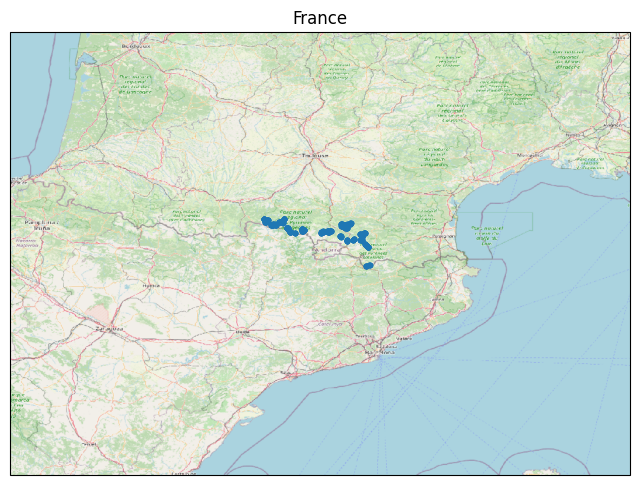

In [354]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-2, 5, 40, 45])

imagery = OSM()
ax.add_image(imagery, 8)
# plus c'est grand, plus c'est précis, plus ça prend du temps

ax.plot(df.LON, df.LAT, '.')
ax.set_title('France');

In [355]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

---

## Encodage des données non numériques

In [356]:
# Sélection des colonnes pertinentes pour l'encodage des étiquettes
categorical_columns = ['LD', 'Position', 'Dynamique', 'Commune']  # Colonnes catégorielles à encoder

# Copie des données pour ne pas modifier les données originales
encoded_data = df.copy()

label_encoders, encoded_values = {}, {}

for c in categorical_columns:
    label_encoders[c] = LabelEncoder()
    df[c] = label_encoders[c].fit_transform(df[c])
    encoded_values[c] = dict(zip(label_encoders[c].classes_, label_encoders[c].transform(label_encoders[c].classes_)))


# Afficher le dictionnaire des valeurs encodées
print("Dictionnaire des valeurs encodées :")
print(encoded_values)

# Afficher le DataFrame après les modifications
print("\nDataFrame final :")
df

Dictionnaire des valeurs encodées :
{'LD': {'Ayet': 0, 'Cirque de Gerac': 1, "Col d'Escots": 2, 'Col de Grail': 3, 'Col de Nédé': 4, 'Col de Pause': 5, "Col de l'Arech": 6, "Col de l'Herbe Soulette": 7, 'Col du Sasc': 8, 'Comte': 9, 'Coume': 10, 'Estagnet': 11, "Etang d'Appy": 12, 'Eychelle': 13, 'Eylie': 14, 'Frau': 15, 'Guzet-Neige': 16, 'Isard': 17, 'Le Clot': 18, "Mont d'Olmes": 19, 'Orle': 20, 'Pailheres': 21, 'Pic de Montbuou': 22, 'Pic du Midi de Bordes': 23, 'Pla de Montcamp': 24, 'Pla des Salines': 25, 'Plateau de Beille': 26, 'Pouill': 27, 'Puig del Pam': 28, 'RNCFS': 29, "Roc d'Aude": 30, 'Saubé': 31, 'Serra dels Alarbs': 32, 'Soularac': 33, 'Trabesses': 34, 'Trimouns': 35, 'Turon de Rose': 36, 'Val de Sos': 37}, 'Position': {'estive': 0, 'lisiere': 1}, 'Dynamique': {'bleu': 0, 'rouge': 1}, 'Commune': {'Antras': 0, 'Appy': 1, 'Arrien-en-Bethmale': 2, 'Ascou': 3, 'Aston': 4, 'Aulus-les-Bains': 5, 'Bestiac': 6, 'Bethmale': 7, 'Bonac': 8, 'Bonac-Irazein': 9, 'Couflens': 10, 'Fo

Unnamed: 0  Transect  Dynamique  Position      LAT     LON  Commune  LD  \
0             0       375          1         0  42.6886  1.9722       18  11   
1             1       375          1         0  42.6886  1.9722       18  11   
2             2       375          1         0  42.6886  1.9722       18  11   
3             3       375          1         0  42.6886  1.9722       18  11   
4             4       375          1         1  42.6899  1.9765       18  11   
..          ...       ...        ...       ...      ...     ...      ...  ..   
587         587       228          0         0  42.8860  0.8650       24   7   
588         588       228          0         1  42.8869  0.8636       24   7   
589         589       228          0         1  42.8869  0.8636       24   7   
590         590       228          0         1  42.8869  0.8636       24   7   
591         591       228          0         1  42.8869  0.8636       24   7   

     LAYER  mean_naturalness_100  ...  median_naturalness_100  \
0        1            148.062500  ...                   185.0   
1        2          10525.537500  ...                 10525.5   
2        3            344.425000  ...                   345.0   
3        4            542.200000  ...                   582.0   
4        1            149.437500  ...                   154.0   
..     ...                   ...  ...                     ...   
587      4            543.987342  ...                   549.0   
588      1            128.259740  ...                   154.0   
589      2           9857.103896  ...                  9857.0   
590      3            340.844156  ...                   341.0   
591      4            506.324675  ...                   534.0   

     mean_naturalness_250  std_naturalness_250  median_naturalness_250  \
0              171.037190            39.241447                   185.0   
1            10525.314050            34.758799                 10525.0   
2              344.904959             0.770891                   345.0   
3              567.427686            42.567799                   583.0   
4              169.739669            39.661981                   185.0   
..                    ...                  ...                     ...   
587            525.399594            68.339658                   549.0   
588            163.283976            74.321300                   169.0   
589           9857.405680            22.317589                  9857.0   
590            341.734280             3.607573                   341.0   
591            545.170385            81.004967                   551.0   

     mean_naturalness_500  std_naturalness_500  median_naturalness_500  \
0              172.802838            37.376364                   185.0   
1            10520.001521            63.336105                 10526.0   
2              345.423213             1.261865                   345.0   
3              569.815509            40.848631                   583.0   
4              168.812723            43.425038                   185.0   
..                    ...                  ...                     ...   
587            553.177189            69.617987                   565.0   
588            180.294238            68.638739                   185.0   
589           9858.772565            43.659410                  9858.0   
590            343.122896             5.543458                   344.0   
591            564.479857            75.933985                   570.0   

     mean_naturalness_1000  std_naturalness_1000  median_naturalness_1000  
0               174.770356             37.411821                    185.0  
1             10500.769084            117.086845                  10514.0  
2               346.934860              2.592675                    346.0  
3               572.705471             40.726599                    583.0  
4               178.830256             41.650766                    185.0  
..                     ...   

### Ajout de la colonne 'target' (dynamique+position) pour colorier les differents clusters issus de l'acp, t-sne et umap

In [357]:
df["target"] = df['Dynamique'].astype(str) + df['Position'].astype(str)
df

Unnamed: 0  Transect  Dynamique  Position      LAT     LON  Commune  LD  \
0             0       375          1         0  42.6886  1.9722       18  11   
1             1       375          1         0  42.6886  1.9722       18  11   
2             2       375          1         0  42.6886  1.9722       18  11   
3             3       375          1         0  42.6886  1.9722       18  11   
4             4       375          1         1  42.6899  1.9765       18  11   
..          ...       ...        ...       ...      ...     ...      ...  ..   
587         587       228          0         0  42.8860  0.8650       24   7   
588         588       228          0         1  42.8869  0.8636       24   7   
589         589       228          0         1  42.8869  0.8636       24   7   
590         590       228          0         1  42.8869  0.8636       24   7   
591         591       228          0         1  42.8869  0.8636       24   7   

     LAYER  mean_naturalness_100  ...  mean_naturalness_250  \
0        1            148.062500  ...            171.037190   
1        2          10525.537500  ...          10525.314050   
2        3            344.425000  ...            344.904959   
3        4            542.200000  ...            567.427686   
4        1            149.437500  ...            169.739669   
..     ...                   ...  ...                   ...   
587      4            543.987342  ...            525.399594   
588      1            128.259740  ...            163.283976   
589      2           9857.103896  ...           9857.405680   
590      3            340.844156  ...            341.734280   
591      4            506.324675  ...            545.170385   

     std_naturalness_250  median_naturalness_250  mean_naturalness_500  \
0              39.241447                   185.0            172.802838   
1              34.758799                 10525.0          10520.001521   
2               0.770891                   345.0            345.423213   
3              42.567799                   583.0            569.815509   
4              39.661981                   185.0            168.812723   
..                   ...                     ...                   ...   
587            68.339658                   549.0            553.177189   
588            74.321300                   169.0            180.294238   
589            22.317589                  9857.0           9858.772565   
590             3.607573                   341.0            343.122896   
591            81.004967                   551.0            564.479857   

     std_naturalness_500  median_naturalness_500  mean_naturalness_1000  \
0              37.376364                   185.0             174.770356   
1              63.336105                 10526.0           10500.769084   
2               1.261865                   345.0             346.934860   
3              40.848631                   583.0             572.705471   
4              43.425038                   185.0             178.830256   
..                   ...                     ...                    ...   
587            69.617987                   565.0             571.500255   
588            68.638739                   185.0             189.504076   
589            43.659410                  9858.0            9864.636815   
590             5.543458                   344.0             344.352739   
591            75.933985                   570.0             575.344204   

     std_naturalness_1000  median_naturalness_1000  target  
0               37.411821                    185.0      10  
1              117.086845                  10514.0      10  
2                2.592675                    346.0      10  
3               40.726599                    583.0      10  
4               41.650766                    185.0      11  
..                    ...                      ...     ...  
587             68.011955                    593.0      00  
588      

In [358]:
df_layer_1 = df[df['LAYER'] == 1]
df_layer_2 = df[df['LAYER'] == 2]
df_layer_3 = df[df['LAYER'] == 3]
df_layer_4 = df[df['LAYER'] == 4]

In [359]:
df_layer_1

Unnamed: 0  Transect  Dynamique  Position      LAT     LON  Commune  LD  \
0             0       375          1         0  42.6886  1.9722       18  11   
4             4       375          1         1  42.6899  1.9765       18  11   
8             8       374          0         0  42.6957  1.9750       18  11   
12           12       374          0         1  42.6936  1.9756       18  11   
16           16       373          1         0  42.7347  2.0095       18  34   
..          ...       ...        ...       ...      ...     ...      ...  ..   
572         572        44          0         1  42.6040  2.0047       11  32   
576         576       386          1         0  42.8861  0.8684       24   7   
580         580       386          1         1  42.8874  0.8699       24   7   
584         584       228          0         0  42.8860  0.8650       24   7   
588         588       228          0         1  42.8869  0.8636       24   7   

     LAYER  mean_naturalness_100  ...  mean_naturalness_250  \
0        1            148.062500  ...            171.037190   
4        1            149.437500  ...            169.739669   
8        1            185.025316  ...            181.563525   
12       1            170.129870  ...            175.248473   
16       1            173.128205  ...            164.320487   
..     ...                   ...  ...                   ...   
572      1            161.294872  ...            163.361055   
576      1            170.038961  ...            176.672065   
580      1            197.405405  ...            196.092025   
584      1            164.443038  ...            147.123732   
588      1            128.259740  ...            163.283976   

     std_naturalness_250  median_naturalness_250  mean_naturalness_500  \
0              39.241447                   185.0            172.802838   
4              39.661981                   185.0            168.812723   
8              25.439418                   185.0            179.506374   
12             19.136964                   169.0            175.295316   
16             33.727802                   169.0            172.955680   
..                   ...                     ...                   ...   
572            22.204824                   169.0            166.953109   
576            17.925107                   169.0            176.137175   
580            25.429515                   185.0            189.407275   
584            62.757905                   169.0            171.116090   
588            74.321300                   169.0            180.294238   

     std_naturalness_500  median_naturalness_500  mean_naturalness_1000  \
0              37.376364                   185.0             174.770356   
4              43.425038                   185.0             178.830256   
8              34.444274                   185.0             183.158665   
12             35.534418                   185.0             181.411105   
16             38.132923                   185.0             167.549828   
..                   ...                     ...                    ...   
572            19.049050                   169.0             165.564824   
576            54.455124                   185.0             187.708864   
580            52.654706                   200.0             190.622767   
584            63.050813                   182.0             186.517693   
588            68.638739                   185.0             189.504076   

     std_naturalness_1000  median_naturalness_1000  target  
0               37.411821                    185.0      10  
4               41.650766                    185.0      11  
8               37.934693                    185.0      00  
12              41.284772                    185.0      01  
16              54.314766                    185.0      10  
..                    ...                      ...     ...  
572             28.791944                    169.0      01  
576      

In [360]:
df_layer_1[['Transect','mean_naturalness_100', 'std_naturalness_100',
       'median_naturalness_100']]

Transect  mean_naturalness_100  std_naturalness_100  \
0         375            148.062500            48.909954   
4         375            149.437500            38.855130   
8         374            185.025316            13.866429   
12        374            170.129870             7.685964   
16        373            173.128205            15.538504   
..        ...                   ...                  ...   
572        44            161.294872            17.558772   
576       386            170.038961             3.942580   
580       386            197.405405            23.572154   
584       228            164.443038             6.898444   
588       228            128.259740            76.503018   

     median_naturalness_100  
0                     185.0  
4                     154.0  
8                     185.0  
12                    169.0  
16                    169.0  
..                      ...  
572                   161.5  
576                   169.0  
580                   192.5  
584                   169.0  
588                   154.0  

[148 rows x 4 columns]

In [361]:
df_layer_1

Unnamed: 0  Transect  Dynamique  Position      LAT     LON  Commune  LD  \
0             0       375          1         0  42.6886  1.9722       18  11   
4             4       375          1         1  42.6899  1.9765       18  11   
8             8       374          0         0  42.6957  1.9750       18  11   
12           12       374          0         1  42.6936  1.9756       18  11   
16           16       373          1         0  42.7347  2.0095       18  34   
..          ...       ...        ...       ...      ...     ...      ...  ..   
572         572        44          0         1  42.6040  2.0047       11  32   
576         576       386          1         0  42.8861  0.8684       24   7   
580         580       386          1         1  42.8874  0.8699       24   7   
584         584       228          0         0  42.8860  0.8650       24   7   
588         588       228          0         1  42.8869  0.8636       24   7   

     LAYER  mean_naturalness_100  ...  mean_naturalness_250  \
0        1            148.062500  ...            171.037190   
4        1            149.437500  ...            169.739669   
8        1            185.025316  ...            181.563525   
12       1            170.129870  ...            175.248473   
16       1            173.128205  ...            164.320487   
..     ...                   ...  ...                   ...   
572      1            161.294872  ...            163.361055   
576      1            170.038961  ...            176.672065   
580      1            197.405405  ...            196.092025   
584      1            164.443038  ...            147.123732   
588      1            128.259740  ...            163.283976   

     std_naturalness_250  median_naturalness_250  mean_naturalness_500  \
0              39.241447                   185.0            172.802838   
4              39.661981                   185.0            168.812723   
8              25.439418                   185.0            179.506374   
12             19.136964                   169.0            175.295316   
16             33.727802                   169.0            172.955680   
..                   ...                     ...                   ...   
572            22.204824                   169.0            166.953109   
576            17.925107                   169.0            176.137175   
580            25.429515                   185.0            189.407275   
584            62.757905                   169.0            171.116090   
588            74.321300                   169.0            180.294238   

     std_naturalness_500  median_naturalness_500  mean_naturalness_1000  \
0              37.376364                   185.0             174.770356   
4              43.425038                   185.0             178.830256   
8              34.444274                   185.0             183.158665   
12             35.534418                   185.0             181.411105   
16             38.132923                   185.0             167.549828   
..                   ...                     ...                    ...   
572            19.049050                   169.0             165.564824   
576            54.455124                   185.0             187.708864   
580            52.654706                   200.0             190.622767   
584            63.050813                   182.0             186.517693   
588            68.638739                   185.0             189.504076   

     std_naturalness_1000  median_naturalness_1000  target  
0               37.411821                    185.0      10  
4               41.650766                    185.0      11  
8               37.934693                    185.0      00  
12              41.284772                    185.0      01  
16              54.314766                    185.0      10  
..                    ...                      ...     ...  
572             28.791944                    169.0      01  
576      

In [362]:
df_Transect_Commune_LD_Dynamique = df_layer_1[['Transect', 'Commune', 'LD', 'Dynamique']].copy()
result_transect_commune_ld_dynamique = df_Transect_Commune_LD_Dynamique.groupby('Transect').first().reset_index()
result_transect_commune_ld_dynamique

Transect  Commune  LD  Dynamique
0         38       11  32          1
1         44       11  32          0
2         46       28  25          0
3         47       28  25          1
4        172       15  30          0
..       ...      ...  ..        ...
69       638        6  35          0
70       641        6  35          1
71       646        1  12          1
72       682       23  29          0
73       702        0  17          0

[74 rows x 4 columns]

----

### Division des rayons par LAYER 1

In [363]:
df_layer_1_rayon_100 = df_layer_1[['Transect','mean_naturalness_100', 'std_naturalness_100',
       'median_naturalness_100']]
df_layer_1_rayon_250 = df_layer_1[['Transect','mean_naturalness_250', 'std_naturalness_250',
       'median_naturalness_250']]
df_layer_1_rayon_500 = df_layer_1[['Transect','mean_naturalness_500', 'std_naturalness_500',
       'median_naturalness_500']]
df_layer_1_rayon_1000 = df_layer_1[['Transect','mean_naturalness_1000', 'std_naturalness_1000',
       'median_naturalness_1000']]

df_layer_1_transect_rayon_100 = df_layer_1[['Transect']].copy()
df_layer_1_target_rayon_100 = df_layer_1[['target']].copy()
df_layer_1_rayon_100 = df_layer_1[['mean_naturalness_100', 'std_naturalness_100','median_naturalness_100']]

df_layer_1_transect_rayon_250 = df_layer_1[['Transect']].copy()
df_layer_1_target_rayon_250 = df_layer_1[['target']].copy()
df_layer_1_rayon_250 = df_layer_1[['mean_naturalness_250', 'std_naturalness_250','median_naturalness_250']]

df_layer_1_transect_rayon_500 = df_layer_1[['Transect']].copy()
df_layer_1_target_rayon_500 = df_layer_1[['target']].copy()
df_layer_1_rayon_500 = df_layer_1[['mean_naturalness_500', 'std_naturalness_500','median_naturalness_500']]

df_layer_1_transect_rayon_1000 = df_layer_1[['Transect']].copy()
df_layer_1_target_rayon_1000 = df_layer_1[['target']].copy()
df_layer_1_rayon_1000 = df_layer_1[['mean_naturalness_1000', 'std_naturalness_1000','median_naturalness_1000']]

df_layer_1_rayon_100

mean_naturalness_100  std_naturalness_100  median_naturalness_100
0              148.062500            48.909954                   185.0
4              149.437500            38.855130                   154.0
8              185.025316            13.866429                   185.0
12             170.129870             7.685964                   169.0
16             173.128205            15.538504                   169.0
..                    ...                  ...                     ...
572            161.294872            17.558772                   161.5
576            170.038961             3.942580                   169.0
580            197.405405            23.572154                   192.5
584            164.443038             6.898444                   169.0
588            128.259740            76.503018                   154.0

[148 rows x 3 columns]

### Division des rayons pour LAYER 2

In [364]:
df_layer_2_rayon_100 = df_layer_2[['Transect','mean_naturalness_100', 'std_naturalness_100',
       'median_naturalness_100']]
df_layer_2_rayon_250 = df_layer_2[['Transect','mean_naturalness_250', 'std_naturalness_250',
       'median_naturalness_250']]
df_layer_2_rayon_500 = df_layer_2[['Transect','mean_naturalness_500', 'std_naturalness_500',
       'median_naturalness_500']]
df_layer_2_rayon_1000 = df_layer_2[['Transect','mean_naturalness_1000', 'std_naturalness_1000',
       'median_naturalness_1000']]

df_layer_2_transect_rayon_100 = df_layer_2[['Transect']].copy()
df_layer_2_target_rayon_100 = df_layer_2[['target']].copy()
df_layer_2_rayon_100 = df_layer_2[['mean_naturalness_100', 'std_naturalness_100','median_naturalness_100']]

df_layer_2_transect_rayon_250 = df_layer_2[['Transect']].copy()
df_layer_2_target_rayon_250 = df_layer_2[['target']].copy()
df_layer_2_rayon_250 = df_layer_2[['mean_naturalness_250', 'std_naturalness_250','median_naturalness_250']]

df_layer_2_transect_rayon_500 = df_layer_2[['Transect']].copy()
df_layer_2_target_rayon_500 = df_layer_2[['target']].copy()
df_layer_2_rayon_500 = df_layer_2[['mean_naturalness_500', 'std_naturalness_500','median_naturalness_500']]

df_layer_2_transect_rayon_1000 = df_layer_2[['Transect']].copy()
df_layer_2_target_rayon_1000 = df_layer_2[['target']].copy()
df_layer_2_rayon_1000 = df_layer_2[['mean_naturalness_1000', 'std_naturalness_1000','median_naturalness_1000']]

df_layer_2_rayon_100

mean_naturalness_100  std_naturalness_100  median_naturalness_100
1            10525.537500            14.567038                 10525.5
5            10592.387500             7.737076                 10592.5
9            10519.240506             6.771525                 10519.0
13           10550.714286             6.385570                 10549.0
17            9884.910256            12.135122                  9886.0
..                    ...                  ...                     ...
573          10161.615385            17.398225                 10162.0
577           9889.831169             7.786773                  9890.0
581           9864.378378            13.222322                  9864.5
585           9880.759494             8.228101                  9882.0
589           9857.103896            10.049985                  9857.0

[148 rows x 3 columns]

### Division des rayons pour LAYER 3

In [365]:
df_layer_3_rayon_100 = df_layer_3[['Transect','mean_naturalness_100', 'std_naturalness_100',
       'median_naturalness_100']]
df_layer_3_rayon_250 = df_layer_3[['Transect','mean_naturalness_250', 'std_naturalness_250',
       'median_naturalness_250']]
df_layer_3_rayon_500 = df_layer_3[['Transect','mean_naturalness_500', 'std_naturalness_500',
       'median_naturalness_500']]
df_layer_3_rayon_1000 = df_layer_3[['Transect','mean_naturalness_1000', 'std_naturalness_1000',
       'median_naturalness_1000']]

df_layer_3_transect_rayon_100 = df_layer_3[['Transect']].copy()
df_layer_3_target_rayon_100 = df_layer_3[['target']].copy()
df_layer_3_rayon_100 = df_layer_3[['mean_naturalness_100', 'std_naturalness_100','median_naturalness_100']]

df_layer_3_transect_rayon_250 = df_layer_3[['Transect']].copy()
df_layer_3_target_rayon_250 = df_layer_3[['target']].copy()
df_layer_3_rayon_250 = df_layer_3[['mean_naturalness_250', 'std_naturalness_250','median_naturalness_250']]

df_layer_3_transect_rayon_500 = df_layer_3[['Transect']].copy()
df_layer_3_target_rayon_500 = df_layer_3[['target']].copy()
df_layer_3_rayon_500 = df_layer_3[['mean_naturalness_500', 'std_naturalness_500','median_naturalness_500']]

df_layer_3_transect_rayon_1000 = df_layer_3[['Transect']].copy()
df_layer_3_target_rayon_1000 = df_layer_3[['target']].copy()
df_layer_3_rayon_1000 = df_layer_3[['mean_naturalness_1000', 'std_naturalness_1000','median_naturalness_1000']]

df_layer_3_rayon_100

mean_naturalness_100  std_naturalness_100  median_naturalness_100
2              344.425000             0.685109                   345.0
6              345.825000             1.301682                   346.0
10             346.936709             0.486313                   347.0
14             345.545455             0.523362                   346.0
18             319.461538             1.082404                   319.0
..                    ...                  ...                     ...
574            299.820513             1.248010                   300.0
578            339.545455             1.211905                   340.0
582            343.891892             1.180558                   344.0
586            337.392405             1.417948                   337.0
590            340.844156             1.414810                   341.0

[148 rows x 3 columns]

### Division par rayon pour LAYER 4

In [366]:
df_layer_4_rayon_100 = df_layer_4[['Transect','mean_naturalness_100', 'std_naturalness_100',
       'median_naturalness_100']]
df_layer_4_rayon_250 = df_layer_4[['Transect','mean_naturalness_250', 'std_naturalness_250',
       'median_naturalness_250']]
df_layer_4_rayon_500 = df_layer_4[['Transect','mean_naturalness_500', 'std_naturalness_500',
       'median_naturalness_500']]
df_layer_4_rayon_1000 = df_layer_4[['Transect','mean_naturalness_1000', 'std_naturalness_1000',
       'median_naturalness_1000']]

df_layer_4_transect_rayon_100 = df_layer_4[['Transect']].copy()
df_layer_4_target_rayon_100 = df_layer_4[['target']].copy()
df_layer_4_rayon_100 = df_layer_4[['mean_naturalness_100', 'std_naturalness_100','median_naturalness_100']]

df_layer_4_transect_rayon_250 = df_layer_4[['Transect']].copy()
df_layer_4_target_rayon_250 = df_layer_4[['target']].copy()
df_layer_4_rayon_250 = df_layer_4[['mean_naturalness_250', 'std_naturalness_250','median_naturalness_250']]

df_layer_4_transect_rayon_500 = df_layer_4[['Transect']].copy()
df_layer_4_target_rayon_500 = df_layer_4[['target']].copy()
df_layer_4_rayon_500 = df_layer_4[['mean_naturalness_500', 'std_naturalness_500','median_naturalness_500']]

df_layer_4_transect_rayon_1000 = df_layer_4[['Transect']].copy()
df_layer_4_target_rayon_1000 = df_layer_4[['target']].copy()
df_layer_4_rayon_1000 = df_layer_4[['mean_naturalness_1000', 'std_naturalness_1000','median_naturalness_1000']]

df_layer_4_rayon_100

mean_naturalness_100  std_naturalness_100  median_naturalness_100
3              542.200000            53.005990                   582.0
7              546.225000            42.251916                   553.0
11             584.037975            15.164451                   584.0
15             567.740260             8.121484                   567.0
19             540.730769            17.458135                   537.0
..                    ...                  ...                     ...
575            519.448718            18.667569                   519.5
579            551.935065             3.971776                   551.0
583            583.310811            26.099563                   577.5
587            543.987342             7.873194                   549.0
591            506.324675            82.710643                   534.0

[148 rows x 3 columns]

---

## ACP study

In [367]:
# ACP
pca = PCA(n_components=2)

### ACP sur LAYER 1

In [368]:
pca_layer_1_result_100 = pca.fit_transform(df_layer_1_rayon_100)
pca_layer_1_result_250 = pca.fit_transform(df_layer_1_rayon_250)
pca_layer_1_result_500 = pca.fit_transform(df_layer_1_rayon_500)
pca_layer_1_result_1000 = pca.fit_transform(df_layer_1_rayon_1000)

### ACP sur LAYER 2

In [369]:
pca_layer_2_result_100 = pca.fit_transform(df_layer_2_rayon_100)
pca_layer_2_result_250 = pca.fit_transform(df_layer_2_rayon_250)
pca_layer_2_result_500 = pca.fit_transform(df_layer_2_rayon_500)
pca_layer_2_result_1000 = pca.fit_transform(df_layer_2_rayon_1000)

### ACP sur LAYER 3

In [370]:
pca_layer_3_result_100 = pca.fit_transform(df_layer_3_rayon_100)
pca_layer_3_result_250 = pca.fit_transform(df_layer_3_rayon_250)
pca_layer_3_result_500 = pca.fit_transform(df_layer_3_rayon_500)
pca_layer_3_result_1000 = pca.fit_transform(df_layer_3_rayon_1000)

### ACP sur LAYER 4

In [371]:
pca_layer_4_result_100 = pca.fit_transform(df_layer_4_rayon_100)
pca_layer_4_result_250 = pca.fit_transform(df_layer_4_rayon_250)
pca_layer_4_result_500 = pca.fit_transform(df_layer_4_rayon_500)
pca_layer_4_result_1000 = pca.fit_transform(df_layer_4_rayon_1000)

---

## t-SNE Study

In [372]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

### t-SNE sur LAYER 1

In [373]:
tsne_layer_1_result_100 = tsne.fit_transform(df_layer_1_rayon_100)
tsne_layer_1_result_250 = tsne.fit_transform(df_layer_1_rayon_250)
tsne_layer_1_result_500 = tsne.fit_transform(df_layer_1_rayon_500)
tsne_layer_1_result_1000 = tsne.fit_transform(df_layer_1_rayon_1000)

### t-SNE sur LAYER 2

In [374]:
tsne_layer_2_result_100 = tsne.fit_transform(df_layer_2_rayon_100)
tsne_layer_2_result_250 = tsne.fit_transform(df_layer_2_rayon_250)
tsne_layer_2_result_500 = tsne.fit_transform(df_layer_2_rayon_500)
tsne_layer_2_result_1000 = tsne.fit_transform(df_layer_2_rayon_1000)

### t-SNE sur LAYER 3

In [375]:
tsne_layer_3_result_100 = tsne.fit_transform(df_layer_3_rayon_100)
tsne_layer_3_result_250 = tsne.fit_transform(df_layer_3_rayon_250)
tsne_layer_3_result_500 = tsne.fit_transform(df_layer_3_rayon_500)
tsne_layer_3_result_1000 = tsne.fit_transform(df_layer_3_rayon_1000)

### t-SNE sur LAYER 4

In [376]:
tsne_layer_4_result_100 = tsne.fit_transform(df_layer_4_rayon_100)
tsne_layer_4_result_250 = tsne.fit_transform(df_layer_4_rayon_250)
tsne_layer_4_result_500 = tsne.fit_transform(df_layer_4_rayon_500)
tsne_layer_4_result_1000 = tsne.fit_transform(df_layer_4_rayon_1000)

----

## uMap Study

In [377]:
# uMap
umap = UMAP(n_components=2)

### uMap sur LAYER 1

In [378]:
umap_layer_1_result_100 = umap.fit_transform(df_layer_1_rayon_100)
umap_layer_1_result_250 = umap.fit_transform(df_layer_1_rayon_250)
umap_layer_1_result_500 = umap.fit_transform(df_layer_1_rayon_500)
umap_layer_1_result_1000 = umap.fit_transform(df_layer_1_rayon_1000)

### uMap sur LAYER 2

In [379]:
umap_layer_2_result_100 = umap.fit_transform(df_layer_2_rayon_100)
umap_layer_2_result_250 = umap.fit_transform(df_layer_2_rayon_250)
umap_layer_2_result_500 = umap.fit_transform(df_layer_2_rayon_500)
umap_layer_2_result_1000 = umap.fit_transform(df_layer_2_rayon_1000)

### uMap sur LAYER 3

In [380]:
umap_layer_3_result_100 = umap.fit_transform(df_layer_3_rayon_100)
umap_layer_3_result_250 = umap.fit_transform(df_layer_3_rayon_250)
umap_layer_3_result_500 = umap.fit_transform(df_layer_3_rayon_500)
umap_layer_3_result_1000 = umap.fit_transform(df_layer_3_rayon_1000)

### uMap sur LAYER 4

In [381]:
umap_layer_4_result_100 = umap.fit_transform(df_layer_4_rayon_100)
umap_layer_4_result_250 = umap.fit_transform(df_layer_4_rayon_250)
umap_layer_4_result_500 = umap.fit_transform(df_layer_4_rayon_500)
umap_layer_4_result_1000 = umap.fit_transform(df_layer_4_rayon_1000)

---

## Plotting

### LAYER 1

#### 1er rayon (100)

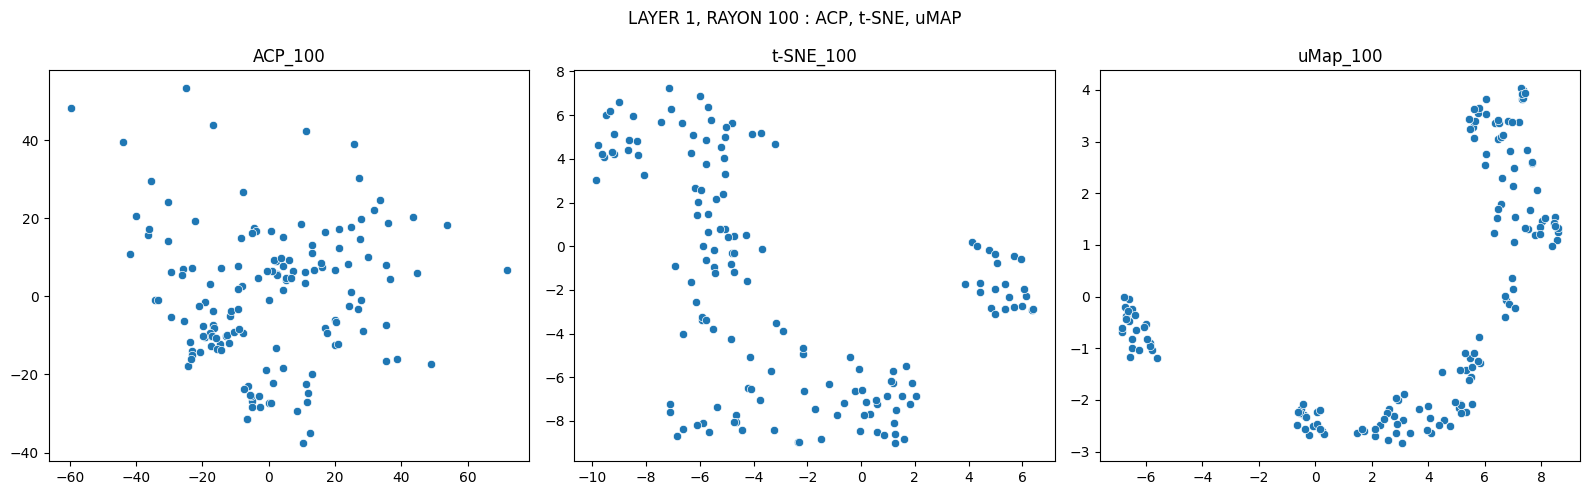

In [382]:
#Plotting
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_layer_1_result_100[:,0], y=pca_layer_1_result_100[:,1])
plt.title('ACP_100')

plt.subplot(1, 3, 2)
sns.scatterplot(x=tsne_layer_1_result_100[:,0], y=tsne_layer_1_result_100[:,1])
plt.title('t-SNE_100')

plt.subplot(1, 3, 3)
sns.scatterplot(x=umap_layer_1_result_100[:,0], y=umap_layer_1_result_100[:,1])
plt.title('uMap_100')

plt.suptitle('LAYER 1, RAYON 100 : ACP, t-SNE, uMAP')
plt.tight_layout()
plt.show()

### 2ème rayon (250)

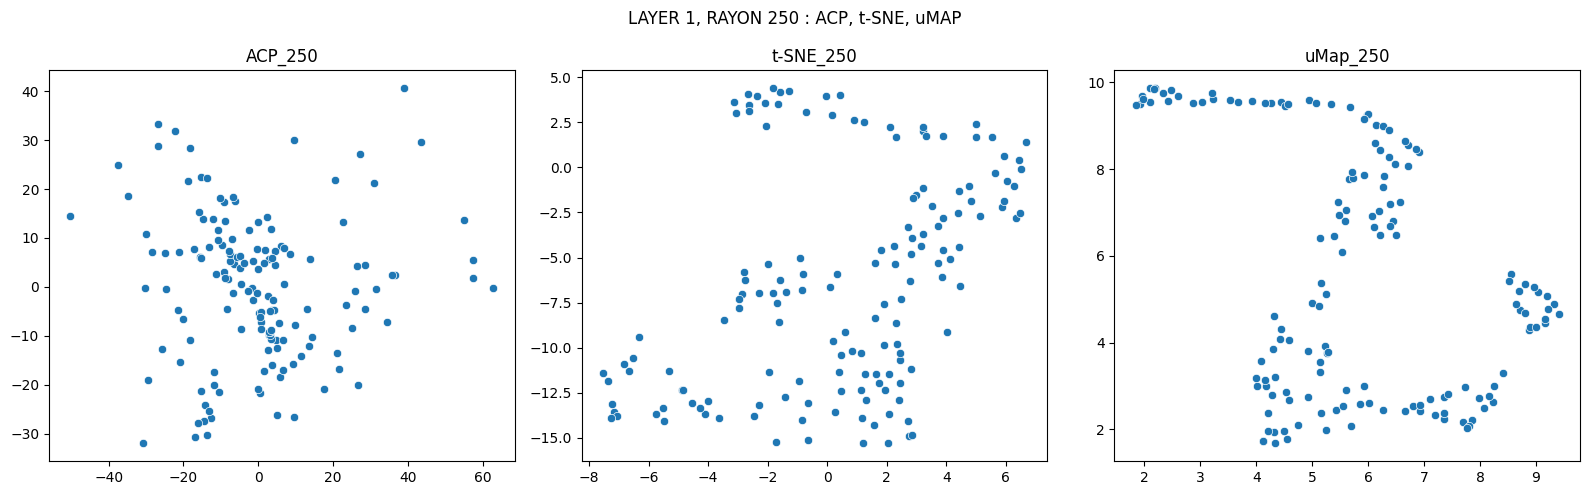

In [383]:
#Plotting
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_layer_1_result_250[:,0], y=pca_layer_1_result_250[:,1])
plt.title('ACP_250')

plt.subplot(1, 3, 2)
sns.scatterplot(x=tsne_layer_1_result_250[:,0], y=tsne_layer_1_result_250[:,1])
plt.title('t-SNE_250')

plt.subplot(1, 3, 3)
sns.scatterplot(x=umap_layer_1_result_250[:,0], y=umap_layer_1_result_250[:,1])
plt.title('uMap_250')

plt.suptitle('LAYER 1, RAYON 250 : ACP, t-SNE, uMAP')
plt.tight_layout()
plt.show()

### 3ème rayon (500)

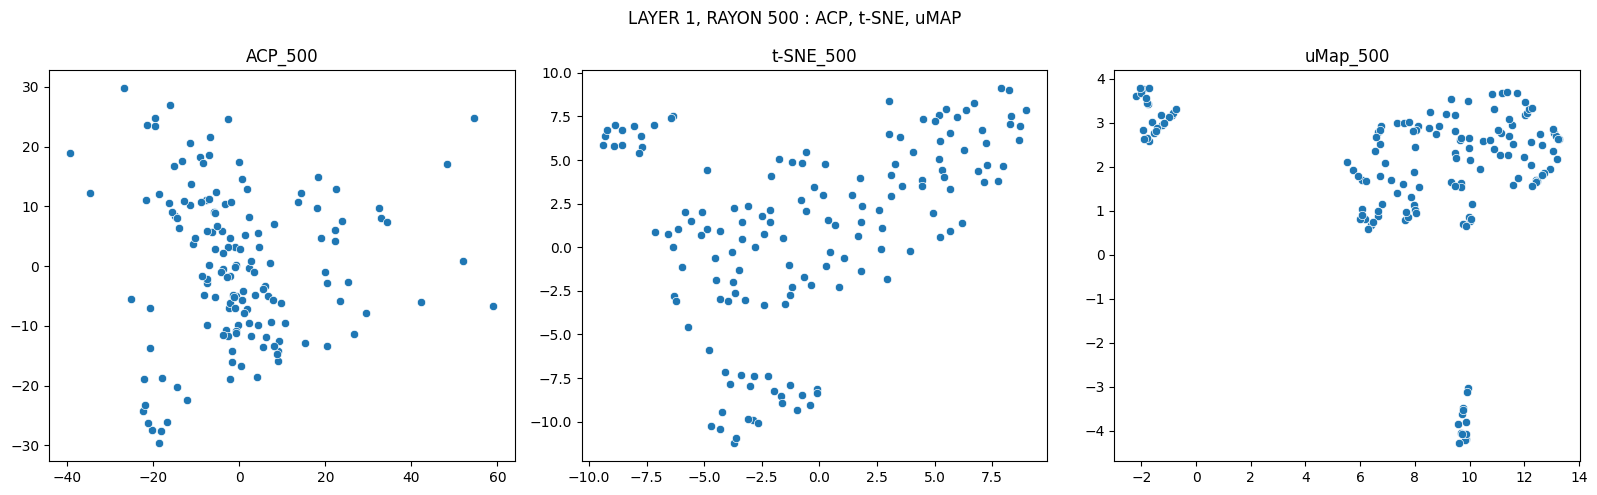

In [384]:
#Plotting
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_layer_1_result_500[:,0], y=pca_layer_1_result_500[:,1])
plt.title('ACP_500')

plt.subplot(1, 3, 2)
sns.scatterplot(x=tsne_layer_1_result_500[:,0], y=tsne_layer_1_result_500[:,1])
plt.title('t-SNE_500')

plt.subplot(1, 3, 3)
sns.scatterplot(x=umap_layer_1_result_500[:,0], y=umap_layer_1_result_500[:,1])
plt.title('uMap_500')

plt.suptitle('LAYER 1, RAYON 500 : ACP, t-SNE, uMAP')
plt.tight_layout()
plt.show()

### 4ème rayon (1000)

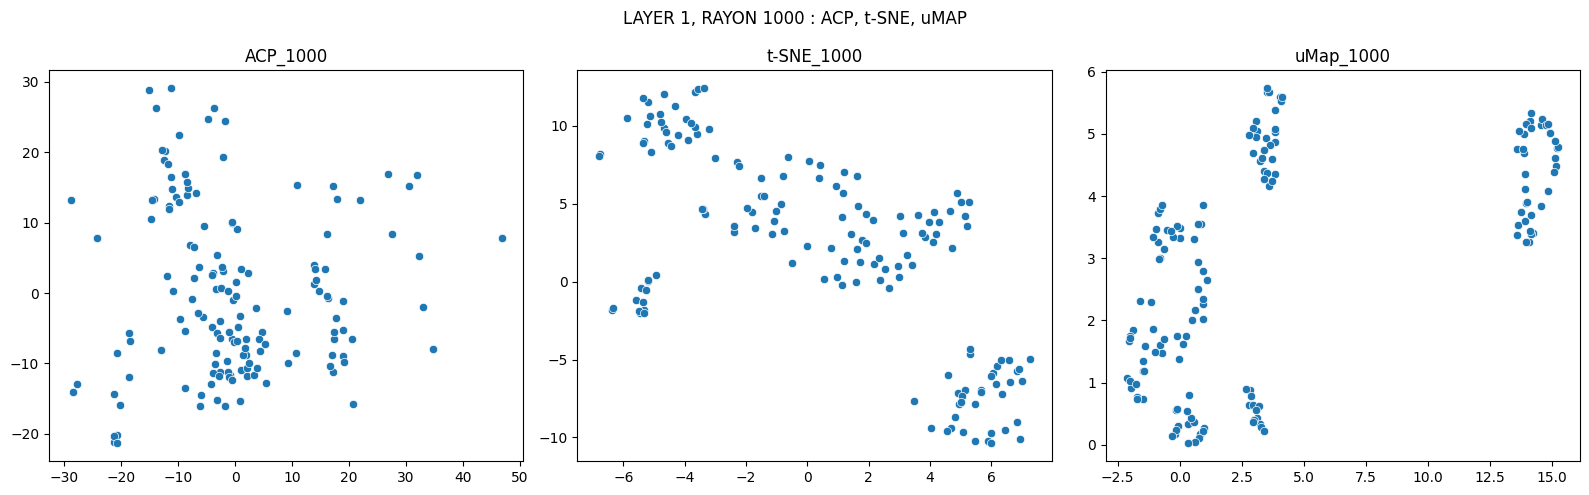

In [385]:
#Plotting
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_layer_1_result_1000[:,0], y=pca_layer_1_result_1000[:,1])
plt.title('ACP_1000')

plt.subplot(1, 3, 2)
sns.scatterplot(x=tsne_layer_1_result_1000[:,0], y=tsne_layer_1_result_1000[:,1])
plt.title('t-SNE_1000')

plt.subplot(1, 3, 3)
sns.scatterplot(x=umap_layer_1_result_1000[:,0], y=umap_layer_1_result_1000[:,1])
plt.title('uMap_1000')

plt.suptitle('LAYER 1, RAYON 1000 : ACP, t-SNE, uMAP')
plt.tight_layout()
plt.show()

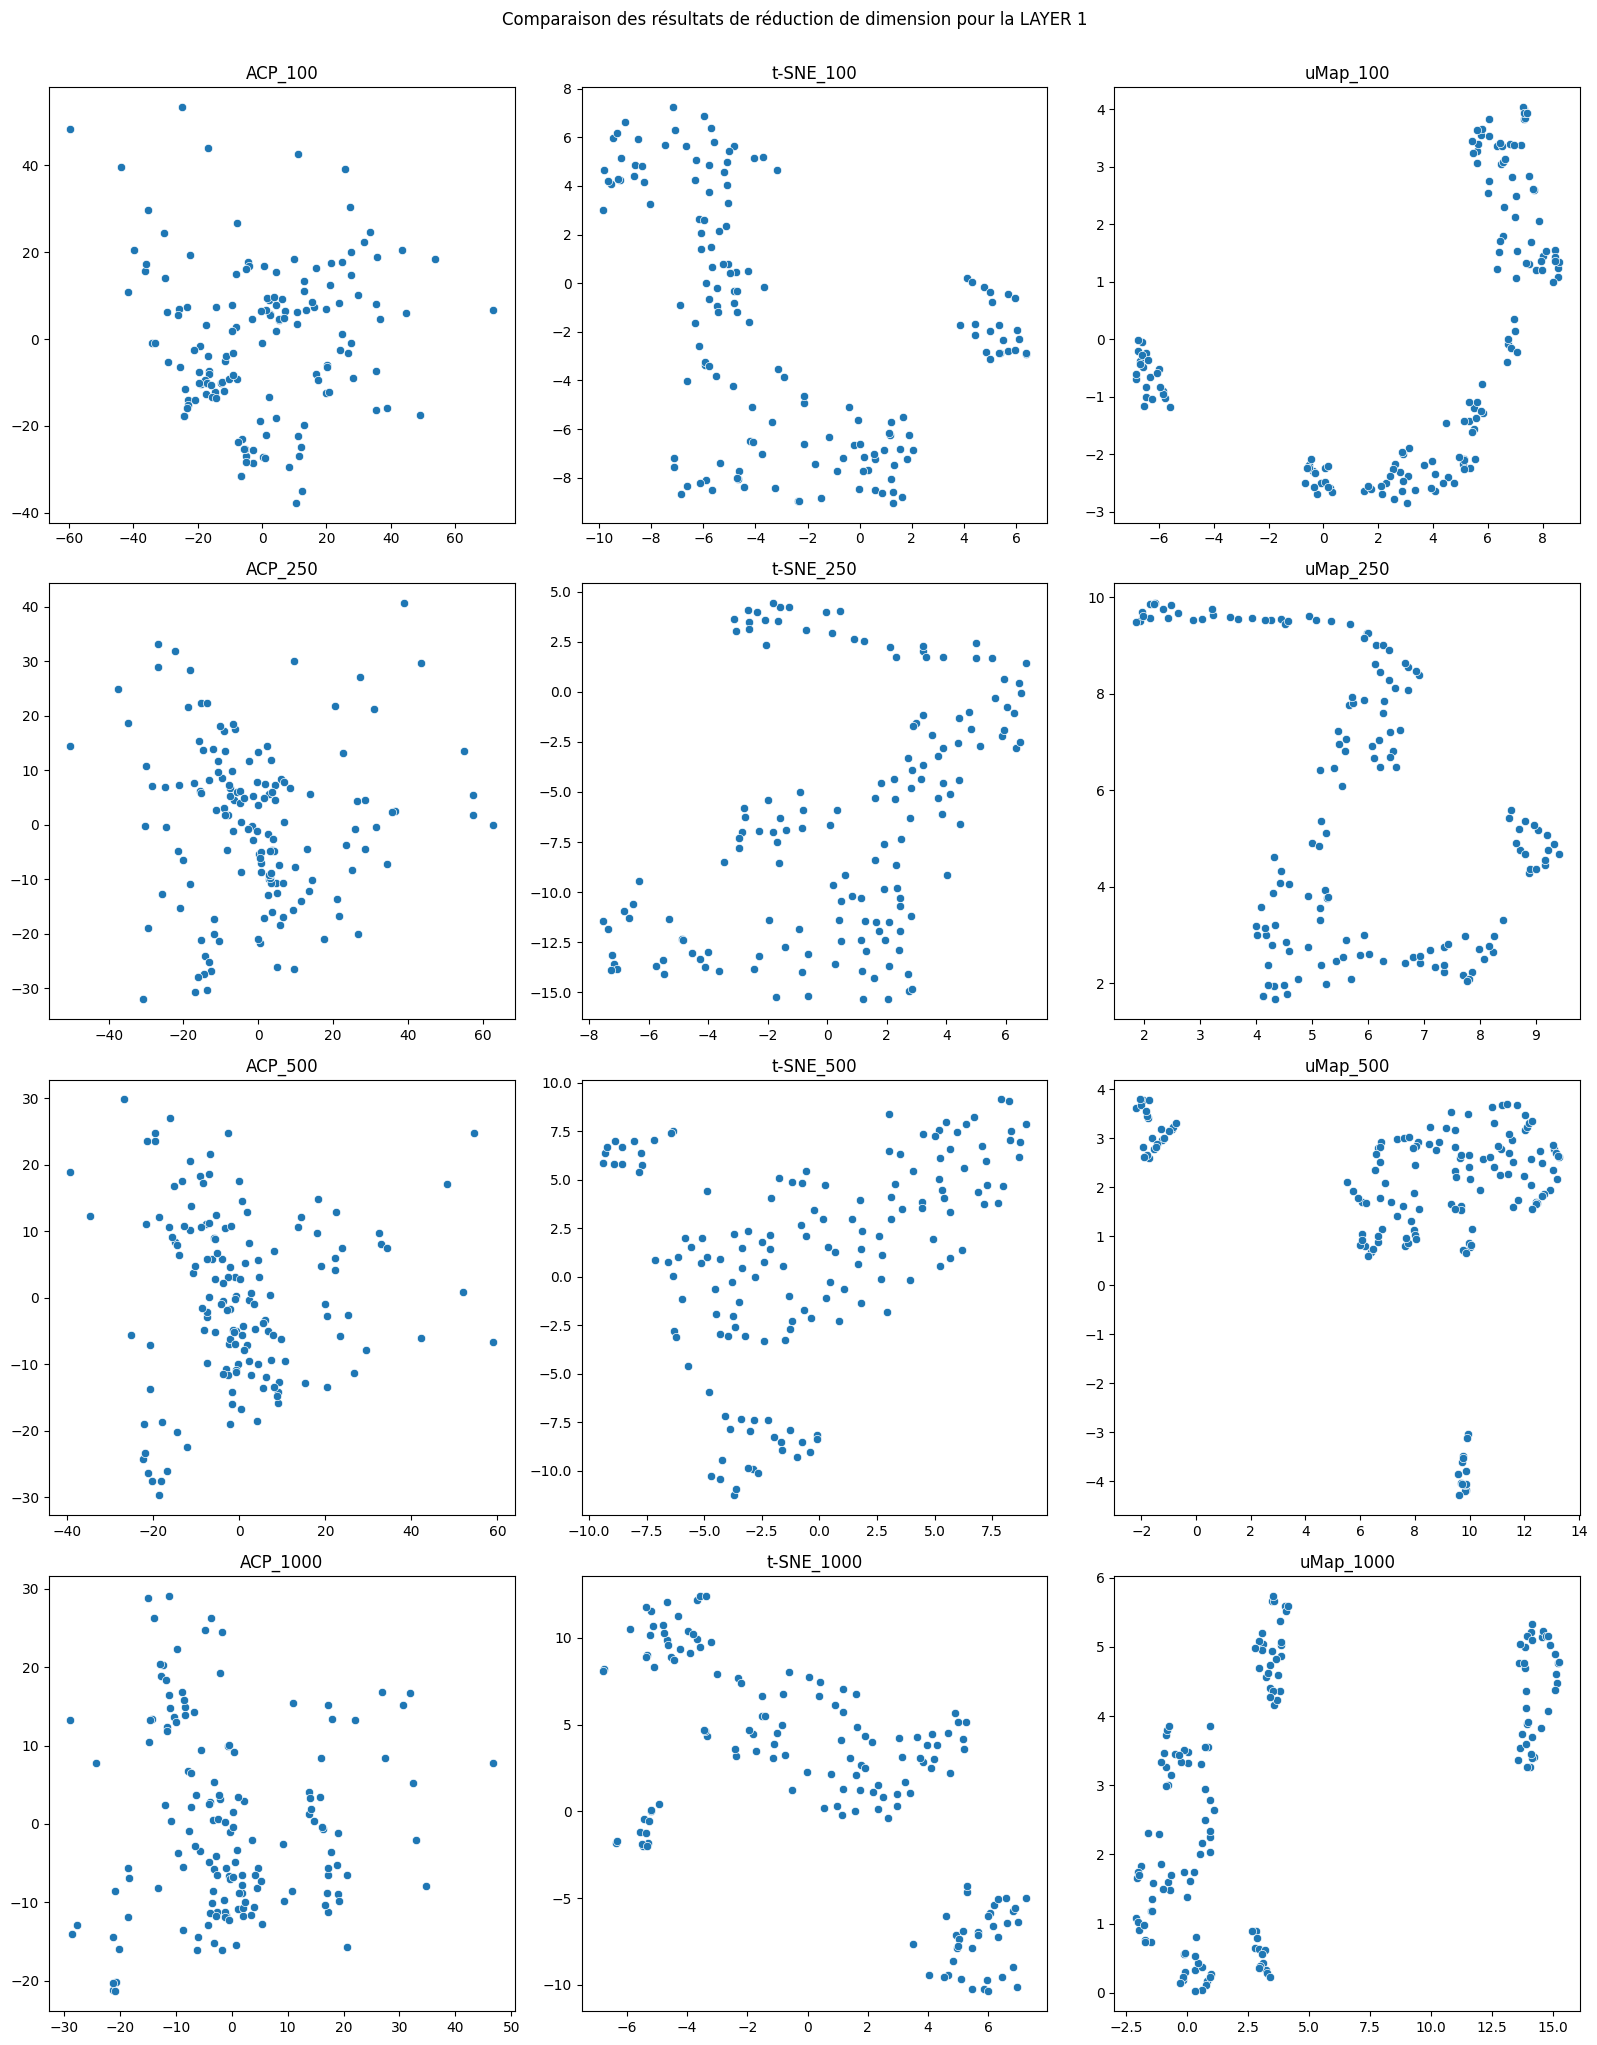

In [386]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))

# Rayon 100
sns.scatterplot(x=pca_layer_1_result_100[:,0], y=pca_layer_1_result_100[:,1], ax=axes[0, 0])
axes[0, 0].set_title('ACP_100')

sns.scatterplot(x=tsne_layer_1_result_100[:,0], y=tsne_layer_1_result_100[:,1], ax=axes[0, 1])
axes[0, 1].set_title('t-SNE_100')

sns.scatterplot(x=umap_layer_1_result_100[:,0], y=umap_layer_1_result_100[:,1], ax=axes[0, 2])
axes[0, 2].set_title('uMap_100')

# Rayon 250
sns.scatterplot(x=pca_layer_1_result_250[:,0], y=pca_layer_1_result_250[:,1], ax=axes[1, 0])
axes[1, 0].set_title('ACP_250')

sns.scatterplot(x=tsne_layer_1_result_250[:,0], y=tsne_layer_1_result_250[:,1], ax=axes[1, 1])
axes[1, 1].set_title('t-SNE_250')

sns.scatterplot(x=umap_layer_1_result_250[:,0], y=umap_layer_1_result_250[:,1], ax=axes[1, 2])
axes[1, 2].set_title('uMap_250')

# Rayon 500
sns.scatterplot(x=pca_layer_1_result_500[:,0], y=pca_layer_1_result_500[:,1], ax=axes[2, 0])
axes[2, 0].set_title('ACP_500')

sns.scatterplot(x=tsne_layer_1_result_500[:,0], y=tsne_layer_1_result_500[:,1], ax=axes[2, 1])
axes[2, 1].set_title('t-SNE_500')

sns.scatterplot(x=umap_layer_1_result_500[:,0], y=umap_layer_1_result_500[:,1], ax=axes[2, 2])
axes[2, 2].set_title('uMap_500')

# Rayon 1000
sns.scatterplot(x=pca_layer_1_result_1000[:,0], y=pca_layer_1_result_1000[:,1], ax=axes[3, 0])
axes[3, 0].set_title('ACP_1000')

sns.scatterplot(x=tsne_layer_1_result_1000[:,0], y=tsne_layer_1_result_1000[:,1], ax=axes[3, 1])
axes[3, 1].set_title('t-SNE_1000')

sns.scatterplot(x=umap_layer_1_result_1000[:,0], y=umap_layer_1_result_1000[:,1], ax=axes[3, 2])
axes[3, 2].set_title('uMap_1000')

# Ajustement de la disposition
plt.tight_layout()

# Titre global
plt.suptitle('Comparaison des résultats de réduction de dimension pour la LAYER 1', y=1.02)

# Affichage du graphique
plt.show()


### LAYER 2

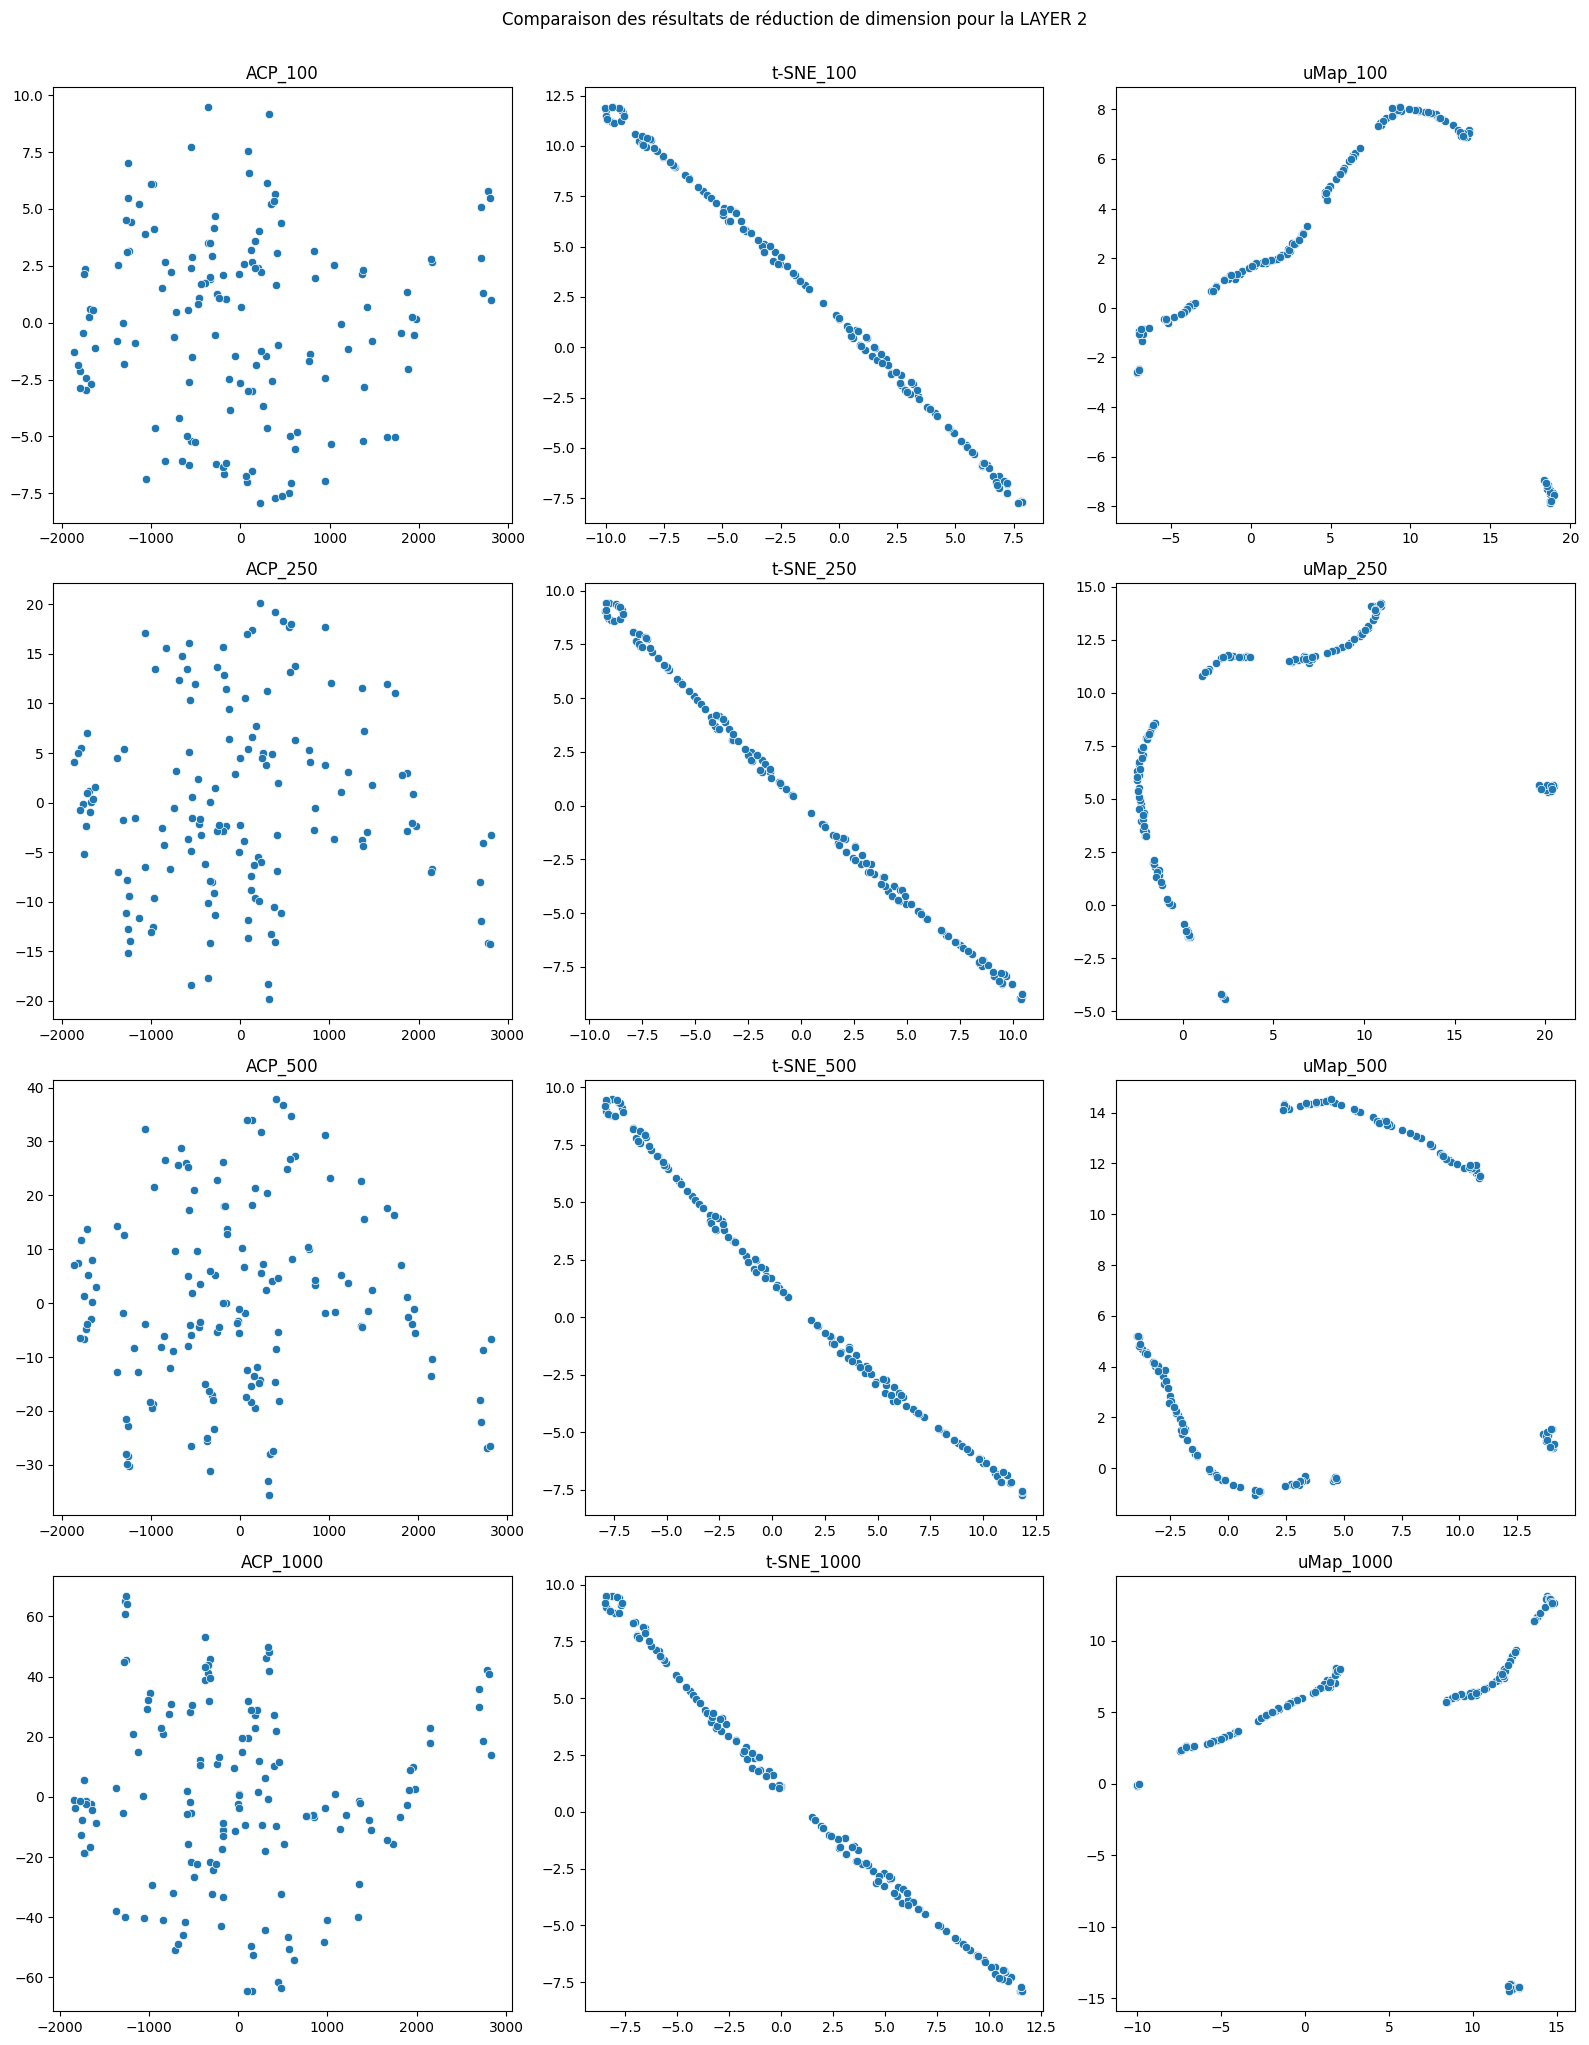

In [387]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))

# Rayon 100
sns.scatterplot(x=pca_layer_2_result_100[:,0], y=pca_layer_2_result_100[:,1], ax=axes[0, 0])
axes[0, 0].set_title('ACP_100')

sns.scatterplot(x=tsne_layer_2_result_100[:,0], y=tsne_layer_2_result_100[:,1], ax=axes[0, 1])
axes[0, 1].set_title('t-SNE_100')

sns.scatterplot(x=umap_layer_2_result_100[:,0], y=umap_layer_2_result_100[:,1], ax=axes[0, 2])
axes[0, 2].set_title('uMap_100')

# Rayon 250
sns.scatterplot(x=pca_layer_2_result_250[:,0], y=pca_layer_2_result_250[:,1], ax=axes[1, 0])
axes[1, 0].set_title('ACP_250')

sns.scatterplot(x=tsne_layer_2_result_250[:,0], y=tsne_layer_2_result_250[:,1], ax=axes[1, 1])
axes[1, 1].set_title('t-SNE_250')

sns.scatterplot(x=umap_layer_2_result_250[:,0], y=umap_layer_2_result_250[:,1], ax=axes[1, 2])
axes[1, 2].set_title('uMap_250')

# Rayon 500
sns.scatterplot(x=pca_layer_2_result_500[:,0], y=pca_layer_2_result_500[:,1], ax=axes[2, 0])
axes[2, 0].set_title('ACP_500')

sns.scatterplot(x=tsne_layer_2_result_500[:,0], y=tsne_layer_2_result_500[:,1], ax=axes[2, 1])
axes[2, 1].set_title('t-SNE_500')

sns.scatterplot(x=umap_layer_2_result_500[:,0], y=umap_layer_2_result_500[:,1], ax=axes[2, 2])
axes[2, 2].set_title('uMap_500')

# Rayon 1000
sns.scatterplot(x=pca_layer_2_result_1000[:,0], y=pca_layer_2_result_1000[:,1], ax=axes[3, 0])
axes[3, 0].set_title('ACP_1000')

sns.scatterplot(x=tsne_layer_2_result_1000[:,0], y=tsne_layer_2_result_1000[:,1], ax=axes[3, 1])
axes[3, 1].set_title('t-SNE_1000')

sns.scatterplot(x=umap_layer_2_result_1000[:,0], y=umap_layer_2_result_1000[:,1], ax=axes[3, 2])
axes[3, 2].set_title('uMap_1000')

# Ajustement de la disposition
plt.tight_layout()

# Titre global
plt.suptitle('Comparaison des résultats de réduction de dimension pour la LAYER 2', y=1.02)

# Affichage du graphique
plt.show()


### LAYER 3

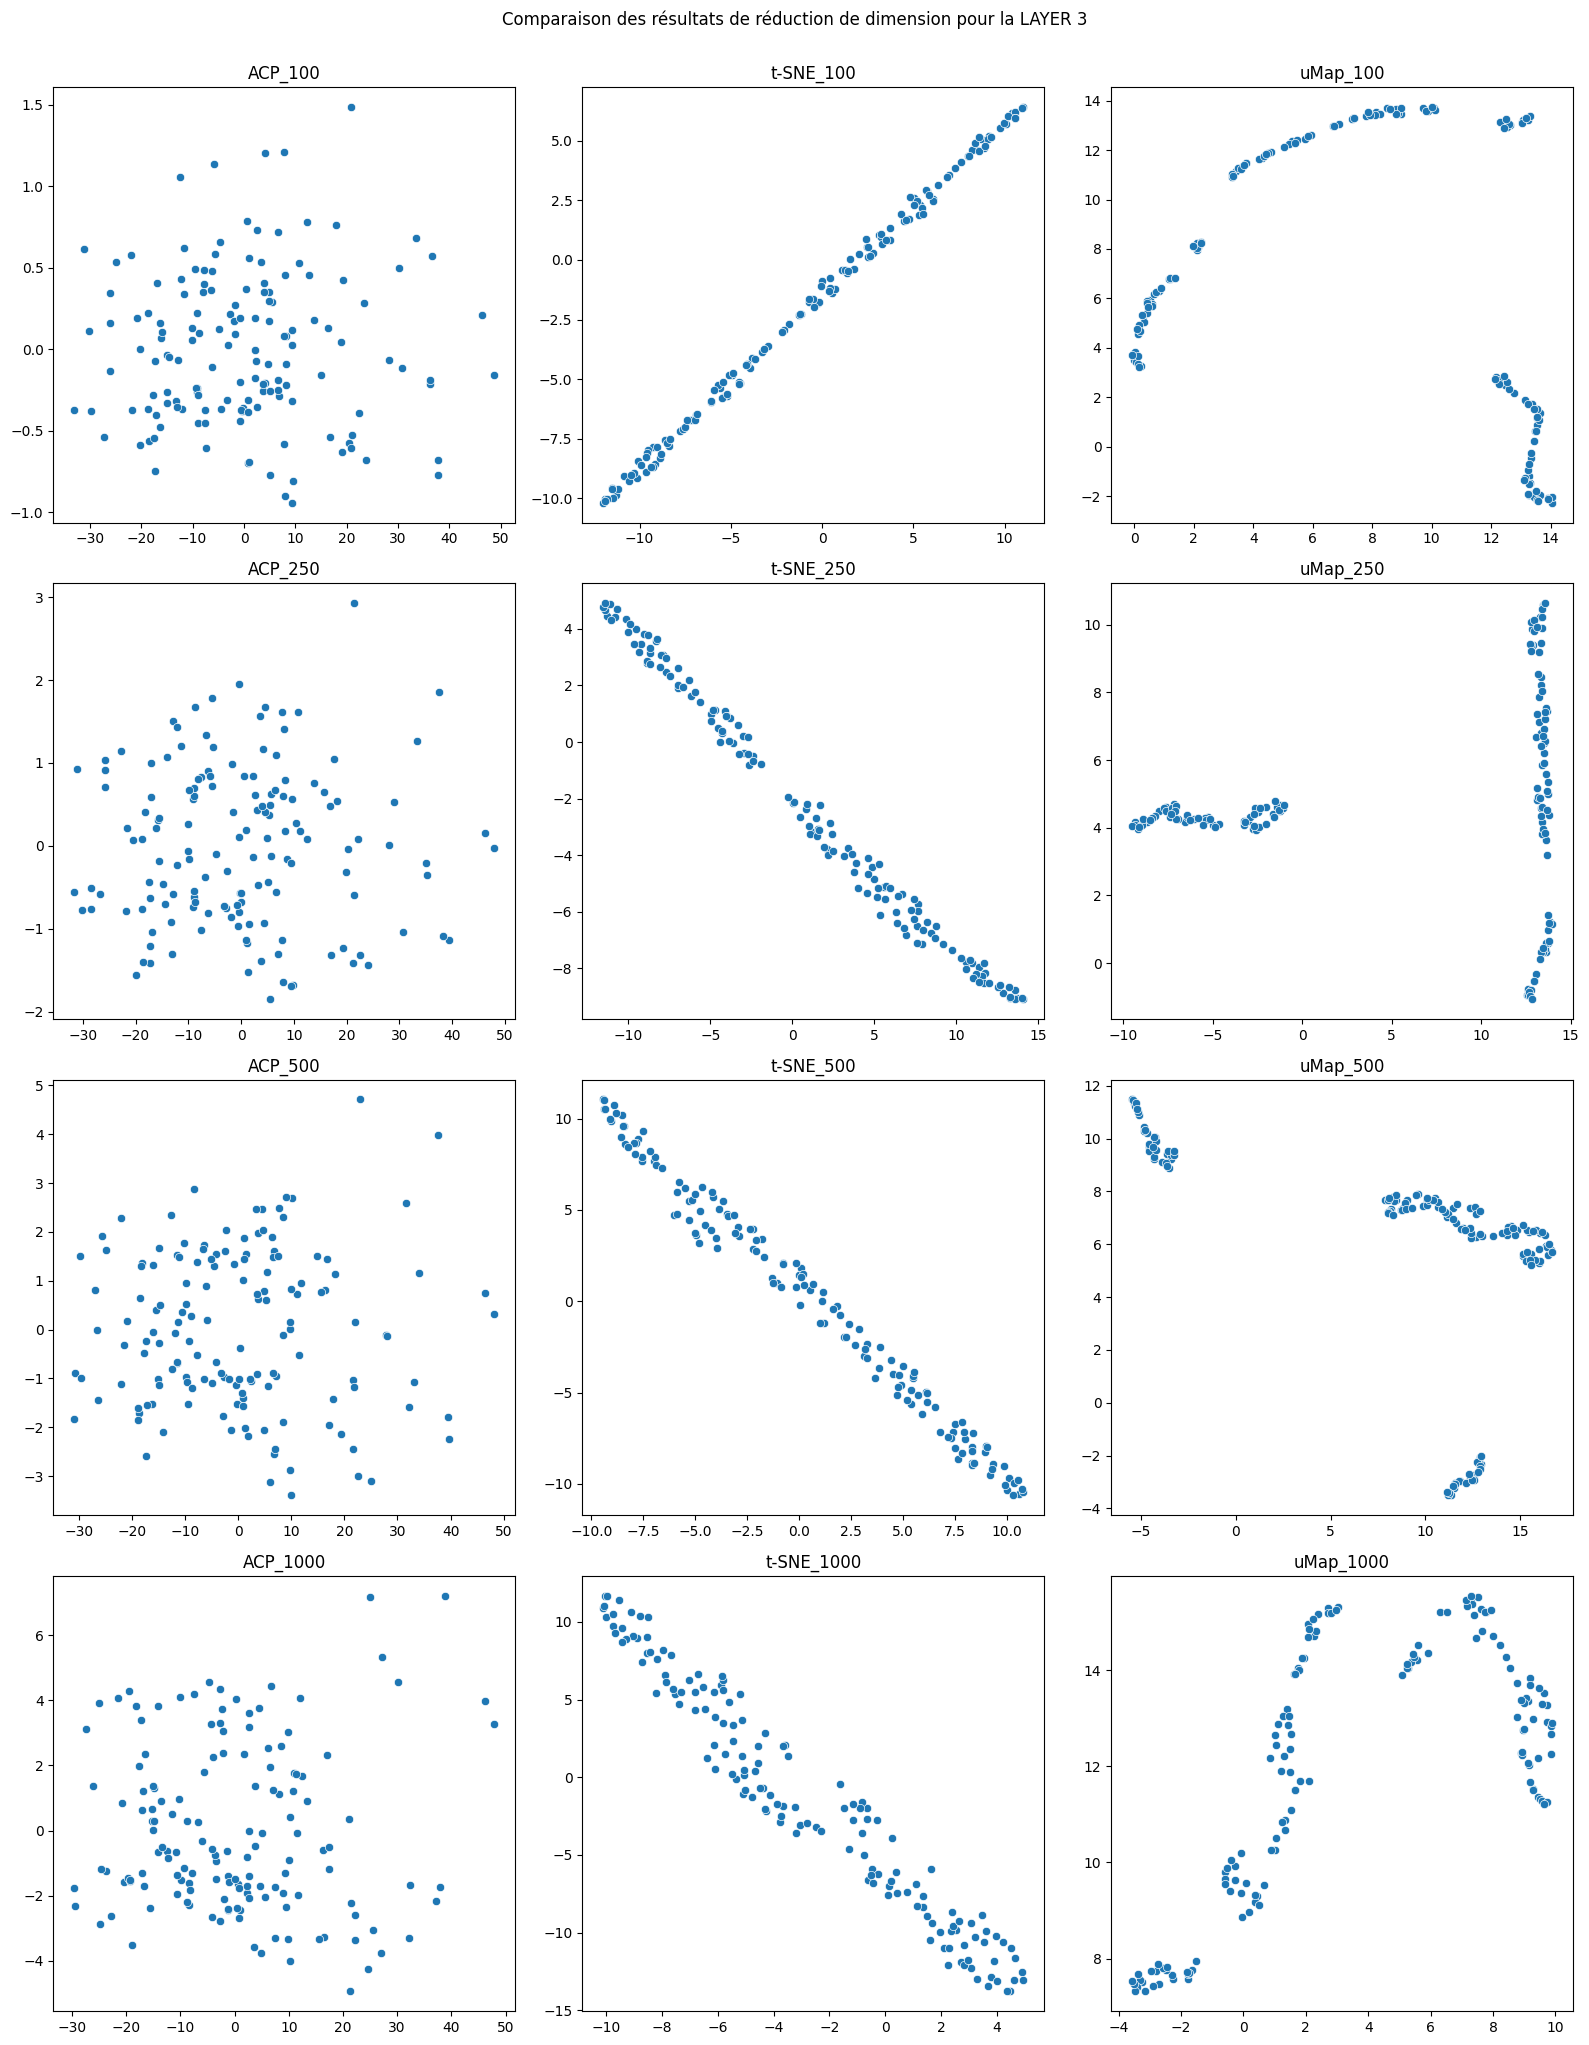

In [388]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))

# Rayon 100
sns.scatterplot(x=pca_layer_3_result_100[:,0], y=pca_layer_3_result_100[:,1], ax=axes[0, 0])
axes[0, 0].set_title('ACP_100')

sns.scatterplot(x=tsne_layer_3_result_100[:,0], y=tsne_layer_3_result_100[:,1], ax=axes[0, 1])
axes[0, 1].set_title('t-SNE_100')

sns.scatterplot(x=umap_layer_3_result_100[:,0], y=umap_layer_3_result_100[:,1], ax=axes[0, 2])
axes[0, 2].set_title('uMap_100')

# Rayon 250
sns.scatterplot(x=pca_layer_3_result_250[:,0], y=pca_layer_3_result_250[:,1], ax=axes[1, 0])
axes[1, 0].set_title('ACP_250')

sns.scatterplot(x=tsne_layer_3_result_250[:,0], y=tsne_layer_3_result_250[:,1], ax=axes[1, 1])
axes[1, 1].set_title('t-SNE_250')

sns.scatterplot(x=umap_layer_3_result_250[:,0], y=umap_layer_3_result_250[:,1], ax=axes[1, 2])
axes[1, 2].set_title('uMap_250')

# Rayon 500
sns.scatterplot(x=pca_layer_3_result_500[:,0], y=pca_layer_3_result_500[:,1], ax=axes[2, 0])
axes[2, 0].set_title('ACP_500')

sns.scatterplot(x=tsne_layer_3_result_500[:,0], y=tsne_layer_3_result_500[:,1], ax=axes[2, 1])
axes[2, 1].set_title('t-SNE_500')

sns.scatterplot(x=umap_layer_3_result_500[:,0], y=umap_layer_3_result_500[:,1], ax=axes[2, 2])
axes[2, 2].set_title('uMap_500')

# Rayon 1000
sns.scatterplot(x=pca_layer_3_result_1000[:,0], y=pca_layer_3_result_1000[:,1], ax=axes[3, 0])
axes[3, 0].set_title('ACP_1000')

sns.scatterplot(x=tsne_layer_3_result_1000[:,0], y=tsne_layer_3_result_1000[:,1], ax=axes[3, 1])
axes[3, 1].set_title('t-SNE_1000')

sns.scatterplot(x=umap_layer_3_result_1000[:,0], y=umap_layer_3_result_1000[:,1], ax=axes[3, 2])
axes[3, 2].set_title('uMap_1000')

# Ajustement de la disposition
plt.tight_layout()

# Titre global
plt.suptitle('Comparaison des résultats de réduction de dimension pour la LAYER 3', y=1.02)

# Affichage du graphique
plt.show()


### LAYER 4

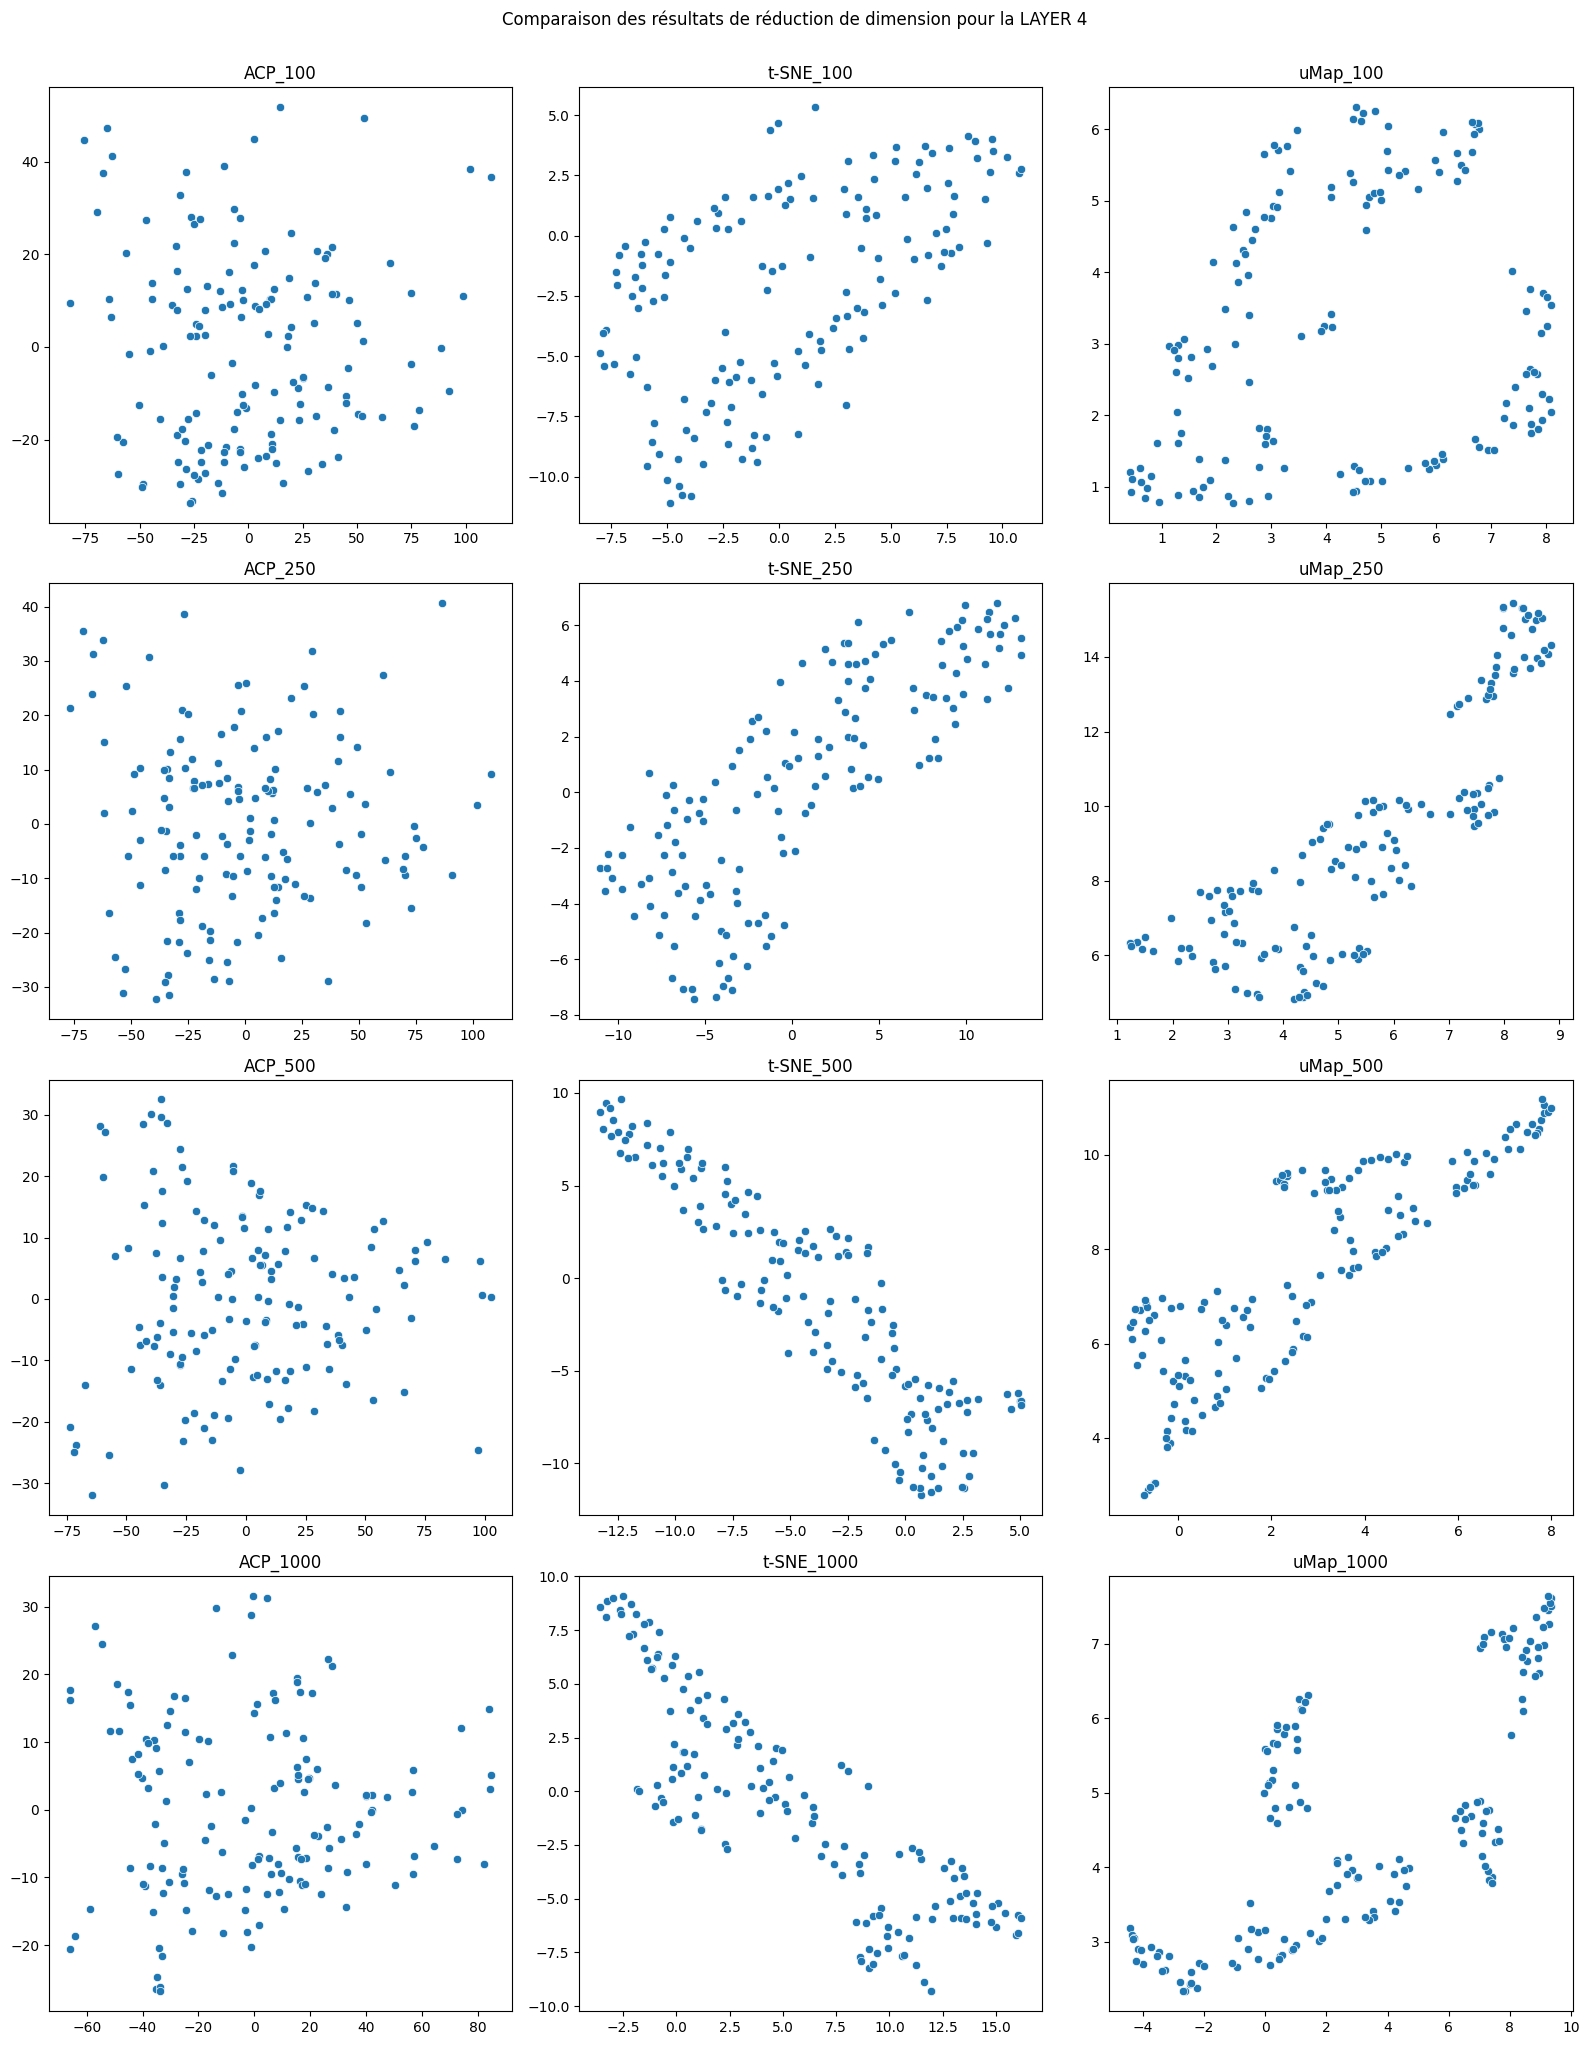

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))

# Rayon 100
sns.scatterplot(x=pca_layer_4_result_100[:,0], y=pca_layer_4_result_100[:,1], ax=axes[0, 0])
axes[0, 0].set_title('ACP_100')

sns.scatterplot(x=tsne_layer_4_result_100[:,0], y=tsne_layer_4_result_100[:,1], ax=axes[0, 1])
axes[0, 1].set_title('t-SNE_100')

sns.scatterplot(x=umap_layer_4_result_100[:,0], y=umap_layer_4_result_100[:,1], ax=axes[0, 2])
axes[0, 2].set_title('uMap_100')

# Rayon 250
sns.scatterplot(x=pca_layer_4_result_250[:,0], y=pca_layer_4_result_250[:,1], ax=axes[1, 0])
axes[1, 0].set_title('ACP_250')

sns.scatterplot(x=tsne_layer_4_result_250[:,0], y=tsne_layer_4_result_250[:,1], ax=axes[1, 1])
axes[1, 1].set_title('t-SNE_250')

sns.scatterplot(x=umap_layer_4_result_250[:,0], y=umap_layer_4_result_250[:,1], ax=axes[1, 2])
axes[1, 2].set_title('uMap_250')

# Rayon 500
sns.scatterplot(x=pca_layer_4_result_500[:,0], y=pca_layer_4_result_500[:,1], ax=axes[2, 0])
axes[2, 0].set_title('ACP_500')

sns.scatterplot(x=tsne_layer_4_result_500[:,0], y=tsne_layer_4_result_500[:,1], ax=axes[2, 1])
axes[2, 1].set_title('t-SNE_500')

sns.scatterplot(x=umap_layer_4_result_500[:,0], y=umap_layer_4_result_500[:,1], ax=axes[2, 2])
axes[2, 2].set_title('uMap_500')

# Rayon 1000
sns.scatterplot(x=pca_layer_4_result_1000[:,0], y=pca_layer_4_result_1000[:,1], ax=axes[3, 0])
axes[3, 0].set_title('ACP_1000')

sns.scatterplot(x=tsne_layer_4_result_1000[:,0], y=tsne_layer_4_result_1000[:,1], ax=axes[3, 1])
axes[3, 1].set_title('t-SNE_1000')

sns.scatterplot(x=umap_layer_4_result_1000[:,0], y=umap_layer_4_result_1000[:,1], ax=axes[3, 2])
axes[3, 2].set_title('uMap_1000')

# Ajustement de la disposition
plt.tight_layout()

# Titre global
plt.suptitle('Comparaison des résultats de réduction de dimension pour la LAYER 4', y=1.02)

# Affichage du graphique
plt.show()


-----

## Coloriage par Transect (besoin de merge Transect avec le nom des Commune et LD, puis plot avec le nom des Commune et LD)

In [390]:
df_layer_1_rayon_100 = pd.concat([df_layer_1_rayon_100, df_layer_1_transect_rayon_100], axis=1)
df_layer_1_rayon_250 = pd.concat([df_layer_1_rayon_250, df_layer_1_transect_rayon_250], axis=1)
df_layer_1_rayon_500 = pd.concat([df_layer_1_rayon_500, df_layer_1_transect_rayon_500], axis=1)
df_layer_1_rayon_1000 = pd.concat([df_layer_1_rayon_1000, df_layer_1_transect_rayon_1000], axis=1)

df_layer_2_rayon_100 = pd.concat([df_layer_2_rayon_100, df_layer_2_transect_rayon_100], axis=1)
df_layer_2_rayon_250 = pd.concat([df_layer_2_rayon_250, df_layer_2_transect_rayon_250], axis=1)
df_layer_2_rayon_500 = pd.concat([df_layer_2_rayon_500, df_layer_2_transect_rayon_500], axis=1)
df_layer_2_rayon_1000 = pd.concat([df_layer_2_rayon_1000, df_layer_2_transect_rayon_1000], axis=1)

df_layer_3_rayon_100 = pd.concat([df_layer_3_rayon_100, df_layer_3_transect_rayon_100], axis=1)
df_layer_3_rayon_250 = pd.concat([df_layer_3_rayon_250, df_layer_3_transect_rayon_250], axis=1)
df_layer_3_rayon_500 = pd.concat([df_layer_3_rayon_500, df_layer_3_transect_rayon_500], axis=1)
df_layer_3_rayon_1000 = pd.concat([df_layer_3_rayon_1000, df_layer_3_transect_rayon_1000], axis=1)

df_layer_4_rayon_100 = pd.concat([df_layer_4_rayon_100, df_layer_4_transect_rayon_100], axis=1)
df_layer_4_rayon_250 = pd.concat([df_layer_4_rayon_250, df_layer_4_transect_rayon_250], axis=1)
df_layer_4_rayon_500 = pd.concat([df_layer_4_rayon_500, df_layer_4_transect_rayon_500], axis=1)
df_layer_4_rayon_1000 = pd.concat([df_layer_4_rayon_1000, df_layer_4_transect_rayon_1000], axis=1)

In [391]:
df_layer_1_rayon_100

mean_naturalness_100  std_naturalness_100  median_naturalness_100  \
0              148.062500            48.909954                   185.0   
4              149.437500            38.855130                   154.0   
8              185.025316            13.866429                   185.0   
12             170.129870             7.685964                   169.0   
16             173.128205            15.538504                   169.0   
..                    ...                  ...                     ...   
572            161.294872            17.558772                   161.5   
576            170.038961             3.942580                   169.0   
580            197.405405            23.572154                   192.5   
584            164.443038             6.898444                   169.0   
588            128.259740            76.503018                   154.0   

     Transect  
0         375  
4         375  
8         374  
12        374  
16        373  
..        ...  
572        44  
576       386  
580       386  
584       228  
588       228  

[148 rows x 4 columns]

In [392]:

from matplotlib.colors import ListedColormap


<ipython-input-393-8ce1f6042501>:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


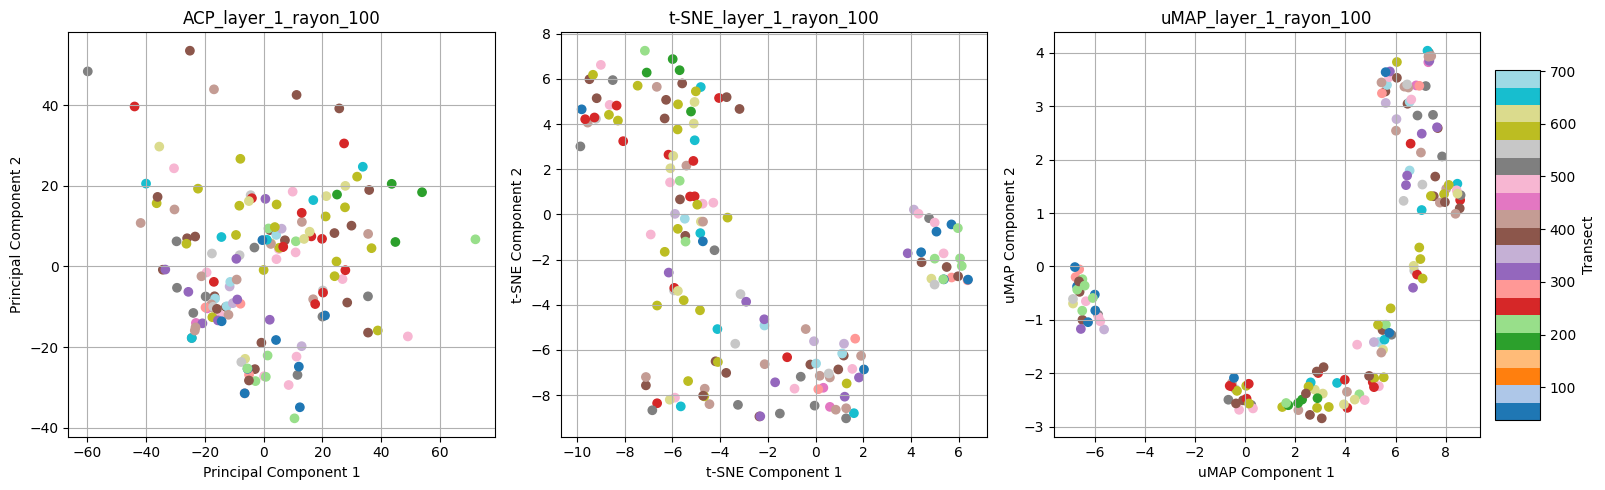

In [393]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# ACP Plot
colors_acp = plt.cm.viridis_r(df_layer_1_rayon_100['Transect'].astype(float))
cmap_acp = ListedColormap(plt.cm.tab20.colors[:len(df_layer_1_rayon_100['Transect'].unique())])

axs[0].scatter(pca_layer_1_result_100[:, 0], pca_layer_1_result_100[:, 1], c=df_layer_1_rayon_100['Transect'], cmap=cmap_acp, label=df_layer_1_rayon_100['Transect'].astype(int))
axs[0].set_title('ACP_layer_1_rayon_100')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].grid(True)

# t-SNE Plot
cmap_tsne = ListedColormap(plt.cm.tab20.colors[:len(df_layer_1_rayon_100['Transect'].unique())])

axs[1].scatter(tsne_layer_1_result_100[:, 0], tsne_layer_1_result_100[:, 1], c=df_layer_1_rayon_100['Transect'], cmap=cmap_tsne, label=df_layer_1_rayon_100['Transect'].astype(int))
axs[1].set_title('t-SNE_layer_1_rayon_100')
axs[1].set_xlabel('t-SNE Component 1')
axs[1].set_ylabel('t-SNE Component 2')
axs[1].grid(True)

# uMAP Plot
cmap_umap = ListedColormap(plt.cm.tab20.colors[:len(df_layer_1_rayon_100['Transect'].unique())])

scatter_umap = axs[2].scatter(umap_layer_1_result_100[:, 0], umap_layer_1_result_100[:, 1], c=df_layer_1_rayon_100['Transect'], cmap=cmap_umap)
axs[2].set_title('uMAP_layer_1_rayon_100')
axs[2].set_xlabel('uMAP Component 1')
axs[2].set_ylabel('uMAP Component 2')
axs[2].grid(True)

# Adjust layout to make space for the colorbar on the right
plt.subplots_adjust(right=0.8)

# Create a single colorbar for all three subplots
cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter_umap, cax=cbar_ax)
cbar.set_label('Transect')

plt.tight_layout()
plt.show()


<ipython-input-394-70add68e3130>:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


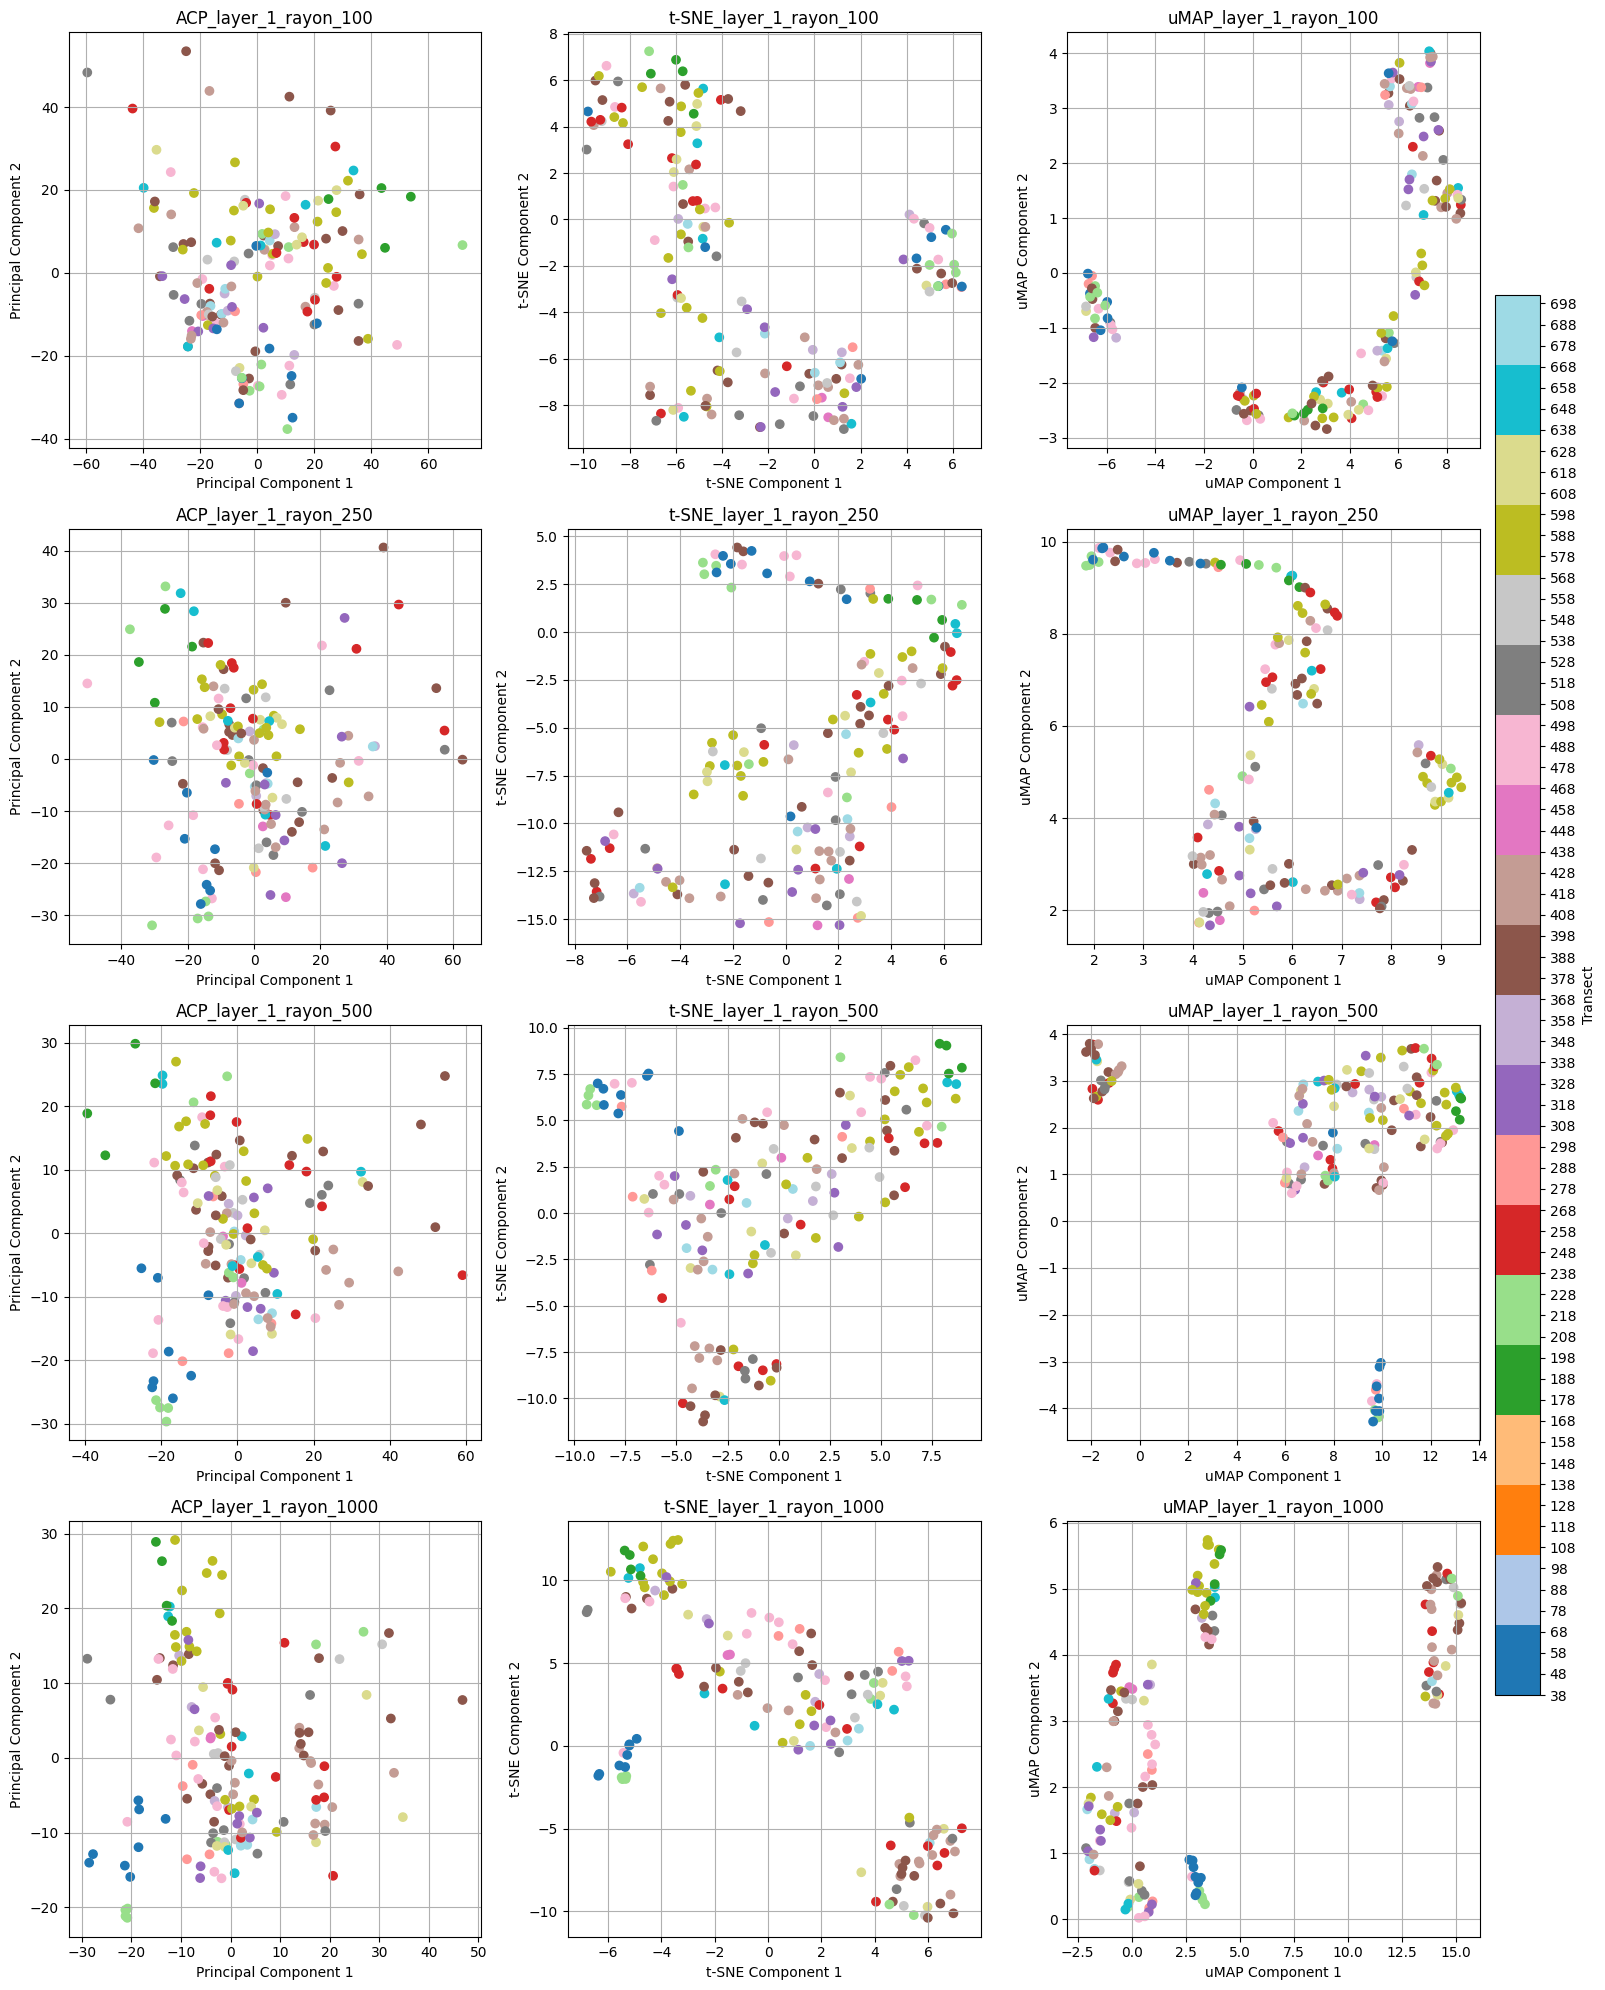

In [394]:
rayons = [100, 250, 500, 1000]

fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# ACP Plot
axs[0, 0].scatter(pca_layer_1_result_100[:, 0], pca_layer_1_result_100[:, 1], c=df_layer_1_rayon_100['Transect'], cmap=cmap_acp)
axs[0, 0].set_title('ACP_layer_1_rayon_100')
axs[0, 0].set_xlabel('Principal Component 1')
axs[0, 0].set_ylabel('Principal Component 2')
axs[0, 0].grid(True)

axs[1, 0].scatter(pca_layer_1_result_250[:, 0], pca_layer_1_result_250[:, 1], c=df_layer_1_rayon_250['Transect'], cmap=cmap_acp)
axs[1, 0].set_title('ACP_layer_1_rayon_250')
axs[1, 0].set_xlabel('Principal Component 1')
axs[1, 0].set_ylabel('Principal Component 2')
axs[1, 0].grid(True)

axs[2, 0].scatter(pca_layer_1_result_500[:, 0], pca_layer_1_result_500[:, 1], c=df_layer_1_rayon_500['Transect'], cmap=cmap_acp)
axs[2, 0].set_title('ACP_layer_1_rayon_500')
axs[2, 0].set_xlabel('Principal Component 1')
axs[2, 0].set_ylabel('Principal Component 2')
axs[2, 0].grid(True)

axs[3, 0].scatter(pca_layer_1_result_1000[:, 0], pca_layer_1_result_1000[:, 1], c=df_layer_1_rayon_1000['Transect'], cmap=cmap_acp)
axs[3, 0].set_title('ACP_layer_1_rayon_1000')
axs[3, 0].set_xlabel('Principal Component 1')
axs[3, 0].set_ylabel('Principal Component 2')
axs[3, 0].grid(True)

# t-SNE Plot
axs[0, 1].scatter(tsne_layer_1_result_100[:, 0], tsne_layer_1_result_100[:, 1], c=df_layer_1_rayon_100['Transect'], cmap=cmap_tsne)
axs[0, 1].set_title('t-SNE_layer_1_rayon_100')
axs[0, 1].set_xlabel('t-SNE Component 1')
axs[0, 1].set_ylabel('t-SNE Component 2')
axs[0, 1].grid(True)

axs[1, 1].scatter(tsne_layer_1_result_250[:, 0], tsne_layer_1_result_250[:, 1], c=df_layer_1_rayon_250['Transect'], cmap=cmap_tsne)
axs[1, 1].set_title('t-SNE_layer_1_rayon_250')
axs[1, 1].set_xlabel('t-SNE Component 1')
axs[1, 1].set_ylabel('t-SNE Component 2')
axs[1, 1].grid(True)

axs[2, 1].scatter(tsne_layer_1_result_500[:, 0], tsne_layer_1_result_500[:, 1], c=df_layer_1_rayon_500['Transect'], cmap=cmap_tsne)
axs[2, 1].set_title('t-SNE_layer_1_rayon_500')
axs[2, 1].set_xlabel('t-SNE Component 1')
axs[2, 1].set_ylabel('t-SNE Component 2')
axs[2, 1].grid(True)

axs[3, 1].scatter(tsne_layer_1_result_1000[:, 0], tsne_layer_1_result_1000[:, 1], c=df_layer_1_rayon_1000['Transect'], cmap=cmap_tsne)
axs[3, 1].set_title('t-SNE_layer_1_rayon_1000')
axs[3, 1].set_xlabel('t-SNE Component 1')
axs[3, 1].set_ylabel('t-SNE Component 2')
axs[3, 1].grid(True)

# uMAP Plot
scatter_umap_100 = axs[0, 2].scatter(umap_layer_1_result_100[:, 0], umap_layer_1_result_100[:, 1], c=df_layer_1_rayon_100['Transect'], cmap=cmap_umap)
axs[0, 2].set_title('uMAP_layer_1_rayon_100')
axs[0, 2].set_xlabel('uMAP Component 1')
axs[0, 2].set_ylabel('uMAP Component 2')
axs[0, 2].grid(True)

scatter_umap_250 = axs[1, 2].scatter(umap_layer_1_result_250[:, 0], umap_layer_1_result_250[:, 1], c=df_layer_1_rayon_250['Transect'], cmap=cmap_umap)
axs[1, 2].set_title('uMAP_layer_1_rayon_250')
axs[1, 2].set_xlabel('uMAP Component 1')
axs[1, 2].set_ylabel('uMAP Component 2')
axs[1, 2].grid(True)

scatter_umap_500 = axs[2, 2].scatter(umap_layer_1_result_500[:, 0], umap_layer_1_result_500[:, 1], c=df_layer_1_rayon_500['Transect'], cmap=cmap_umap)
axs[2, 2].set_title('uMAP_layer_1_rayon_500')
axs[2, 2].set_xlabel('uMAP Component 1')
axs[2, 2].set_ylabel('uMAP Component 2')
axs[2, 2].grid(True)

scatter_umap_1000 = axs[3, 2].scatter(umap_layer_1_result_1000[:, 0], umap_layer_1_result_1000[:, 1], c=df_layer_1_rayon_1000['Transect'], cmap=cmap_umap)
axs[3, 2].set_title('uMAP_layer_1_rayon_1000')
axs[3, 2].set_xlabel('uMAP Component 1')
axs[3, 2].set_ylabel('uMAP Component 2')
axs[3, 2].grid(True)

# Adjust layout to make space for the colorbar on the right
plt.subplots_adjust(right=0.8)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
# Spécifiez les étiquettes personnalisées pour la colorbar (tous les 50)
cbar_ticks = range(df_layer_1_rayon_1000['Transect'].min(), df_layer_1_rayon_1000['Transect'].max() + 1, 10)

cbar = fig.colorbar(scatter_umap_1000, cax=cbar_ax, ticks=cbar_ticks)
cbar.set_label('Transect')
plt.tight_layout()
plt.show()


### Layer 2

<ipython-input-395-59d09ec9da94>:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


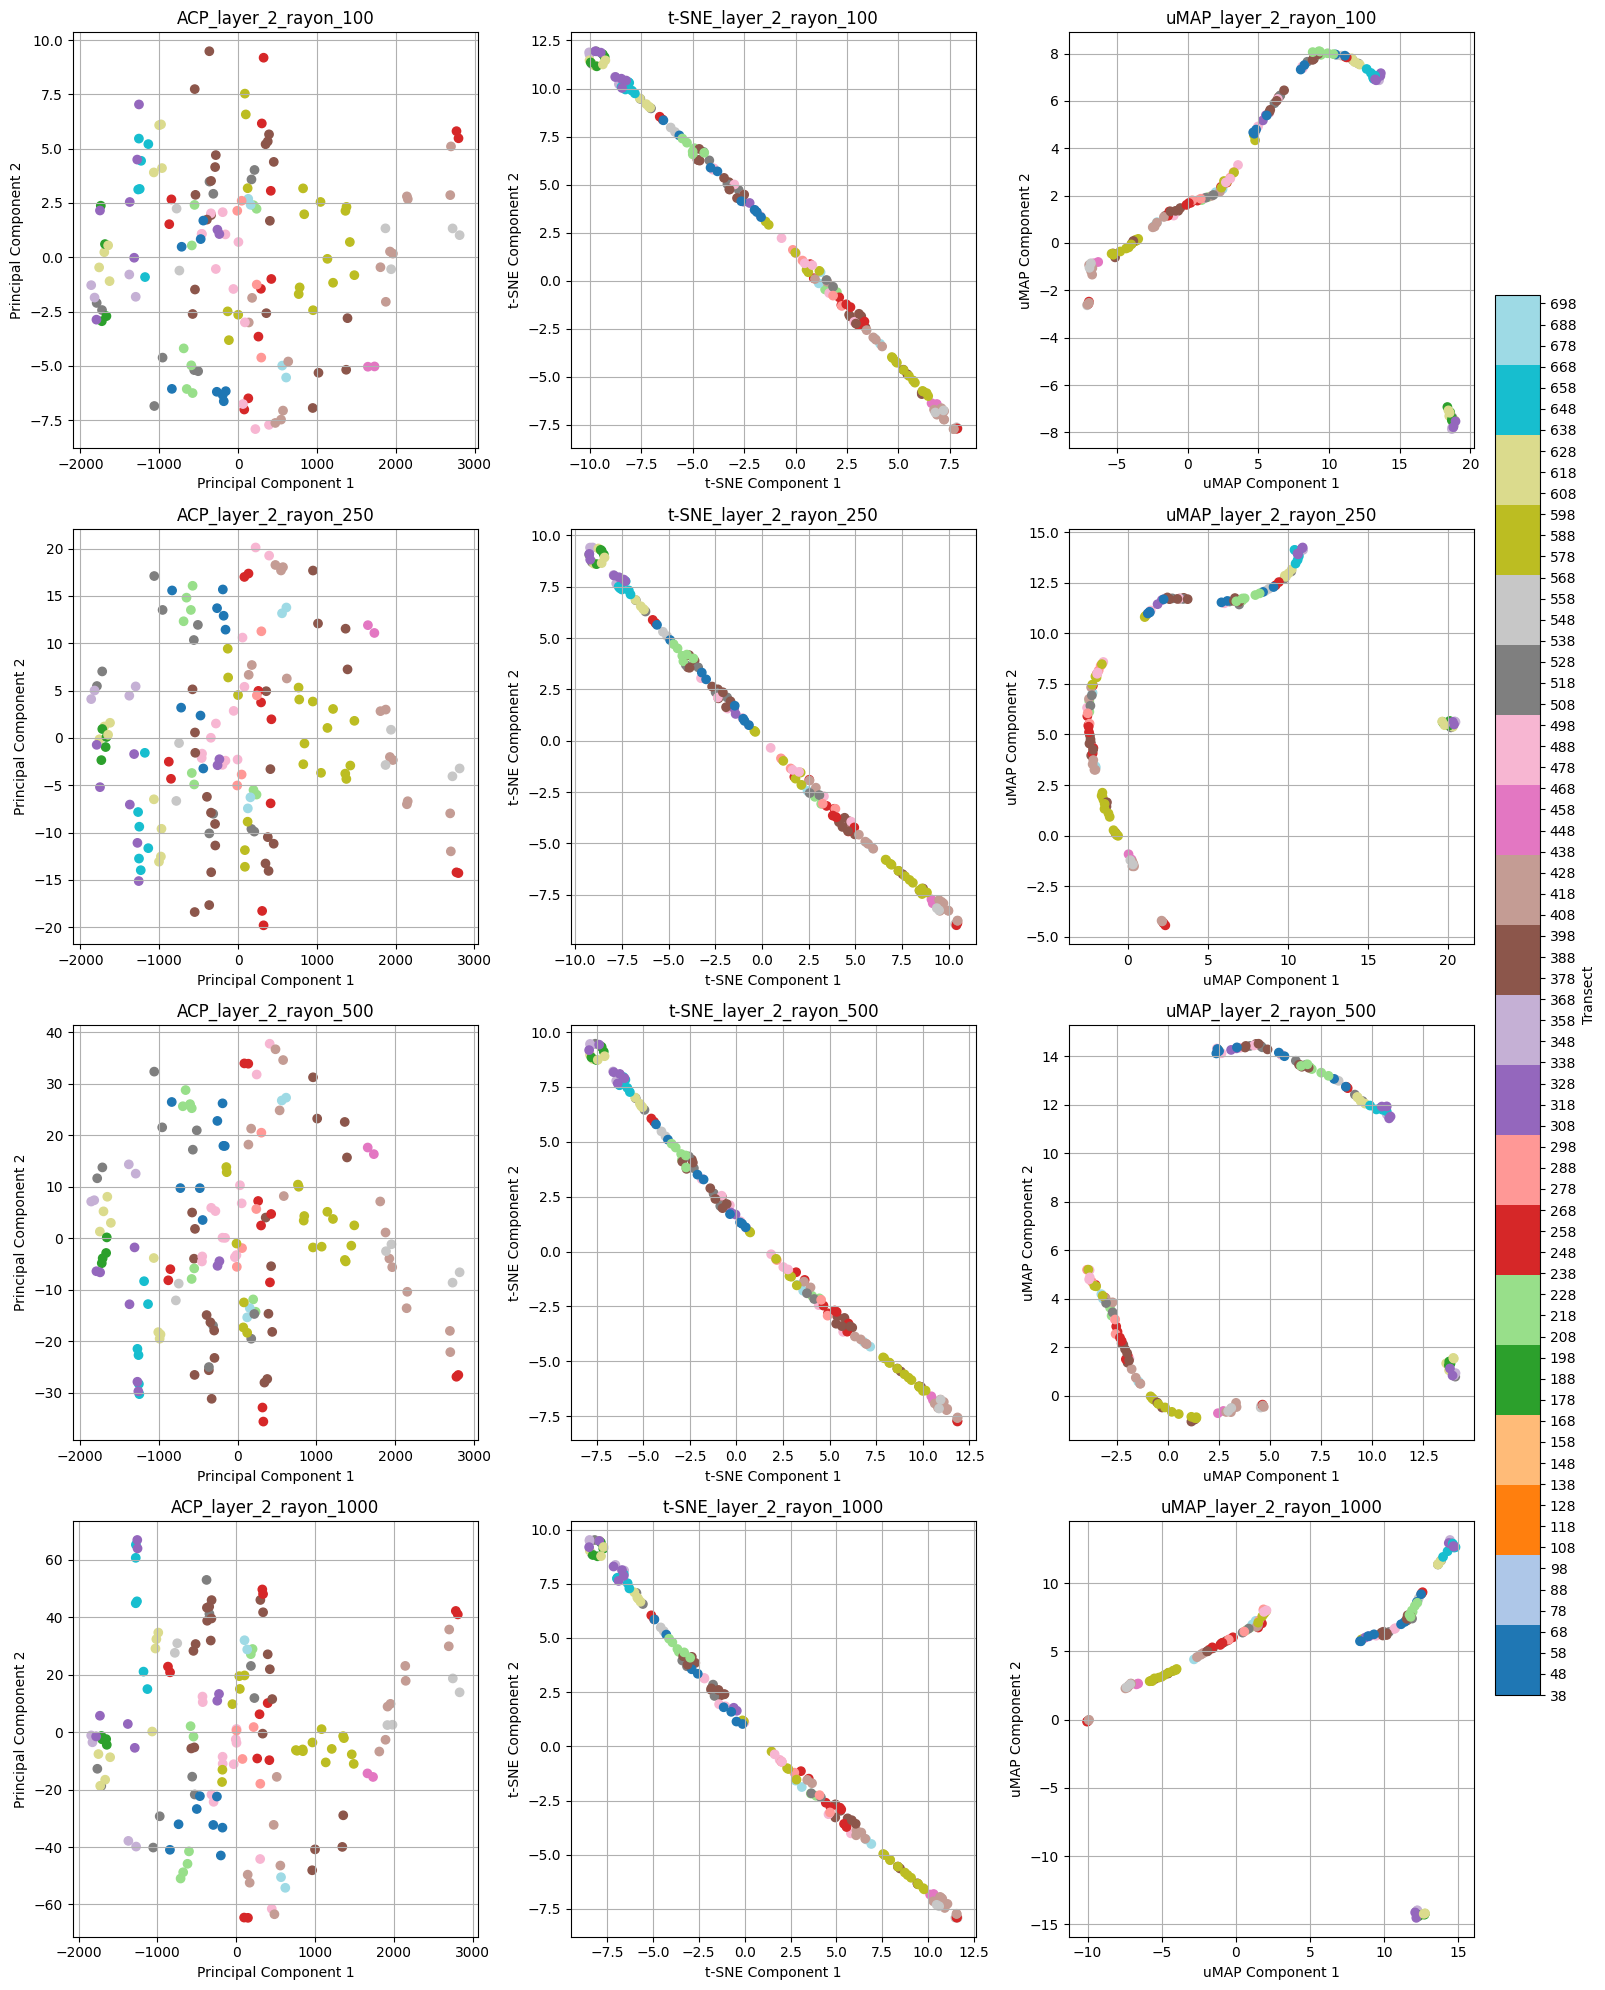

In [395]:
rayons = [100, 250, 500, 1000]

fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# ACP Plot
axs[0, 0].scatter(pca_layer_2_result_100[:, 0], pca_layer_2_result_100[:, 1], c=df_layer_2_rayon_100['Transect'], cmap=cmap_acp)
axs[0, 0].set_title('ACP_layer_2_rayon_100')
axs[0, 0].set_xlabel('Principal Component 1')
axs[0, 0].set_ylabel('Principal Component 2')
axs[0, 0].grid(True)

axs[1, 0].scatter(pca_layer_2_result_250[:, 0], pca_layer_2_result_250[:, 1], c=df_layer_2_rayon_250['Transect'], cmap=cmap_acp)
axs[1, 0].set_title('ACP_layer_2_rayon_250')
axs[1, 0].set_xlabel('Principal Component 1')
axs[1, 0].set_ylabel('Principal Component 2')
axs[1, 0].grid(True)

axs[2, 0].scatter(pca_layer_2_result_500[:, 0], pca_layer_2_result_500[:, 1], c=df_layer_2_rayon_500['Transect'], cmap=cmap_acp)
axs[2, 0].set_title('ACP_layer_2_rayon_500')
axs[2, 0].set_xlabel('Principal Component 1')
axs[2, 0].set_ylabel('Principal Component 2')
axs[2, 0].grid(True)

axs[3, 0].scatter(pca_layer_2_result_1000[:, 0], pca_layer_2_result_1000[:, 1], c=df_layer_2_rayon_1000['Transect'], cmap=cmap_acp)
axs[3, 0].set_title('ACP_layer_2_rayon_1000')
axs[3, 0].set_xlabel('Principal Component 1')
axs[3, 0].set_ylabel('Principal Component 2')
axs[3, 0].grid(True)

# t-SNE Plot
axs[0, 1].scatter(tsne_layer_2_result_100[:, 0], tsne_layer_2_result_100[:, 1], c=df_layer_2_rayon_100['Transect'], cmap=cmap_tsne)
axs[0, 1].set_title('t-SNE_layer_2_rayon_100')
axs[0, 1].set_xlabel('t-SNE Component 1')
axs[0, 1].set_ylabel('t-SNE Component 2')
axs[0, 1].grid(True)

axs[1, 1].scatter(tsne_layer_2_result_250[:, 0], tsne_layer_2_result_250[:, 1], c=df_layer_2_rayon_250['Transect'], cmap=cmap_tsne)
axs[1, 1].set_title('t-SNE_layer_2_rayon_250')
axs[1, 1].set_xlabel('t-SNE Component 1')
axs[1, 1].set_ylabel('t-SNE Component 2')
axs[1, 1].grid(True)

axs[2, 1].scatter(tsne_layer_2_result_500[:, 0], tsne_layer_2_result_500[:, 1], c=df_layer_2_rayon_500['Transect'], cmap=cmap_tsne)
axs[2, 1].set_title('t-SNE_layer_2_rayon_500')
axs[2, 1].set_xlabel('t-SNE Component 1')
axs[2, 1].set_ylabel('t-SNE Component 2')
axs[2, 1].grid(True)

axs[3, 1].scatter(tsne_layer_2_result_1000[:, 0], tsne_layer_2_result_1000[:, 1], c=df_layer_2_rayon_1000['Transect'], cmap=cmap_tsne)
axs[3, 1].set_title('t-SNE_layer_2_rayon_1000')
axs[3, 1].set_xlabel('t-SNE Component 1')
axs[3, 1].set_ylabel('t-SNE Component 2')
axs[3, 1].grid(True)

# uMAP Plot
scatter_umap_100 = axs[0, 2].scatter(umap_layer_2_result_100[:, 0], umap_layer_2_result_100[:, 1], c=df_layer_2_rayon_100['Transect'], cmap=cmap_umap)
axs[0, 2].set_title('uMAP_layer_2_rayon_100')
axs[0, 2].set_xlabel('uMAP Component 1')
axs[0, 2].set_ylabel('uMAP Component 2')
axs[0, 2].grid(True)

scatter_umap_250 = axs[1, 2].scatter(umap_layer_2_result_250[:, 0], umap_layer_2_result_250[:, 1], c=df_layer_2_rayon_250['Transect'], cmap=cmap_umap)
axs[1, 2].set_title('uMAP_layer_2_rayon_250')
axs[1, 2].set_xlabel('uMAP Component 1')
axs[1, 2].set_ylabel('uMAP Component 2')
axs[1, 2].grid(True)

scatter_umap_500 = axs[2, 2].scatter(umap_layer_2_result_500[:, 0], umap_layer_2_result_500[:, 1], c=df_layer_2_rayon_500['Transect'], cmap=cmap_umap)
axs[2, 2].set_title('uMAP_layer_2_rayon_500')
axs[2, 2].set_xlabel('uMAP Component 1')
axs[2, 2].set_ylabel('uMAP Component 2')
axs[2, 2].grid(True)

scatter_umap_1000 = axs[3, 2].scatter(umap_layer_2_result_1000[:, 0], umap_layer_2_result_1000[:, 1], c=df_layer_2_rayon_1000['Transect'], cmap=cmap_umap)
axs[3, 2].set_title('uMAP_layer_2_rayon_1000')
axs[3, 2].set_xlabel('uMAP Component 1')
axs[3, 2].set_ylabel('uMAP Component 2')
axs[3, 2].grid(True)

# Adjust layout to make space for the colorbar on the right
plt.subplots_adjust(right=0.8)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
# Spécifiez les étiquettes personnalisées pour la colorbar (tous les 50)
cbar_ticks = range(df_layer_2_rayon_1000['Transect'].min(), df_layer_2_rayon_1000['Transect'].max() + 1, 10)

cbar = fig.colorbar(scatter_umap_1000, cax=cbar_ax, ticks=cbar_ticks)
cbar.set_label('Transect')
plt.tight_layout()
plt.show()


### Layer 3

<ipython-input-396-4a7954a928eb>:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


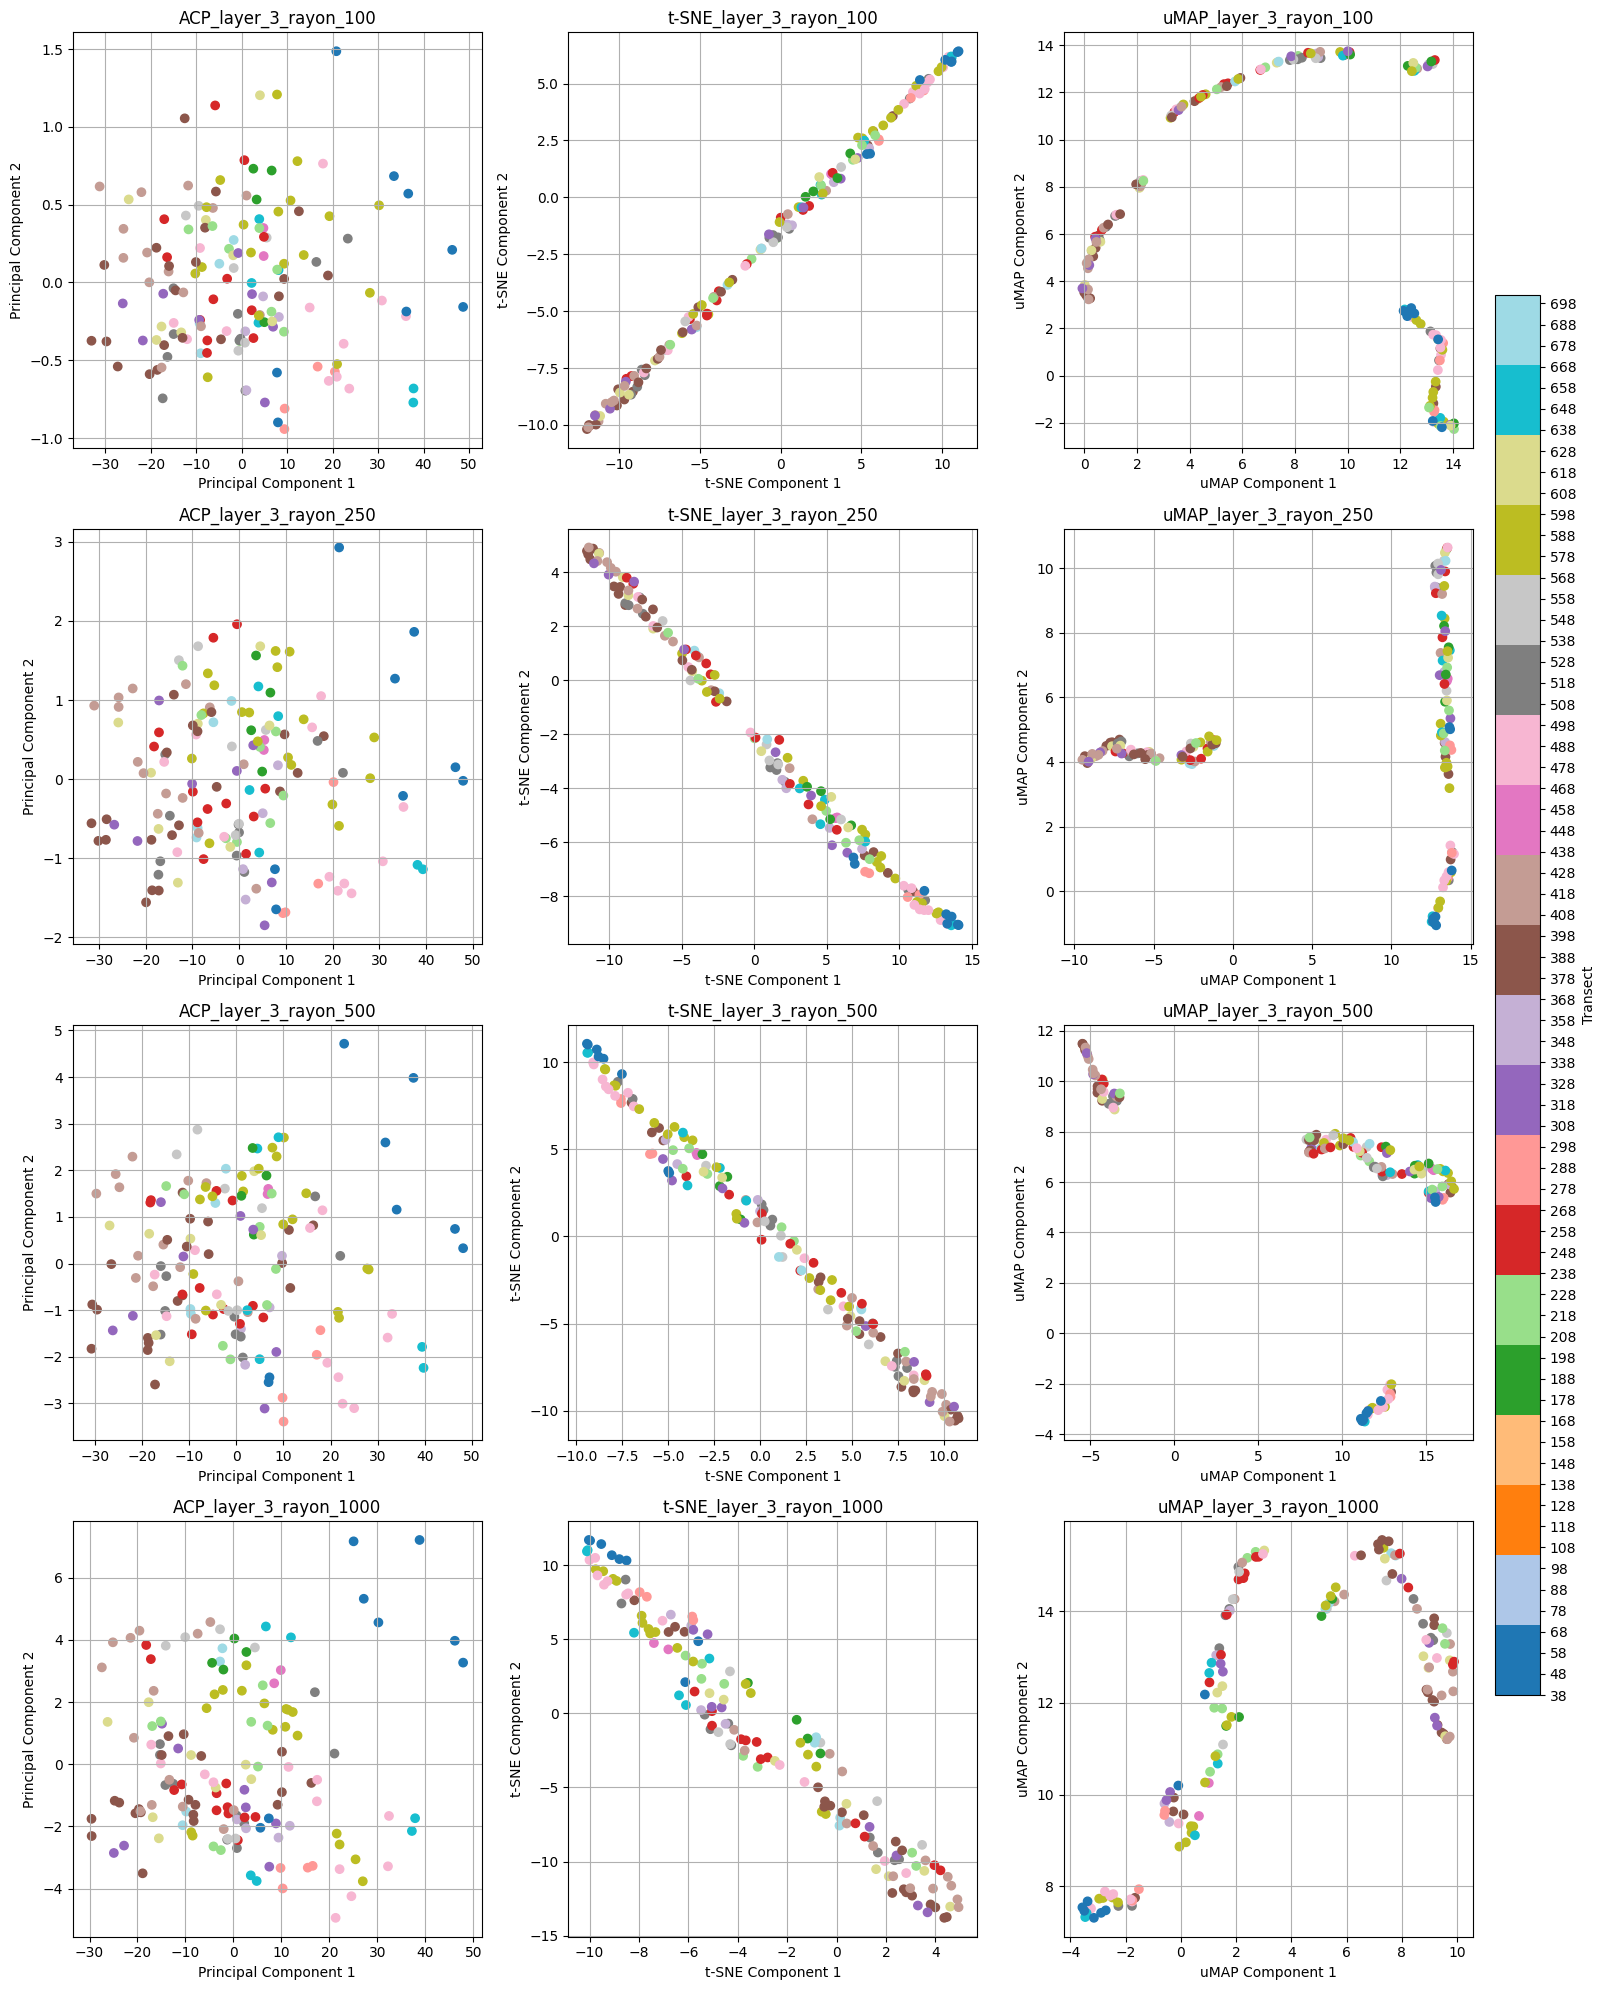

In [396]:
rayons = [100, 250, 500, 1000]

fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# ACP Plot
axs[0, 0].scatter(pca_layer_3_result_100[:, 0], pca_layer_3_result_100[:, 1], c=df_layer_3_rayon_100['Transect'], cmap=cmap_acp)
axs[0, 0].set_title('ACP_layer_3_rayon_100')
axs[0, 0].set_xlabel('Principal Component 1')
axs[0, 0].set_ylabel('Principal Component 2')
axs[0, 0].grid(True)

axs[1, 0].scatter(pca_layer_3_result_250[:, 0], pca_layer_3_result_250[:, 1], c=df_layer_3_rayon_250['Transect'], cmap=cmap_acp)
axs[1, 0].set_title('ACP_layer_3_rayon_250')
axs[1, 0].set_xlabel('Principal Component 1')
axs[1, 0].set_ylabel('Principal Component 2')
axs[1, 0].grid(True)

axs[2, 0].scatter(pca_layer_3_result_500[:, 0], pca_layer_3_result_500[:, 1], c=df_layer_3_rayon_500['Transect'], cmap=cmap_acp)
axs[2, 0].set_title('ACP_layer_3_rayon_500')
axs[2, 0].set_xlabel('Principal Component 1')
axs[2, 0].set_ylabel('Principal Component 2')
axs[2, 0].grid(True)

axs[3, 0].scatter(pca_layer_3_result_1000[:, 0], pca_layer_3_result_1000[:, 1], c=df_layer_3_rayon_1000['Transect'], cmap=cmap_acp)
axs[3, 0].set_title('ACP_layer_3_rayon_1000')
axs[3, 0].set_xlabel('Principal Component 1')
axs[3, 0].set_ylabel('Principal Component 2')
axs[3, 0].grid(True)

# t-SNE Plot
axs[0, 1].scatter(tsne_layer_3_result_100[:, 0], tsne_layer_3_result_100[:, 1], c=df_layer_3_rayon_100['Transect'], cmap=cmap_tsne)
axs[0, 1].set_title('t-SNE_layer_3_rayon_100')
axs[0, 1].set_xlabel('t-SNE Component 1')
axs[0, 1].set_ylabel('t-SNE Component 2')
axs[0, 1].grid(True)

axs[1, 1].scatter(tsne_layer_3_result_250[:, 0], tsne_layer_3_result_250[:, 1], c=df_layer_3_rayon_250['Transect'], cmap=cmap_tsne)
axs[1, 1].set_title('t-SNE_layer_3_rayon_250')
axs[1, 1].set_xlabel('t-SNE Component 1')
axs[1, 1].set_ylabel('t-SNE Component 2')
axs[1, 1].grid(True)

axs[2, 1].scatter(tsne_layer_3_result_500[:, 0], tsne_layer_3_result_500[:, 1], c=df_layer_3_rayon_500['Transect'], cmap=cmap_tsne)
axs[2, 1].set_title('t-SNE_layer_3_rayon_500')
axs[2, 1].set_xlabel('t-SNE Component 1')
axs[2, 1].set_ylabel('t-SNE Component 2')
axs[2, 1].grid(True)

axs[3, 1].scatter(tsne_layer_3_result_1000[:, 0], tsne_layer_3_result_1000[:, 1], c=df_layer_3_rayon_1000['Transect'], cmap=cmap_tsne)
axs[3, 1].set_title('t-SNE_layer_3_rayon_1000')
axs[3, 1].set_xlabel('t-SNE Component 1')
axs[3, 1].set_ylabel('t-SNE Component 2')
axs[3, 1].grid(True)

# uMAP Plot
scatter_umap_100 = axs[0, 2].scatter(umap_layer_3_result_100[:, 0], umap_layer_3_result_100[:, 1], c=df_layer_3_rayon_100['Transect'], cmap=cmap_umap)
axs[0, 2].set_title('uMAP_layer_3_rayon_100')
axs[0, 2].set_xlabel('uMAP Component 1')
axs[0, 2].set_ylabel('uMAP Component 2')
axs[0, 2].grid(True)

scatter_umap_250 = axs[1, 2].scatter(umap_layer_3_result_250[:, 0], umap_layer_3_result_250[:, 1], c=df_layer_3_rayon_250['Transect'], cmap=cmap_umap)
axs[1, 2].set_title('uMAP_layer_3_rayon_250')
axs[1, 2].set_xlabel('uMAP Component 1')
axs[1, 2].set_ylabel('uMAP Component 2')
axs[1, 2].grid(True)

scatter_umap_500 = axs[2, 2].scatter(umap_layer_3_result_500[:, 0], umap_layer_3_result_500[:, 1], c=df_layer_3_rayon_500['Transect'], cmap=cmap_umap)
axs[2, 2].set_title('uMAP_layer_3_rayon_500')
axs[2, 2].set_xlabel('uMAP Component 1')
axs[2, 2].set_ylabel('uMAP Component 2')
axs[2, 2].grid(True)

scatter_umap_1000 = axs[3, 2].scatter(umap_layer_3_result_1000[:, 0], umap_layer_3_result_1000[:, 1], c=df_layer_3_rayon_1000['Transect'], cmap=cmap_umap)
axs[3, 2].set_title('uMAP_layer_3_rayon_1000')
axs[3, 2].set_xlabel('uMAP Component 1')
axs[3, 2].set_ylabel('uMAP Component 2')
axs[3, 2].grid(True)

# Adjust layout to make space for the colorbar on the right
plt.subplots_adjust(right=0.8)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
# Spécifiez les étiquettes personnalisées pour la colorbar (tous les 50)
cbar_ticks = range(df_layer_3_rayon_1000['Transect'].min(), df_layer_3_rayon_1000['Transect'].max() + 1, 10)

cbar = fig.colorbar(scatter_umap_1000, cax=cbar_ax, ticks=cbar_ticks)
cbar.set_label('Transect')
plt.tight_layout()
plt.show()


### Layer 4

<ipython-input-397-cd9eff3d68c4>:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


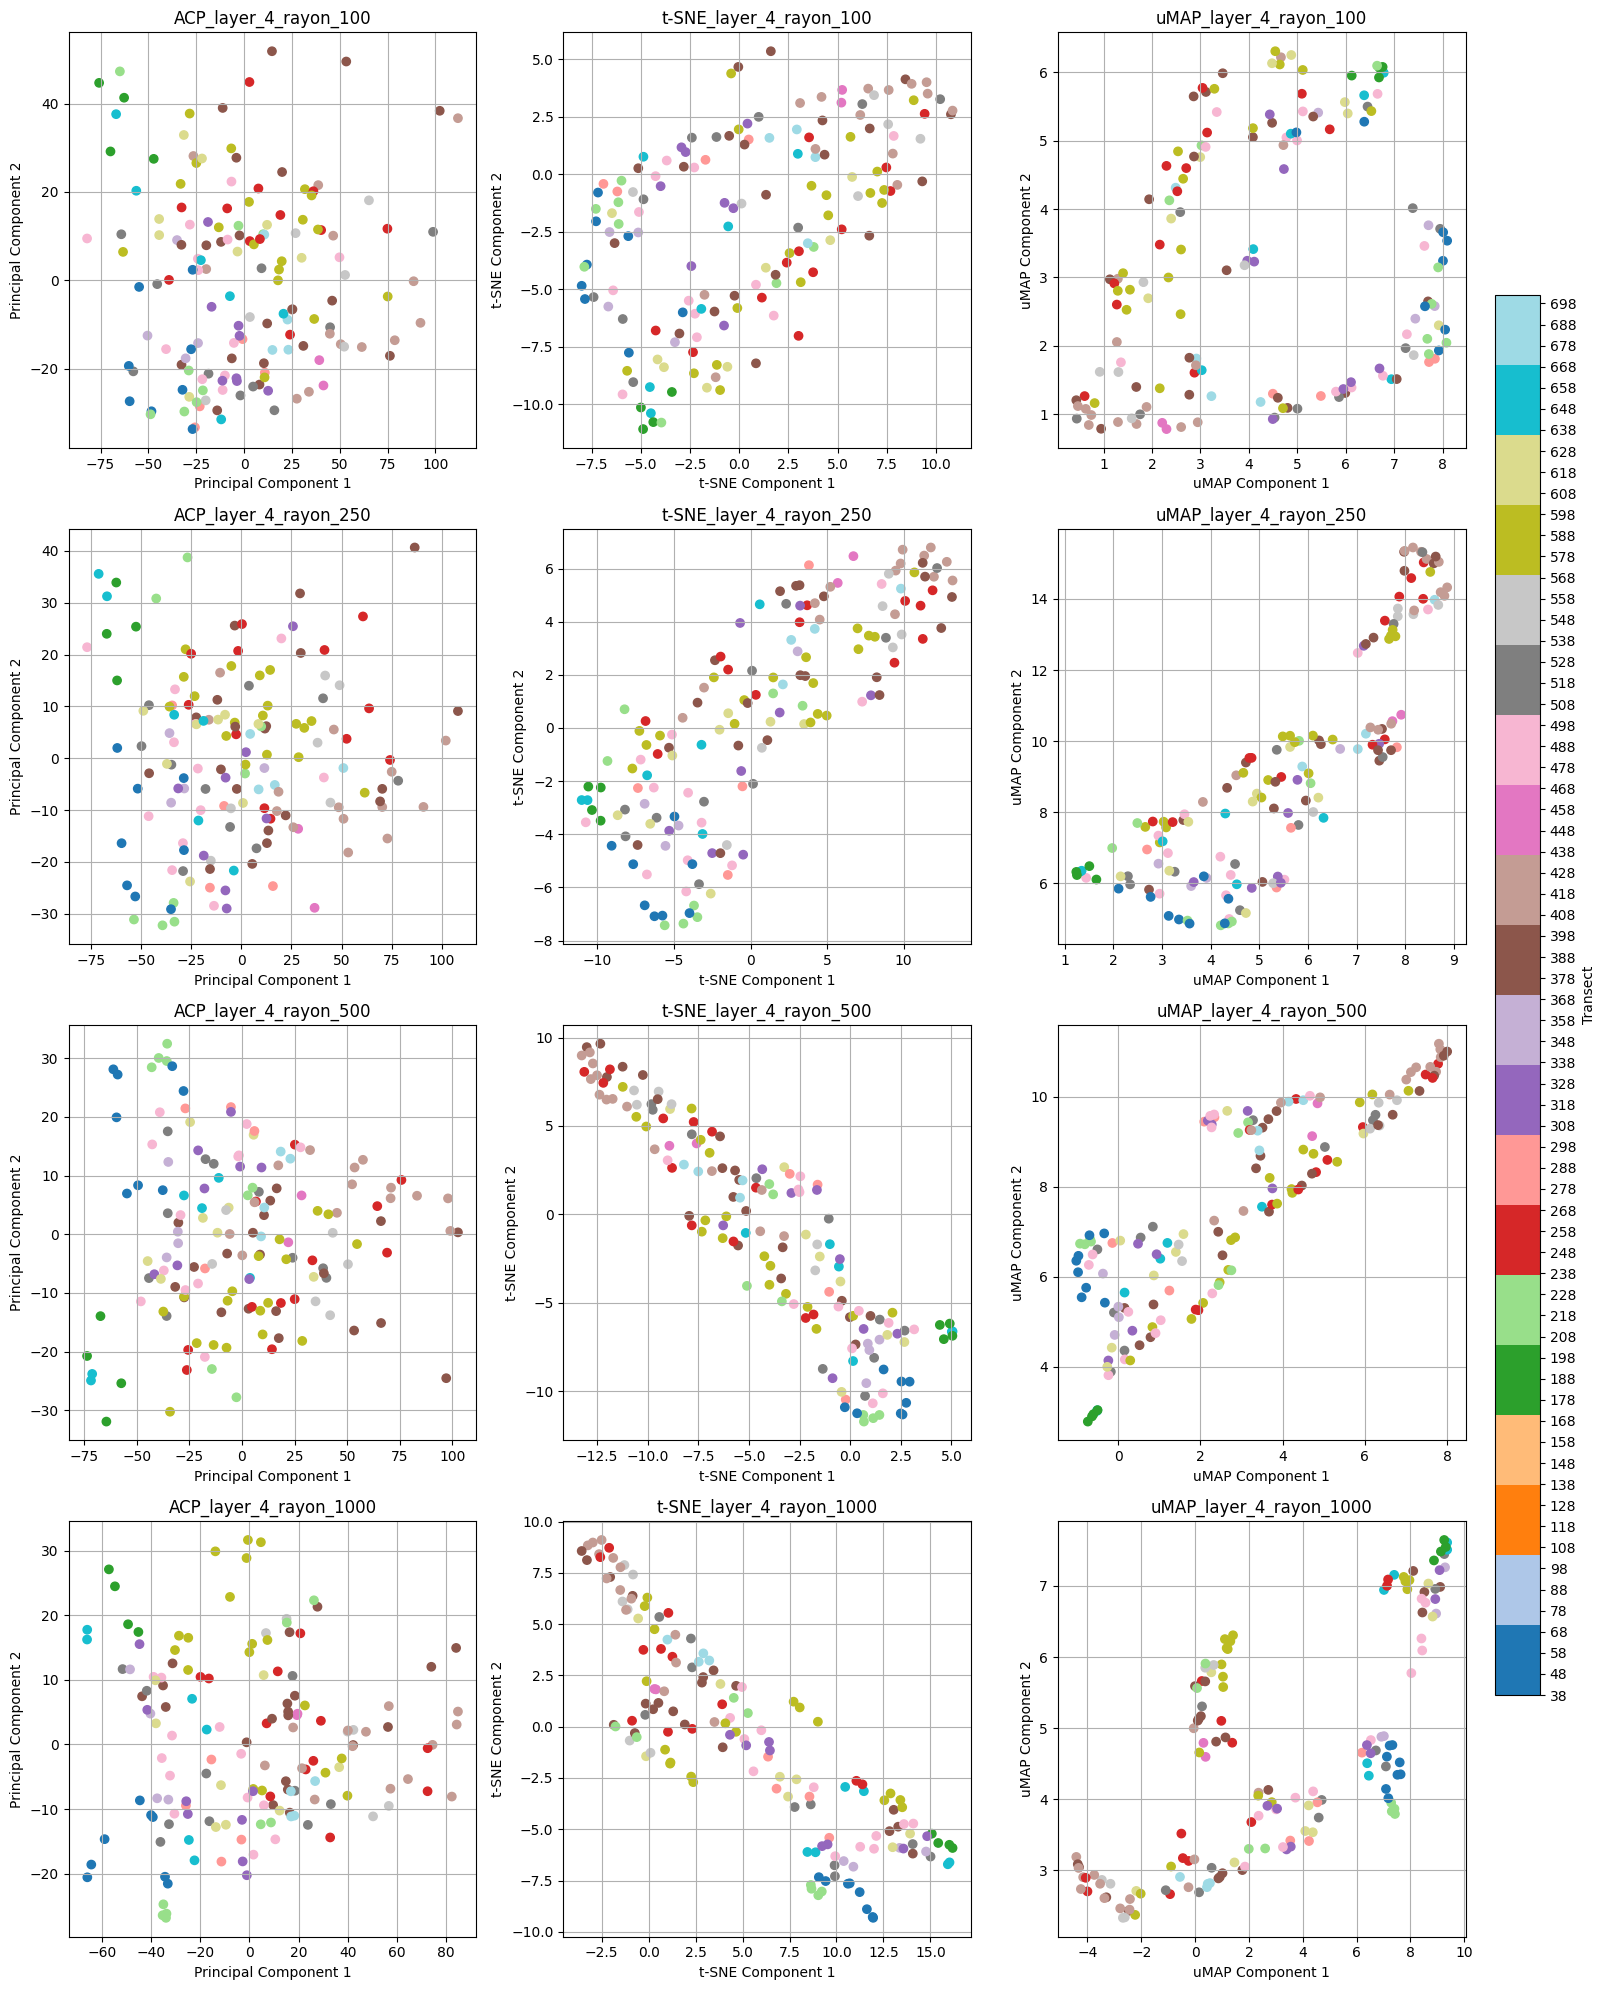

In [397]:
rayons = [100, 250, 500, 1000]

fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# ACP Plot
axs[0, 0].scatter(pca_layer_4_result_100[:, 0], pca_layer_4_result_100[:, 1], c=df_layer_4_rayon_100['Transect'], cmap=cmap_acp)
axs[0, 0].set_title('ACP_layer_4_rayon_100')
axs[0, 0].set_xlabel('Principal Component 1')
axs[0, 0].set_ylabel('Principal Component 2')
axs[0, 0].grid(True)

axs[1, 0].scatter(pca_layer_4_result_250[:, 0], pca_layer_4_result_250[:, 1], c=df_layer_4_rayon_250['Transect'], cmap=cmap_acp)
axs[1, 0].set_title('ACP_layer_4_rayon_250')
axs[1, 0].set_xlabel('Principal Component 1')
axs[1, 0].set_ylabel('Principal Component 2')
axs[1, 0].grid(True)

axs[2, 0].scatter(pca_layer_4_result_500[:, 0], pca_layer_4_result_500[:, 1], c=df_layer_4_rayon_500['Transect'], cmap=cmap_acp)
axs[2, 0].set_title('ACP_layer_4_rayon_500')
axs[2, 0].set_xlabel('Principal Component 1')
axs[2, 0].set_ylabel('Principal Component 2')
axs[2, 0].grid(True)

axs[3, 0].scatter(pca_layer_4_result_1000[:, 0], pca_layer_4_result_1000[:, 1], c=df_layer_4_rayon_1000['Transect'], cmap=cmap_acp)
axs[3, 0].set_title('ACP_layer_4_rayon_1000')
axs[3, 0].set_xlabel('Principal Component 1')
axs[3, 0].set_ylabel('Principal Component 2')
axs[3, 0].grid(True)

# t-SNE Plot
axs[0, 1].scatter(tsne_layer_4_result_100[:, 0], tsne_layer_4_result_100[:, 1], c=df_layer_4_rayon_100['Transect'], cmap=cmap_tsne)
axs[0, 1].set_title('t-SNE_layer_4_rayon_100')
axs[0, 1].set_xlabel('t-SNE Component 1')
axs[0, 1].set_ylabel('t-SNE Component 2')
axs[0, 1].grid(True)

axs[1, 1].scatter(tsne_layer_4_result_250[:, 0], tsne_layer_4_result_250[:, 1], c=df_layer_4_rayon_250['Transect'], cmap=cmap_tsne)
axs[1, 1].set_title('t-SNE_layer_4_rayon_250')
axs[1, 1].set_xlabel('t-SNE Component 1')
axs[1, 1].set_ylabel('t-SNE Component 2')
axs[1, 1].grid(True)

axs[2, 1].scatter(tsne_layer_4_result_500[:, 0], tsne_layer_4_result_500[:, 1], c=df_layer_4_rayon_500['Transect'], cmap=cmap_tsne)
axs[2, 1].set_title('t-SNE_layer_4_rayon_500')
axs[2, 1].set_xlabel('t-SNE Component 1')
axs[2, 1].set_ylabel('t-SNE Component 2')
axs[2, 1].grid(True)

axs[3, 1].scatter(tsne_layer_4_result_1000[:, 0], tsne_layer_4_result_1000[:, 1], c=df_layer_4_rayon_1000['Transect'], cmap=cmap_tsne)
axs[3, 1].set_title('t-SNE_layer_4_rayon_1000')
axs[3, 1].set_xlabel('t-SNE Component 1')
axs[3, 1].set_ylabel('t-SNE Component 2')
axs[3, 1].grid(True)

# uMAP Plot
scatter_umap_100 = axs[0, 2].scatter(umap_layer_4_result_100[:, 0], umap_layer_4_result_100[:, 1], c=df_layer_4_rayon_100['Transect'], cmap=cmap_umap)
axs[0, 2].set_title('uMAP_layer_4_rayon_100')
axs[0, 2].set_xlabel('uMAP Component 1')
axs[0, 2].set_ylabel('uMAP Component 2')
axs[0, 2].grid(True)

scatter_umap_250 = axs[1, 2].scatter(umap_layer_4_result_250[:, 0], umap_layer_4_result_250[:, 1], c=df_layer_4_rayon_250['Transect'], cmap=cmap_umap)
axs[1, 2].set_title('uMAP_layer_4_rayon_250')
axs[1, 2].set_xlabel('uMAP Component 1')
axs[1, 2].set_ylabel('uMAP Component 2')
axs[1, 2].grid(True)

scatter_umap_500 = axs[2, 2].scatter(umap_layer_4_result_500[:, 0], umap_layer_4_result_500[:, 1], c=df_layer_4_rayon_500['Transect'], cmap=cmap_umap)
axs[2, 2].set_title('uMAP_layer_4_rayon_500')
axs[2, 2].set_xlabel('uMAP Component 1')
axs[2, 2].set_ylabel('uMAP Component 2')
axs[2, 2].grid(True)

scatter_umap_1000 = axs[3, 2].scatter(umap_layer_4_result_1000[:, 0], umap_layer_4_result_1000[:, 1], c=df_layer_4_rayon_1000['Transect'], cmap=cmap_umap)
axs[3, 2].set_title('uMAP_layer_4_rayon_1000')
axs[3, 2].set_xlabel('uMAP Component 1')
axs[3, 2].set_ylabel('uMAP Component 2')
axs[3, 2].grid(True)

# Adjust layout to make space for the colorbar on the right
plt.subplots_adjust(right=0.8)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
# Spécifiez les étiquettes personnalisées pour la colorbar (tous les 50)
cbar_ticks = range(df_layer_4_rayon_1000['Transect'].min(), df_layer_4_rayon_1000['Transect'].max() + 1, 10)

cbar = fig.colorbar(scatter_umap_1000, cax=cbar_ax, ticks=cbar_ticks)
cbar.set_label('Transect')
plt.tight_layout()
plt.show()


## Dictionnaire : Transect -> Commune+LD+Dynamique

In [398]:
result_transect_commune_ld_dynamique

Transect  Commune  LD  Dynamique
0         38       11  32          1
1         44       11  32          0
2         46       28  25          0
3         47       28  25          1
4        172       15  30          0
..       ...      ...  ..        ...
69       638        6  35          0
70       641        6  35          1
71       646        1  12          1
72       682       23  29          0
73       702        0  17          0

[74 rows x 4 columns]

In [399]:
# Si tu veux accéder à des valeurs spécifiques, tu peux les extraire comme ceci :
for index, row in result_transect_commune_ld_dynamique.iterrows():
    transect_value = row['Transect']
    commune_value = row['Commune']
    ld_value = row['LD']
    dynamique_value = row['Dynamique']

    print(f"Transect: {transect_value}, Commune: {commune_value}, LD: {ld_value}, Dynamique: {dynamique_value}")

Transect: 38, Commune: 11, LD: 32, Dynamique: 1
Transect: 44, Commune: 11, LD: 32, Dynamique: 0
Transect: 46, Commune: 28, LD: 25, Dynamique: 0
Transect: 47, Commune: 28, LD: 25, Dynamique: 1
Transect: 172, Commune: 15, LD: 30, Dynamique: 0
Transect: 200, Commune: 15, LD: 30, Dynamique: 1
Transect: 205, Commune: 15, LD: 28, Dynamique: 0
Transect: 206, Commune: 15, LD: 28, Dynamique: 1
Transect: 228, Commune: 24, LD: 7, Dynamique: 0
Transect: 235, Commune: 0, LD: 17, Dynamique: 1
Transect: 244, Commune: 26, LD: 14, Dynamique: 1
Transect: 245, Commune: 26, LD: 14, Dynamique: 0
Transect: 246, Commune: 9, LD: 6, Dynamique: 0
Transect: 256, Commune: 7, LD: 13, Dynamique: 1
Transect: 257, Commune: 7, LD: 0, Dynamique: 0
Transect: 265, Commune: 10, LD: 27, Dynamique: 1
Transect: 298, Commune: 12, LD: 8, Dynamique: 1
Transect: 300, Commune: 12, LD: 8, Dynamique: 0
Transect: 313, Commune: 1, LD: 12, Dynamique: 0
Transect: 321, Commune: 19, LD: 19, Dynamique: 1
Transect: 326, Commune: 4, LD: 26,

In [400]:
for k,v in encoded_values.items() :
  print(k, ":", v)

LD : {'Ayet': 0, 'Cirque de Gerac': 1, "Col d'Escots": 2, 'Col de Grail': 3, 'Col de Nédé': 4, 'Col de Pause': 5, "Col de l'Arech": 6, "Col de l'Herbe Soulette": 7, 'Col du Sasc': 8, 'Comte': 9, 'Coume': 10, 'Estagnet': 11, "Etang d'Appy": 12, 'Eychelle': 13, 'Eylie': 14, 'Frau': 15, 'Guzet-Neige': 16, 'Isard': 17, 'Le Clot': 18, "Mont d'Olmes": 19, 'Orle': 20, 'Pailheres': 21, 'Pic de Montbuou': 22, 'Pic du Midi de Bordes': 23, 'Pla de Montcamp': 24, 'Pla des Salines': 25, 'Plateau de Beille': 26, 'Pouill': 27, 'Puig del Pam': 28, 'RNCFS': 29, "Roc d'Aude": 30, 'Saubé': 31, 'Serra dels Alarbs': 32, 'Soularac': 33, 'Trabesses': 34, 'Trimouns': 35, 'Turon de Rose': 36, 'Val de Sos': 37}
Position : {'estive': 0, 'lisiere': 1}
Dynamique : {'bleu': 0, 'rouge': 1}
Commune : {'Antras': 0, 'Appy': 1, 'Arrien-en-Bethmale': 2, 'Ascou': 3, 'Aston': 4, 'Aulus-les-Bains': 5, 'Bestiac': 6, 'Bethmale': 7, 'Bonac': 8, 'Bonac-Irazein': 9, 'Couflens': 10, 'Formiguères': 11, 'Gestiès': 12, 'Goulier': 13

-----

## Coloriage par Dynamique + Position

In [401]:
df_layer_1_rayon_100 = pd.concat([df_layer_1_rayon_100, df_layer_1_target_rayon_100], axis=1)
df_layer_1_rayon_250 = pd.concat([df_layer_1_rayon_250, df_layer_1_target_rayon_250], axis=1)
df_layer_1_rayon_500 = pd.concat([df_layer_1_rayon_500, df_layer_1_target_rayon_500], axis=1)
df_layer_1_rayon_1000 = pd.concat([df_layer_1_rayon_1000, df_layer_1_target_rayon_1000], axis=1)

df_layer_2_rayon_100 = pd.concat([df_layer_2_rayon_100, df_layer_2_target_rayon_100], axis=1)
df_layer_2_rayon_250 = pd.concat([df_layer_2_rayon_250, df_layer_2_target_rayon_250], axis=1)
df_layer_2_rayon_500 = pd.concat([df_layer_2_rayon_500, df_layer_2_target_rayon_500], axis=1)
df_layer_2_rayon_1000 = pd.concat([df_layer_2_rayon_1000, df_layer_2_target_rayon_1000], axis=1)

df_layer_3_rayon_100 = pd.concat([df_layer_3_rayon_100, df_layer_3_target_rayon_100], axis=1)
df_layer_3_rayon_250 = pd.concat([df_layer_3_rayon_250, df_layer_3_target_rayon_250], axis=1)
df_layer_3_rayon_500 = pd.concat([df_layer_3_rayon_500, df_layer_3_target_rayon_500], axis=1)
df_layer_3_rayon_1000 = pd.concat([df_layer_3_rayon_1000, df_layer_3_target_rayon_1000], axis=1)

df_layer_4_rayon_100 = pd.concat([df_layer_4_rayon_100, df_layer_4_target_rayon_100], axis=1)
df_layer_4_rayon_250 = pd.concat([df_layer_4_rayon_250, df_layer_4_target_rayon_250], axis=1)
df_layer_4_rayon_500 = pd.concat([df_layer_4_rayon_500, df_layer_4_target_rayon_500], axis=1)
df_layer_4_rayon_1000 = pd.concat([df_layer_4_rayon_1000, df_layer_4_target_rayon_1000], axis=1)


In [402]:
import matplotlib.pyplot as plt
import seaborn as sns

# Associe une couleur à chaque catégorie de 'target'
dy_po = {'00':'Bleu-Estive', '01':'Bleu-Lisiere', '10':'Rouge-Estive','11':'Rouge-Lisiere'}
df_layer_1_rayon_100['target_mapped'] = df_layer_1_rayon_100['target'].map(dy_po)
df_layer_1_rayon_250['target_mapped'] = df_layer_1_rayon_250['target'].map(dy_po)
df_layer_1_rayon_500['target_mapped'] = df_layer_1_rayon_500['target'].map(dy_po)
df_layer_1_rayon_1000['target_mapped'] = df_layer_1_rayon_1000['target'].map(dy_po)

df_layer_2_rayon_100['target_mapped'] = df_layer_2_rayon_100['target'].map(dy_po)
df_layer_2_rayon_250['target_mapped'] = df_layer_2_rayon_250['target'].map(dy_po)
df_layer_2_rayon_500['target_mapped'] = df_layer_2_rayon_500['target'].map(dy_po)
df_layer_2_rayon_1000['target_mapped'] = df_layer_2_rayon_1000['target'].map(dy_po)

df_layer_3_rayon_100['target_mapped'] = df_layer_3_rayon_100['target'].map(dy_po)
df_layer_3_rayon_250['target_mapped'] = df_layer_3_rayon_250['target'].map(dy_po)
df_layer_3_rayon_500['target_mapped'] = df_layer_3_rayon_500['target'].map(dy_po)
df_layer_3_rayon_1000['target_mapped'] = df_layer_3_rayon_1000['target'].map(dy_po)

df_layer_4_rayon_100['target_mapped'] = df_layer_4_rayon_100['target'].map(dy_po)
df_layer_4_rayon_250['target_mapped'] = df_layer_4_rayon_250['target'].map(dy_po)
df_layer_4_rayon_500['target_mapped'] = df_layer_4_rayon_500['target'].map(dy_po)
df_layer_4_rayon_1000['target_mapped'] = df_layer_4_rayon_1000['target'].map(dy_po)


### Layer 1

<ipython-input-403-285c9dbf306d>:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


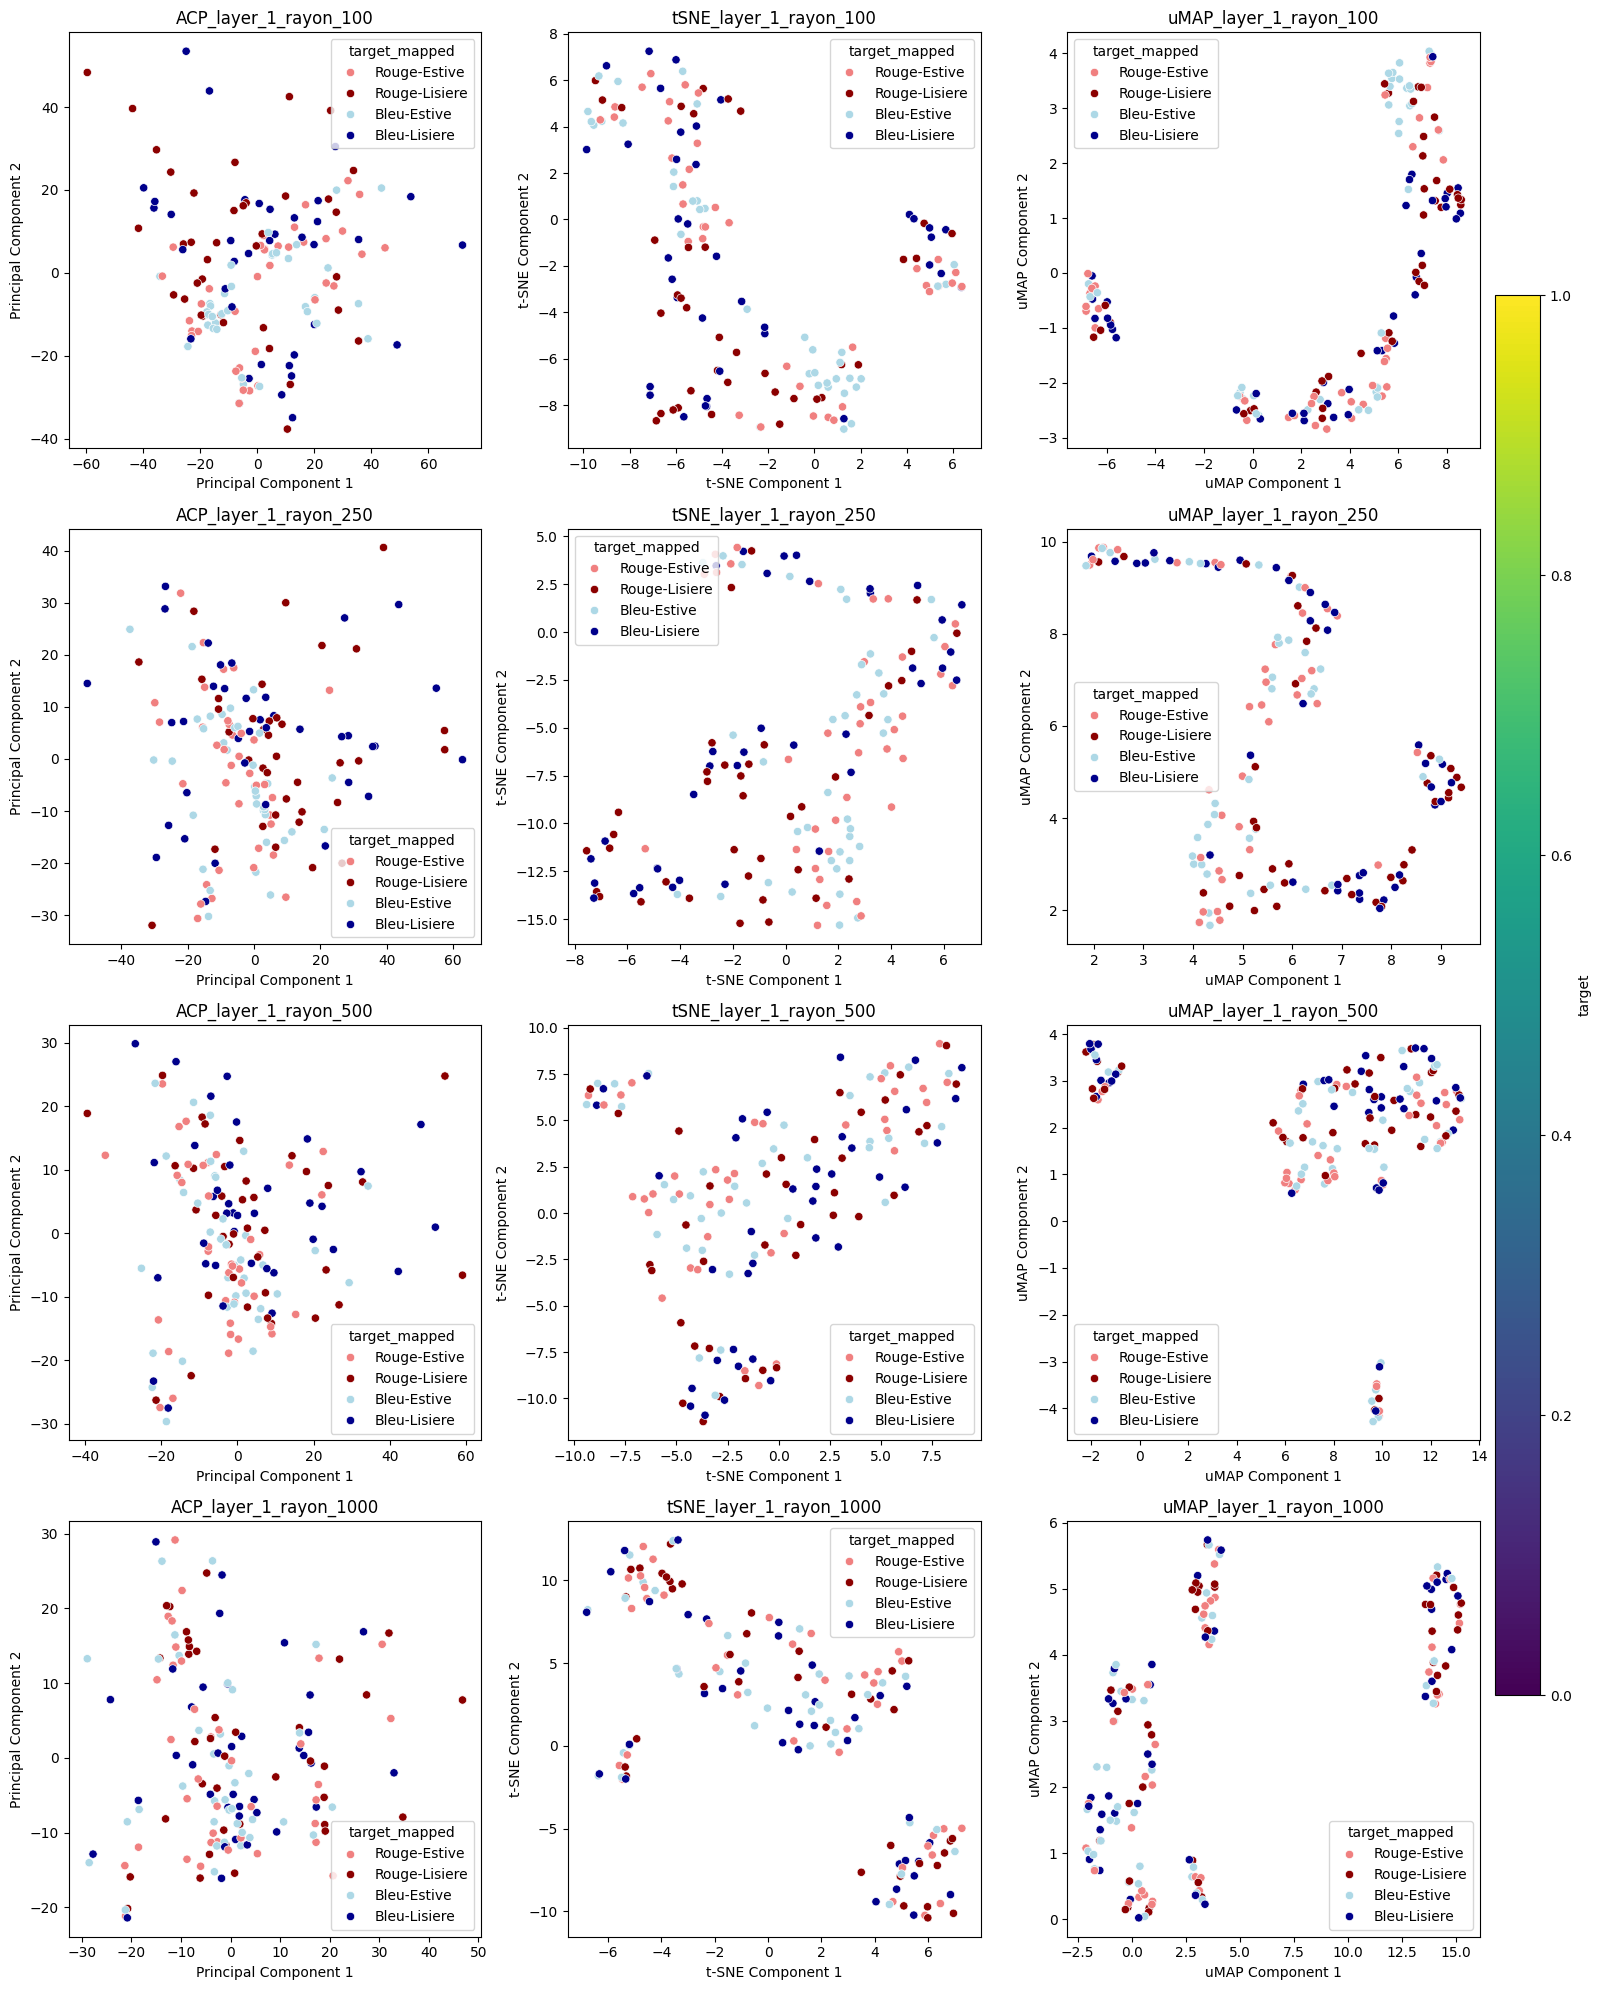

In [403]:
# Associe une couleur à chaque catégorie de 'target'
dy_po = {'00':'Bleu-Estive', '01':'Bleu-Lisiere', '10':'Rouge-Estive','11':'Rouge-Lisiere'}

# Définit une palette de couleurs personnalisée
custom_palette = {'Bleu-Estive': 'lightblue', 'Bleu-Lisiere': 'darkblue', 'Rouge-Estive': 'lightcoral', 'Rouge-Lisiere': 'darkred'}

# Set up the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# ACP Plot for rayon 100
sns.scatterplot(x=pca_layer_1_result_100[:, 0], y=pca_layer_1_result_100[:, 1], hue=df_layer_1_rayon_100['target_mapped'], palette=custom_palette, ax=axs[0, 0])
axs[0, 0].set_title('ACP_layer_1_rayon_100')
axs[0, 0].set_xlabel('Principal Component 1')
axs[0, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 100
sns.scatterplot(x=tsne_layer_1_result_100[:, 0], y=tsne_layer_1_result_100[:, 1], hue=df_layer_1_rayon_100['target_mapped'], palette=custom_palette, ax=axs[0, 1])
axs[0, 1].set_title('tSNE_layer_1_rayon_100')
axs[0, 1].set_xlabel('t-SNE Component 1')
axs[0, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 100
sns.scatterplot(x=umap_layer_1_result_100[:, 0], y=umap_layer_1_result_100[:, 1], hue=df_layer_1_rayon_100['target_mapped'], palette=custom_palette, ax=axs[0, 2])
axs[0, 2].set_title('uMAP_layer_1_rayon_100')
axs[0, 2].set_xlabel('uMAP Component 1')
axs[0, 2].set_ylabel('uMAP Component 2')

# ACP Plot for rayon 250
sns.scatterplot(x=pca_layer_1_result_250[:, 0], y=pca_layer_1_result_250[:, 1], hue=df_layer_1_rayon_250['target_mapped'], palette=custom_palette, ax=axs[1, 0])
axs[1, 0].set_title('ACP_layer_1_rayon_250')
axs[1, 0].set_xlabel('Principal Component 1')
axs[1, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 250
sns.scatterplot(x=tsne_layer_1_result_250[:, 0], y=tsne_layer_1_result_250[:, 1], hue=df_layer_1_rayon_250['target_mapped'], palette=custom_palette, ax=axs[1, 1])
axs[1, 1].set_title('tSNE_layer_1_rayon_250')
axs[1, 1].set_xlabel('t-SNE Component 1')
axs[1, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 250
sns.scatterplot(x=umap_layer_1_result_250[:, 0], y=umap_layer_1_result_250[:, 1], hue=df_layer_1_rayon_250['target_mapped'], palette=custom_palette, ax=axs[1, 2])
axs[1, 2].set_title('uMAP_layer_1_rayon_250')
axs[1, 2].set_xlabel('uMAP Component 1')
axs[1, 2].set_ylabel('uMAP Component 2')

# ACP Plot for rayon 500
sns.scatterplot(x=pca_layer_1_result_500[:, 0], y=pca_layer_1_result_500[:, 1], hue=df_layer_1_rayon_500['target_mapped'], palette=custom_palette, ax=axs[2, 0])
axs[2, 0].set_title('ACP_layer_1_rayon_500')
axs[2, 0].set_xlabel('Principal Component 1')
axs[2, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 500
sns.scatterplot(x=tsne_layer_1_result_500[:, 0], y=tsne_layer_1_result_500[:, 1], hue=df_layer_1_rayon_500['target_mapped'], palette=custom_palette, ax=axs[2, 1])
axs[2, 1].set_title('tSNE_layer_1_rayon_500')
axs[2, 1].set_xlabel('t-SNE Component 1')
axs[2, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 500
sns.scatterplot(x=umap_layer_1_result_500[:, 0], y=umap_layer_1_result_500[:, 1], hue=df_layer_1_rayon_500['target_mapped'], palette=custom_palette, ax=axs[2, 2])
axs[2, 2].set_title('uMAP_layer_1_rayon_500')
axs[2, 2].set_xlabel('uMAP Component 1')
axs[2, 2].set_ylabel('uMAP Component 2')

# ACP Plot for rayon 1000
sns.scatterplot(x=pca_layer_1_result_1000[:, 0], y=pca_layer_1_result_1000[:, 1], hue=df_layer_1_rayon_1000['target_mapped'], palette=custom_palette, ax=axs[3, 0])
axs[3, 0].set_title('ACP_layer_1_rayon_1000')
axs[3, 0].set_xlabel('Principal Component 1')
axs[3, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 1000
sns.scatterplot(x=tsne_layer_1_result_1000[:, 0], y=tsne_layer_1_result_1000[:, 1], hue=df_layer_1_rayon_1000['target_mapped'], palette=custom_palette, ax=axs[3, 1])
axs[3, 1].set_title('tSNE_layer_1_rayon_1000')
axs[3, 1].set_xlabel('t-SNE Component 1')
axs[3, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 1000
sns.scatterplot(x=umap_layer_1_result_1000[:, 0], y=umap_layer_1_result_1000[:, 1], hue=df_layer_1_rayon_1000['target_mapped'], palette=custom_palette, ax=axs[3, 2])
axs[3, 2].set_title('uMAP_layer_1_rayon_1000')
axs[3, 2].set_xlabel('uMAP Component 1')
axs[3, 2].set_ylabel('uMAP Component 2')

# Adjust layout to make space for the colorbar on the right
plt.subplots_adjust(right=0.8)


plt.tight_layout()
plt.show()


### Layer 2

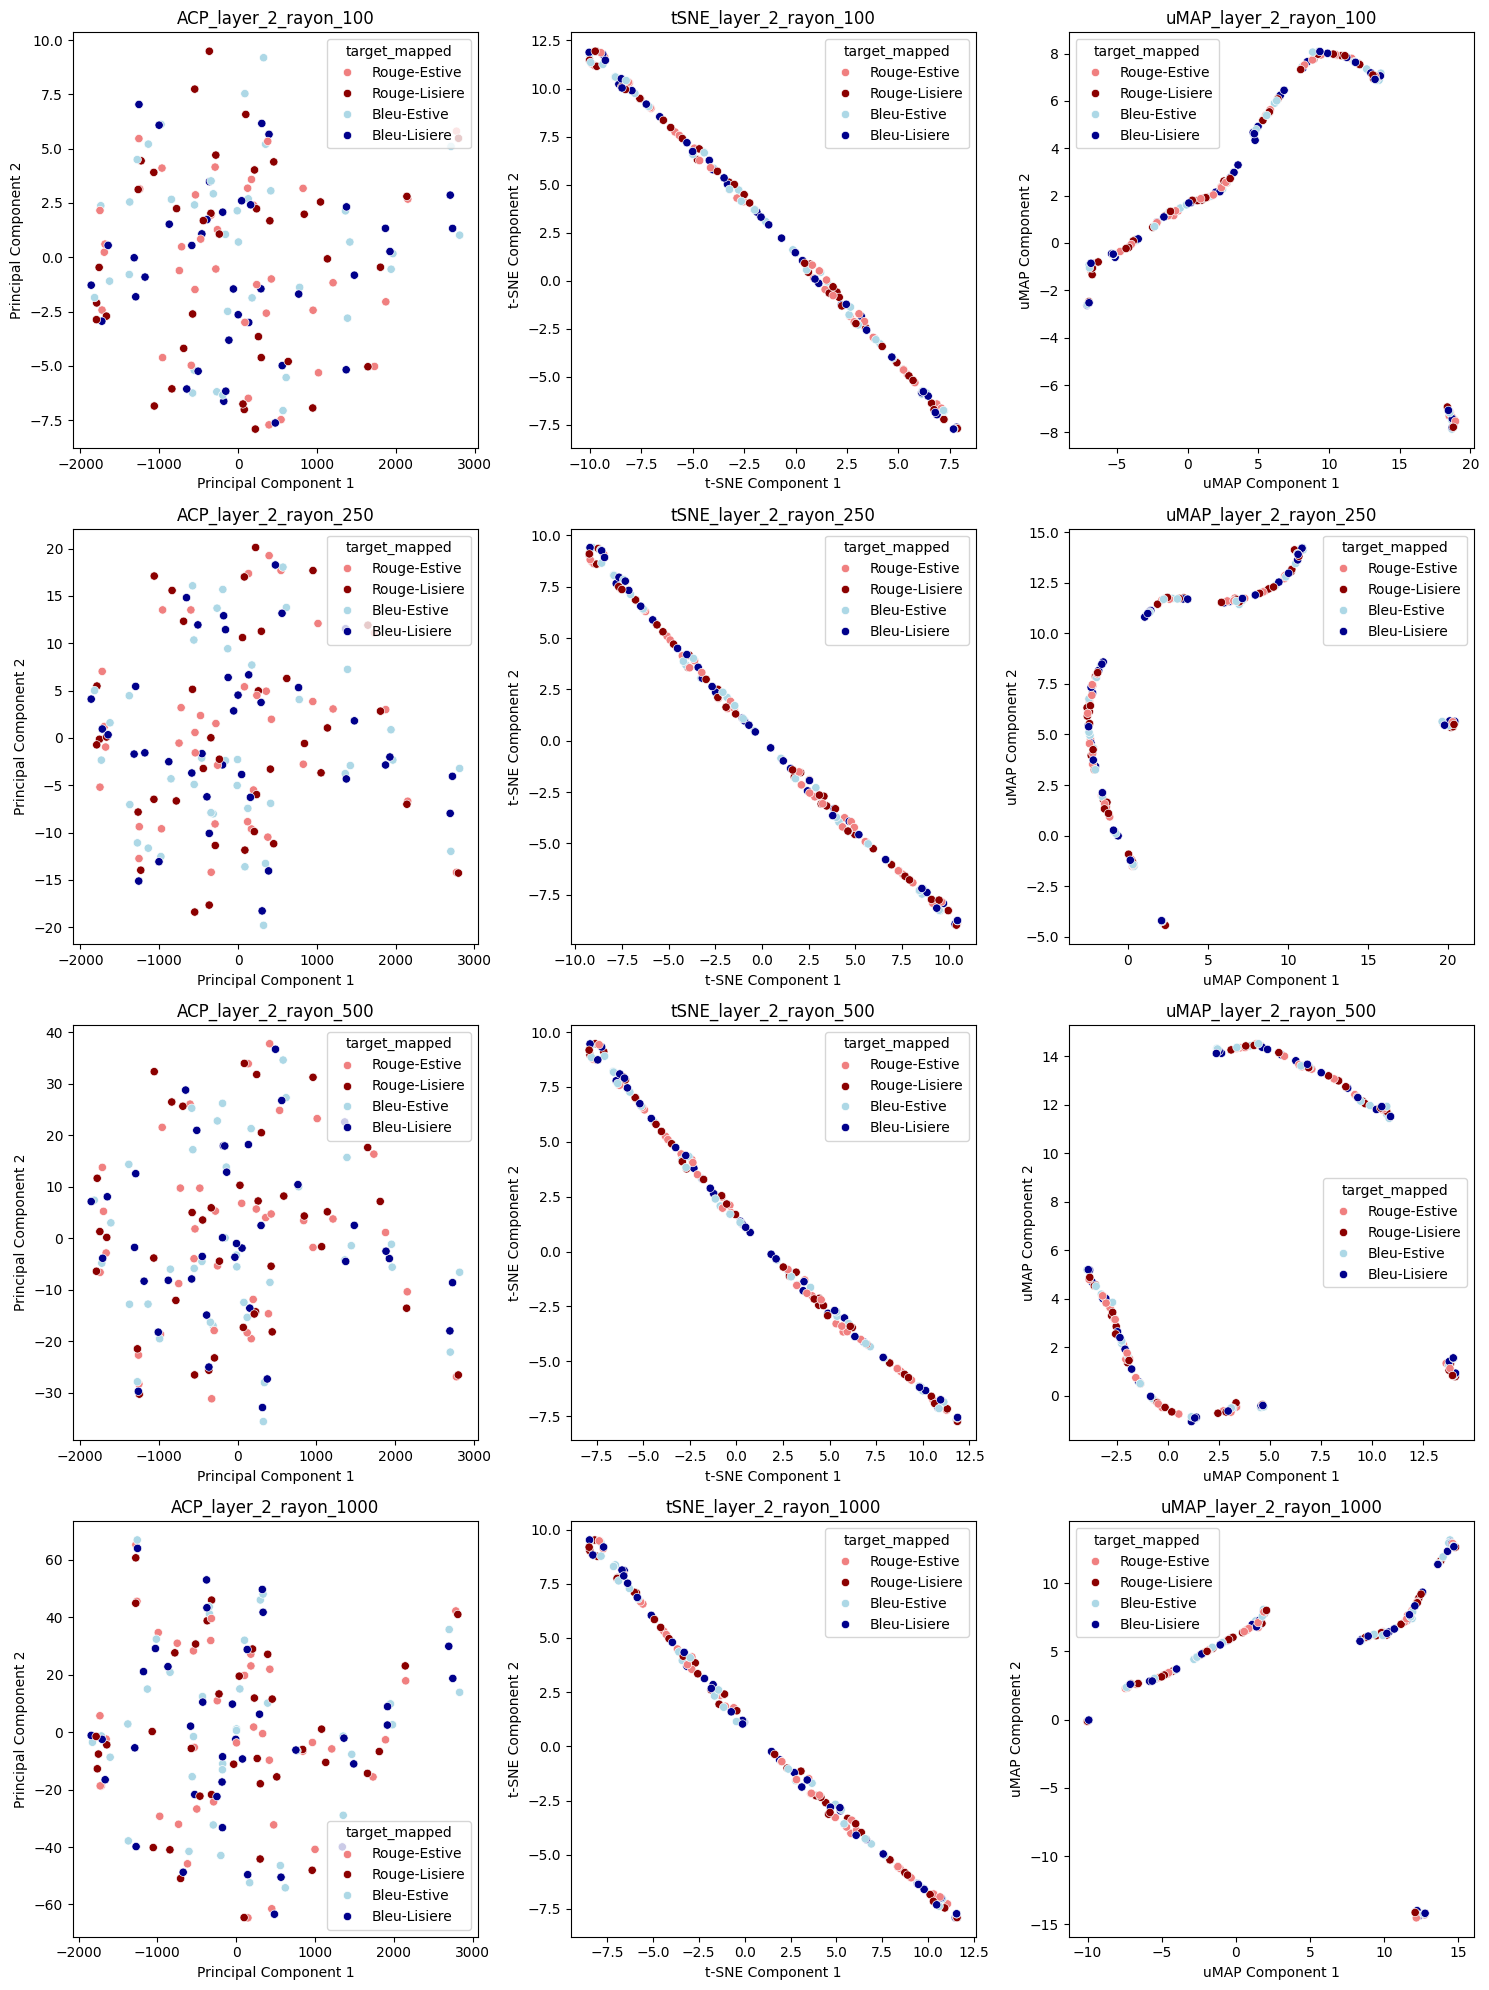

In [404]:
# Set up the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# ACP Plot for rayon 100
sns.scatterplot(x=pca_layer_2_result_100[:, 0], y=pca_layer_2_result_100[:, 1], hue=df_layer_2_rayon_100['target_mapped'], palette=custom_palette, ax=axs[0, 0])
axs[0, 0].set_title('ACP_layer_2_rayon_100')
axs[0, 0].set_xlabel('Principal Component 1')
axs[0, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 100
sns.scatterplot(x=tsne_layer_2_result_100[:, 0], y=tsne_layer_2_result_100[:, 1], hue=df_layer_2_rayon_100['target_mapped'], palette=custom_palette, ax=axs[0, 1])
axs[0, 1].set_title('tSNE_layer_2_rayon_100')
axs[0, 1].set_xlabel('t-SNE Component 1')
axs[0, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 100
sns.scatterplot(x=umap_layer_2_result_100[:, 0], y=umap_layer_2_result_100[:, 1], hue=df_layer_2_rayon_100['target_mapped'], palette=custom_palette, ax=axs[0, 2])
axs[0, 2].set_title('uMAP_layer_2_rayon_100')
axs[0, 2].set_xlabel('uMAP Component 1')
axs[0, 2].set_ylabel('uMAP Component 2')

# ACP Plot for rayon 250
sns.scatterplot(x=pca_layer_2_result_250[:, 0], y=pca_layer_2_result_250[:, 1], hue=df_layer_2_rayon_250['target_mapped'], palette=custom_palette, ax=axs[1, 0])
axs[1, 0].set_title('ACP_layer_2_rayon_250')
axs[1, 0].set_xlabel('Principal Component 1')
axs[1, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 250
sns.scatterplot(x=tsne_layer_2_result_250[:, 0], y=tsne_layer_2_result_250[:, 1], hue=df_layer_2_rayon_250['target_mapped'], palette=custom_palette, ax=axs[1, 1])
axs[1, 1].set_title('tSNE_layer_2_rayon_250')
axs[1, 1].set_xlabel('t-SNE Component 1')
axs[1, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 250
sns.scatterplot(x=umap_layer_2_result_250[:, 0], y=umap_layer_2_result_250[:, 1], hue=df_layer_2_rayon_250['target_mapped'], palette=custom_palette, ax=axs[1, 2])
axs[1, 2].set_title('uMAP_layer_2_rayon_250')
axs[1, 2].set_xlabel('uMAP Component 1')
axs[1, 2].set_ylabel('uMAP Component 2')

# ACP Plot for rayon 500
sns.scatterplot(x=pca_layer_2_result_500[:, 0], y=pca_layer_2_result_500[:, 1], hue=df_layer_2_rayon_500['target_mapped'], palette=custom_palette, ax=axs[2, 0])
axs[2, 0].set_title('ACP_layer_2_rayon_500')
axs[2, 0].set_xlabel('Principal Component 1')
axs[2, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 500
sns.scatterplot(x=tsne_layer_2_result_500[:, 0], y=tsne_layer_2_result_500[:, 1], hue=df_layer_2_rayon_500['target_mapped'], palette=custom_palette, ax=axs[2, 1])
axs[2, 1].set_title('tSNE_layer_2_rayon_500')
axs[2, 1].set_xlabel('t-SNE Component 1')
axs[2, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 500
sns.scatterplot(x=umap_layer_2_result_500[:, 0], y=umap_layer_2_result_500[:, 1], hue=df_layer_2_rayon_500['target_mapped'], palette=custom_palette, ax=axs[2, 2])
axs[2, 2].set_title('uMAP_layer_2_rayon_500')
axs[2, 2].set_xlabel('uMAP Component 1')
axs[2, 2].set_ylabel('uMAP Component 2')

# ACP Plot for rayon 1000
sns.scatterplot(x=pca_layer_2_result_1000[:, 0], y=pca_layer_2_result_1000[:, 1], hue=df_layer_2_rayon_1000['target_mapped'], palette=custom_palette, ax=axs[3, 0])
axs[3, 0].set_title('ACP_layer_2_rayon_1000')
axs[3, 0].set_xlabel('Principal Component 1')
axs[3, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 1000
sns.scatterplot(x=tsne_layer_2_result_1000[:, 0], y=tsne_layer_2_result_1000[:, 1], hue=df_layer_2_rayon_1000['target_mapped'], palette=custom_palette, ax=axs[3, 1])
axs[3, 1].set_title('tSNE_layer_2_rayon_1000')
axs[3, 1].set_xlabel('t-SNE Component 1')
axs[3, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 1000
sns.scatterplot(x=umap_layer_2_result_1000[:, 0], y=umap_layer_2_result_1000[:, 1], hue=df_layer_2_rayon_1000['target_mapped'], palette=custom_palette, ax=axs[3, 2])
axs[3, 2].set_title('uMAP_layer_2_rayon_1000')
axs[3, 2].set_xlabel('uMAP Component 1')
axs[3, 2].set_ylabel('uMAP Component 2')

# Adjust layout to make space for the colorbar on the right
plt.subplots_adjust(right=0.8)


plt.tight_layout()
plt.show()


### Layer 3

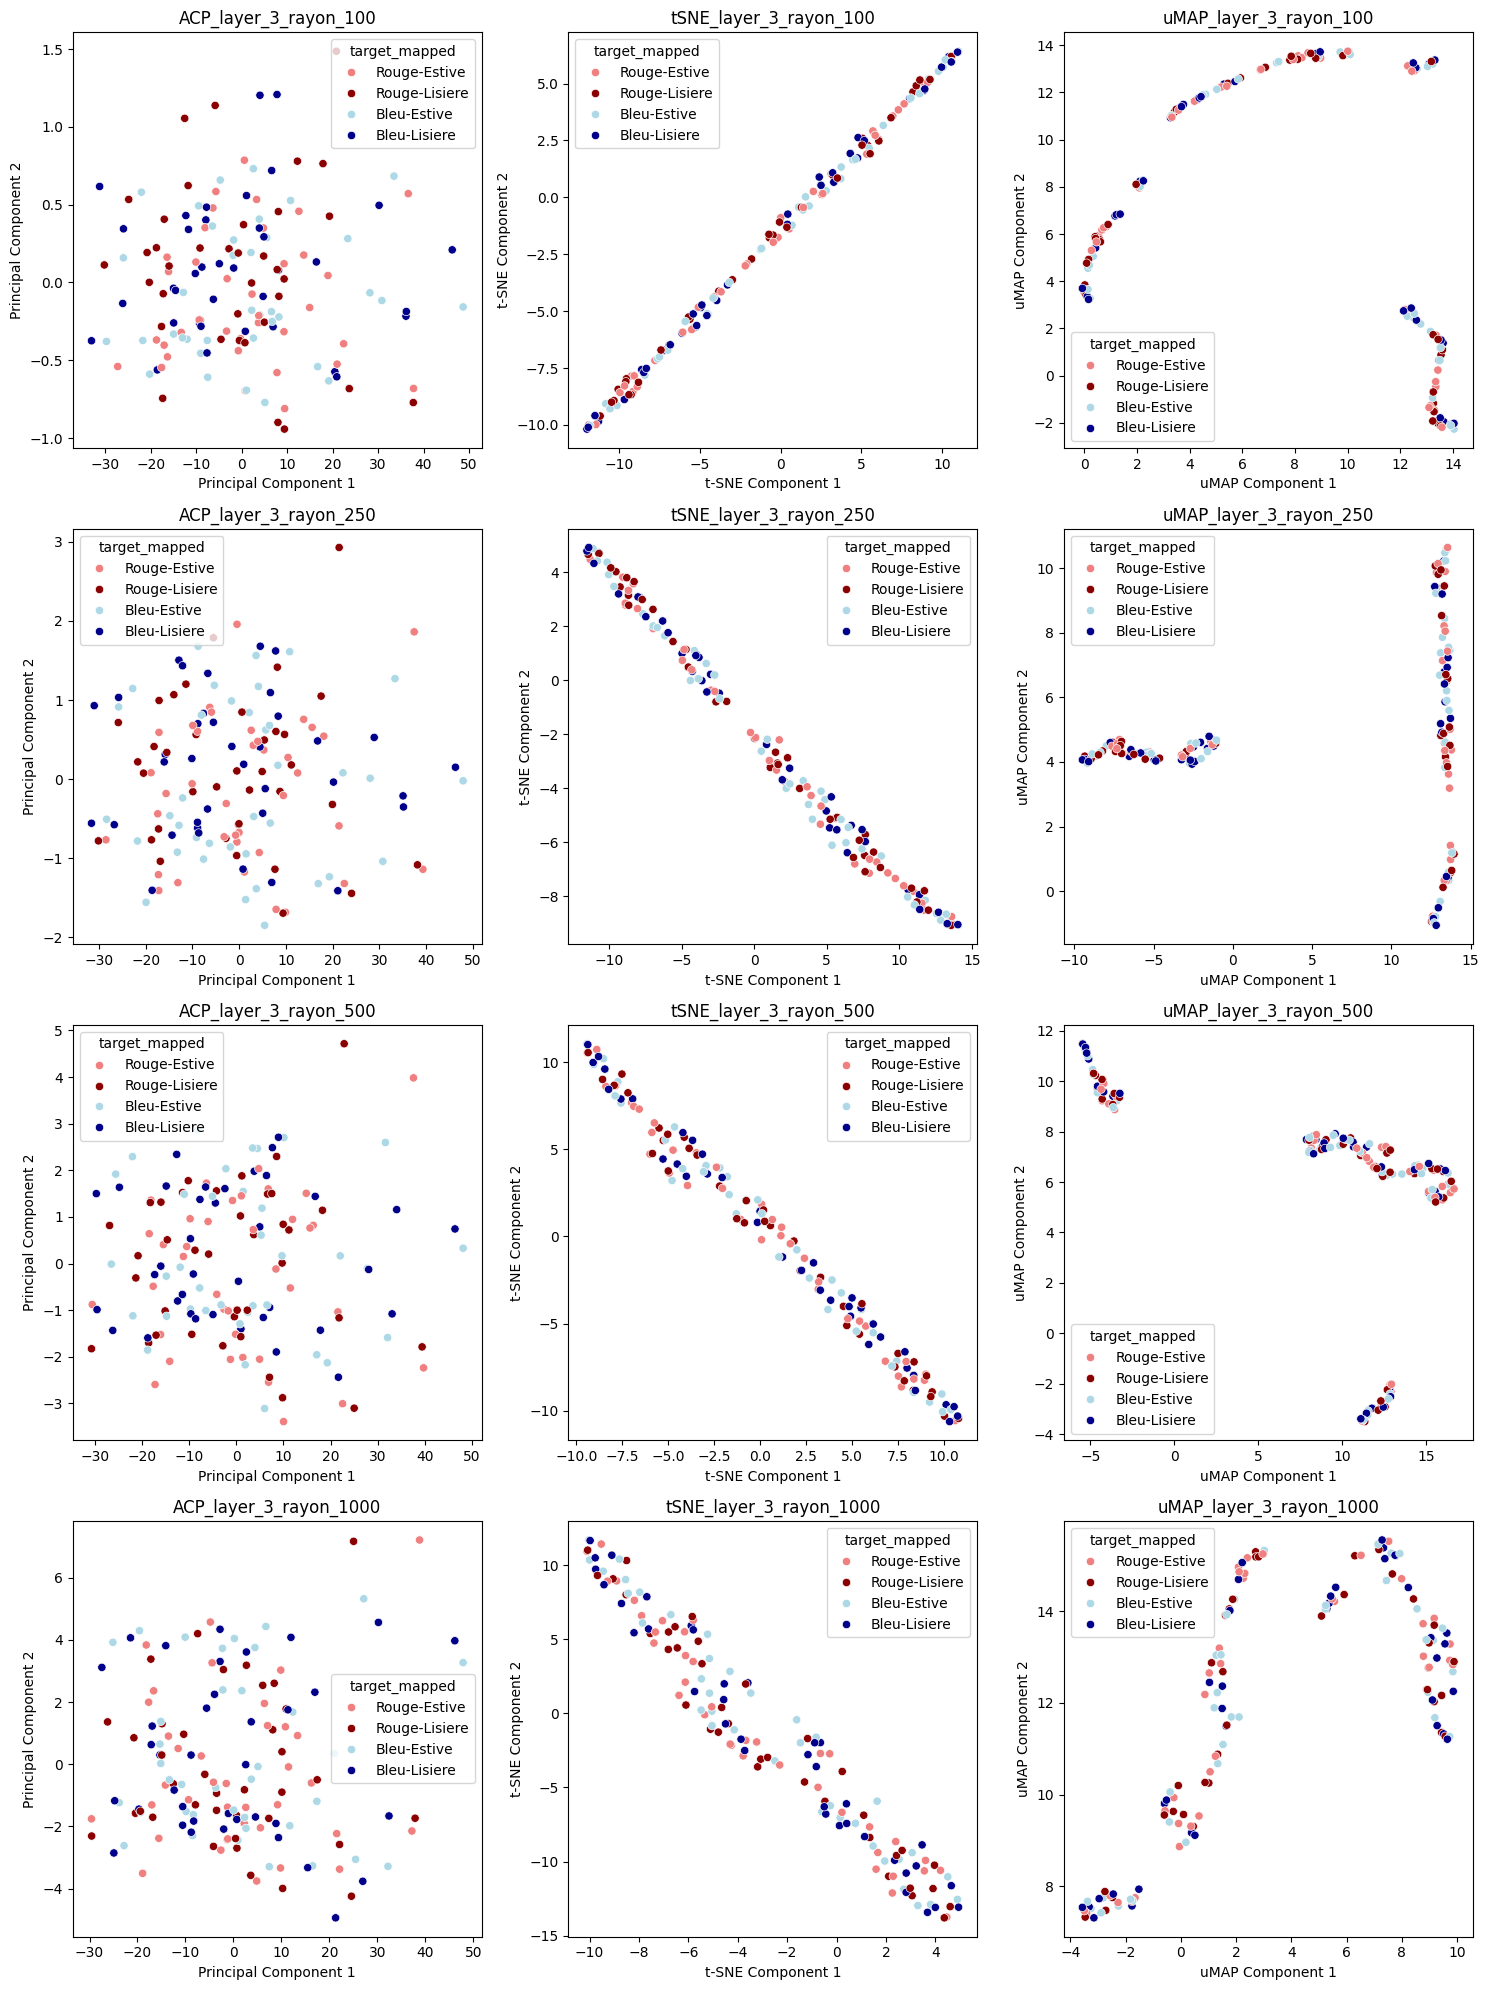

In [405]:
# Set up the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# ACP Plot for rayon 100
sns.scatterplot(x=pca_layer_3_result_100[:, 0], y=pca_layer_3_result_100[:, 1], hue=df_layer_3_rayon_100['target_mapped'], palette=custom_palette, ax=axs[0, 0])
axs[0, 0].set_title('ACP_layer_3_rayon_100')
axs[0, 0].set_xlabel('Principal Component 1')
axs[0, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 100
sns.scatterplot(x=tsne_layer_3_result_100[:, 0], y=tsne_layer_3_result_100[:, 1], hue=df_layer_3_rayon_100['target_mapped'], palette=custom_palette, ax=axs[0, 1])
axs[0, 1].set_title('tSNE_layer_3_rayon_100')
axs[0, 1].set_xlabel('t-SNE Component 1')
axs[0, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 100
sns.scatterplot(x=umap_layer_3_result_100[:, 0], y=umap_layer_3_result_100[:, 1], hue=df_layer_3_rayon_100['target_mapped'], palette=custom_palette, ax=axs[0, 2])
axs[0, 2].set_title('uMAP_layer_3_rayon_100')
axs[0, 2].set_xlabel('uMAP Component 1')
axs[0, 2].set_ylabel('uMAP Component 2')

# ACP Plot for rayon 250
sns.scatterplot(x=pca_layer_3_result_250[:, 0], y=pca_layer_3_result_250[:, 1], hue=df_layer_3_rayon_250['target_mapped'], palette=custom_palette, ax=axs[1, 0])
axs[1, 0].set_title('ACP_layer_3_rayon_250')
axs[1, 0].set_xlabel('Principal Component 1')
axs[1, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 250
sns.scatterplot(x=tsne_layer_3_result_250[:, 0], y=tsne_layer_3_result_250[:, 1], hue=df_layer_3_rayon_250['target_mapped'], palette=custom_palette, ax=axs[1, 1])
axs[1, 1].set_title('tSNE_layer_3_rayon_250')
axs[1, 1].set_xlabel('t-SNE Component 1')
axs[1, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 250
sns.scatterplot(x=umap_layer_3_result_250[:, 0], y=umap_layer_3_result_250[:, 1], hue=df_layer_3_rayon_250['target_mapped'], palette=custom_palette, ax=axs[1, 2])
axs[1, 2].set_title('uMAP_layer_3_rayon_250')
axs[1, 2].set_xlabel('uMAP Component 1')
axs[1, 2].set_ylabel('uMAP Component 2')

# ACP Plot for rayon 500
sns.scatterplot(x=pca_layer_3_result_500[:, 0], y=pca_layer_3_result_500[:, 1], hue=df_layer_3_rayon_500['target_mapped'], palette=custom_palette, ax=axs[2, 0])
axs[2, 0].set_title('ACP_layer_3_rayon_500')
axs[2, 0].set_xlabel('Principal Component 1')
axs[2, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 500
sns.scatterplot(x=tsne_layer_3_result_500[:, 0], y=tsne_layer_3_result_500[:, 1], hue=df_layer_3_rayon_500['target_mapped'], palette=custom_palette, ax=axs[2, 1])
axs[2, 1].set_title('tSNE_layer_3_rayon_500')
axs[2, 1].set_xlabel('t-SNE Component 1')
axs[2, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 500
sns.scatterplot(x=umap_layer_3_result_500[:, 0], y=umap_layer_3_result_500[:, 1], hue=df_layer_3_rayon_500['target_mapped'], palette=custom_palette, ax=axs[2, 2])
axs[2, 2].set_title('uMAP_layer_3_rayon_500')
axs[2, 2].set_xlabel('uMAP Component 1')
axs[2, 2].set_ylabel('uMAP Component 2')

# ACP Plot for rayon 1000
sns.scatterplot(x=pca_layer_3_result_1000[:, 0], y=pca_layer_3_result_1000[:, 1], hue=df_layer_3_rayon_1000['target_mapped'], palette=custom_palette, ax=axs[3, 0])
axs[3, 0].set_title('ACP_layer_3_rayon_1000')
axs[3, 0].set_xlabel('Principal Component 1')
axs[3, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 1000
sns.scatterplot(x=tsne_layer_3_result_1000[:, 0], y=tsne_layer_3_result_1000[:, 1], hue=df_layer_3_rayon_1000['target_mapped'], palette=custom_palette, ax=axs[3, 1])
axs[3, 1].set_title('tSNE_layer_3_rayon_1000')
axs[3, 1].set_xlabel('t-SNE Component 1')
axs[3, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 1000
sns.scatterplot(x=umap_layer_3_result_1000[:, 0], y=umap_layer_3_result_1000[:, 1], hue=df_layer_3_rayon_1000['target_mapped'], palette=custom_palette, ax=axs[3, 2])
axs[3, 2].set_title('uMAP_layer_3_rayon_1000')
axs[3, 2].set_xlabel('uMAP Component 1')
axs[3, 2].set_ylabel('uMAP Component 2')

# Adjust layout to make space for the colorbar on the right
plt.subplots_adjust(right=0.8)


plt.tight_layout()
plt.show()


### Layer 4

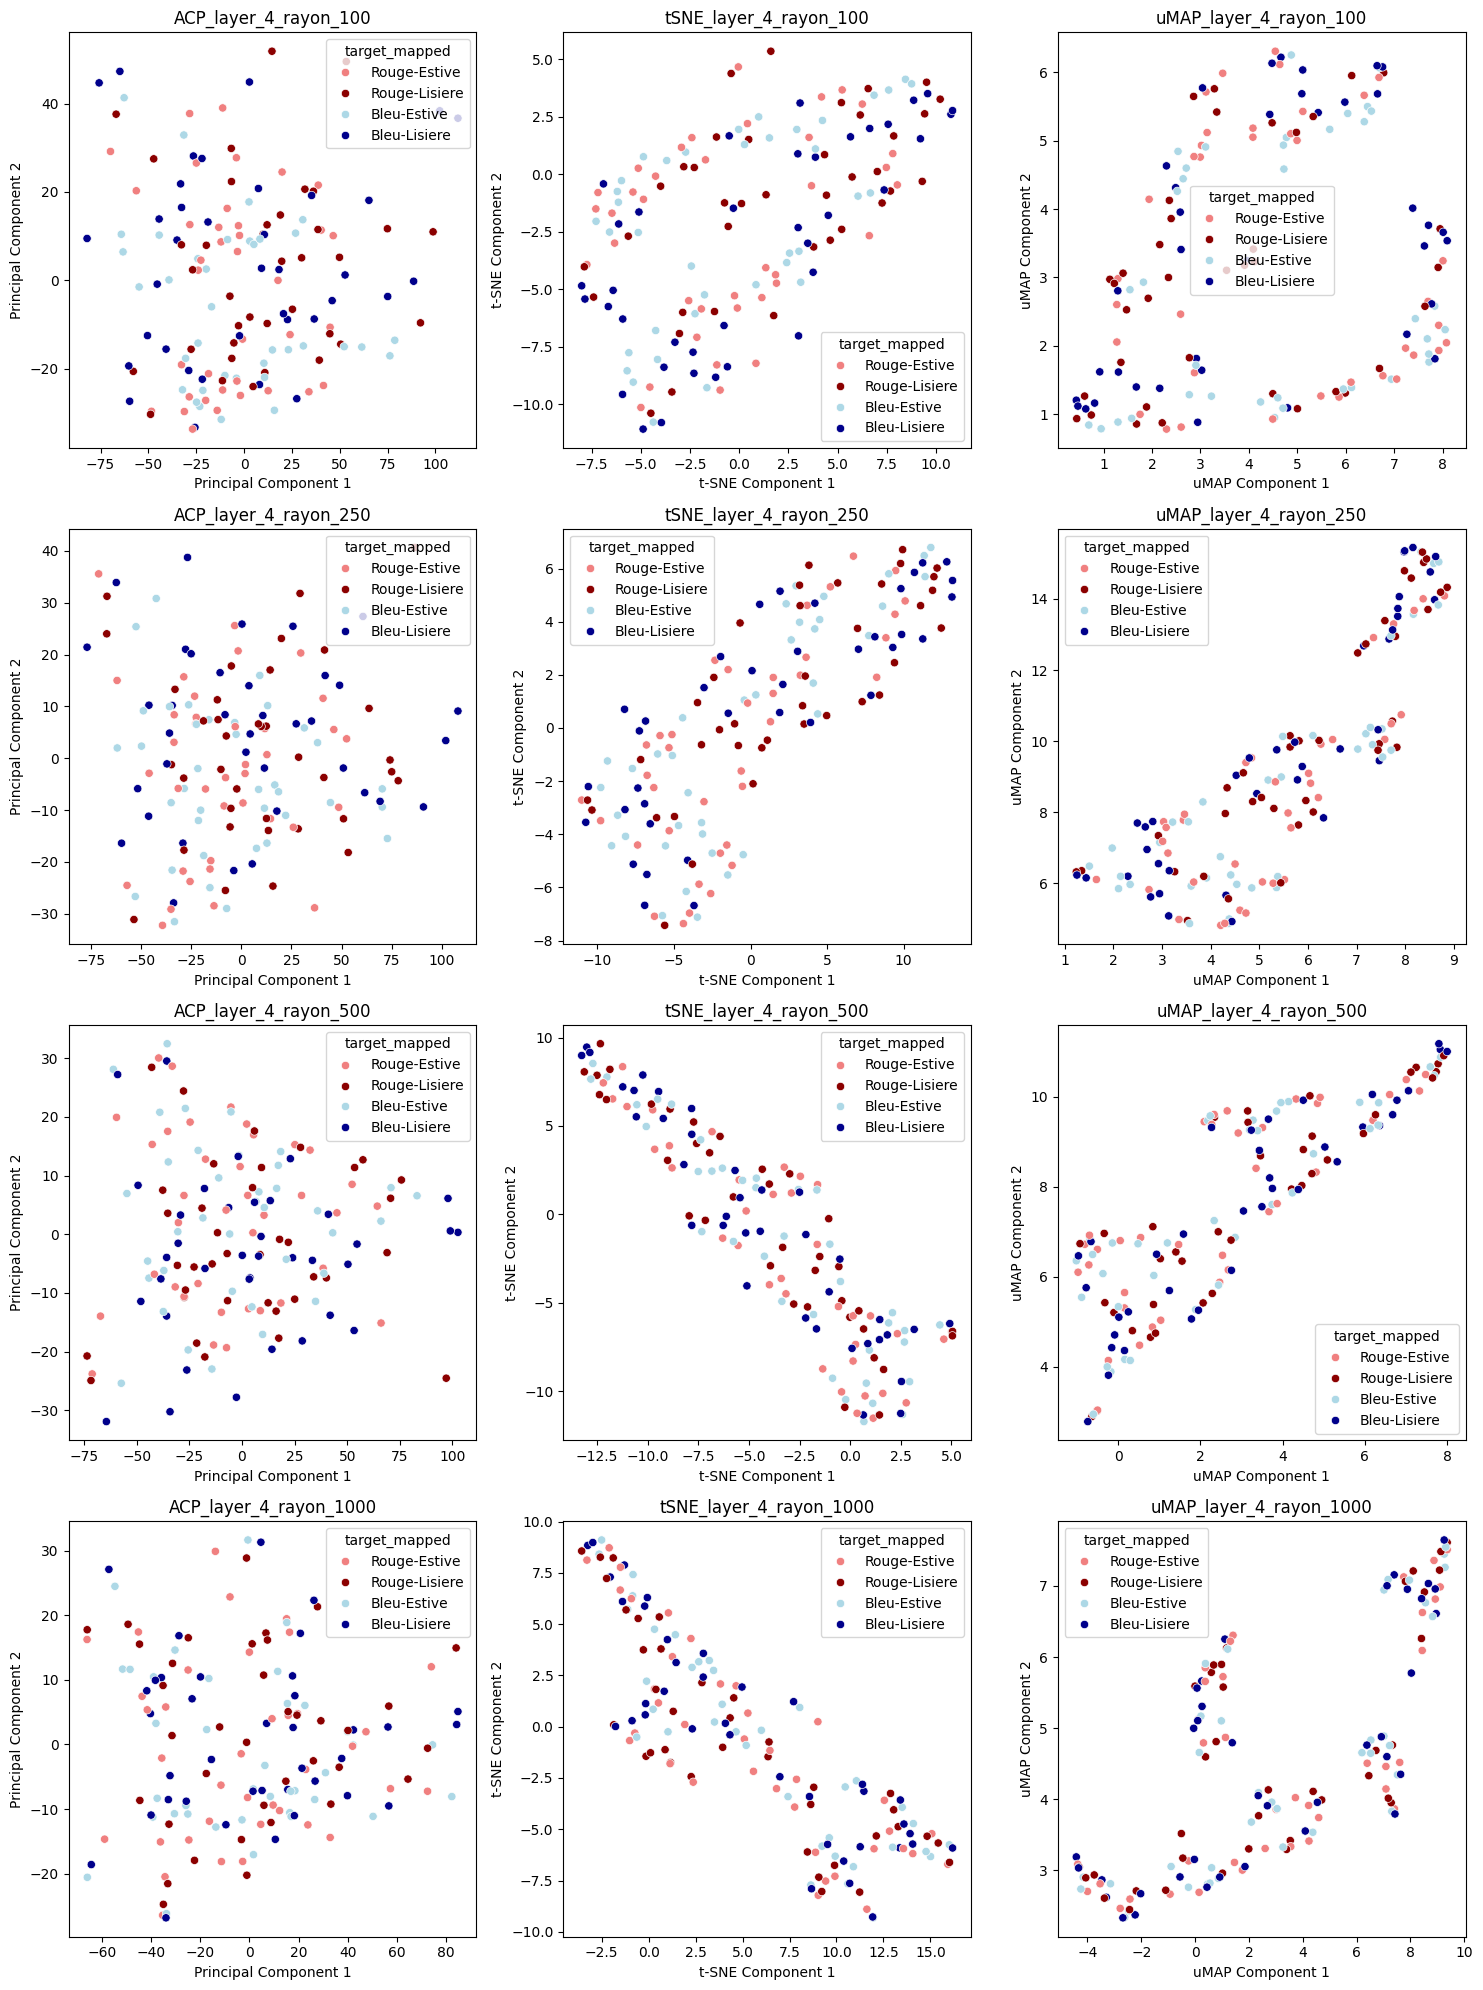

In [406]:
# Set up the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# ACP Plot for rayon 100
sns.scatterplot(x=pca_layer_4_result_100[:, 0], y=pca_layer_4_result_100[:, 1], hue=df_layer_4_rayon_100['target_mapped'], palette=custom_palette, ax=axs[0, 0])
axs[0, 0].set_title('ACP_layer_4_rayon_100')
axs[0, 0].set_xlabel('Principal Component 1')
axs[0, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 100
sns.scatterplot(x=tsne_layer_4_result_100[:, 0], y=tsne_layer_4_result_100[:, 1], hue=df_layer_4_rayon_100['target_mapped'], palette=custom_palette, ax=axs[0, 1])
axs[0, 1].set_title('tSNE_layer_4_rayon_100')
axs[0, 1].set_xlabel('t-SNE Component 1')
axs[0, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 100
sns.scatterplot(x=umap_layer_4_result_100[:, 0], y=umap_layer_4_result_100[:, 1], hue=df_layer_4_rayon_100['target_mapped'], palette=custom_palette, ax=axs[0, 2])
axs[0, 2].set_title('uMAP_layer_4_rayon_100')
axs[0, 2].set_xlabel('uMAP Component 1')
axs[0, 2].set_ylabel('uMAP Component 2')

# ACP Plot for rayon 250
sns.scatterplot(x=pca_layer_4_result_250[:, 0], y=pca_layer_4_result_250[:, 1], hue=df_layer_4_rayon_250['target_mapped'], palette=custom_palette, ax=axs[1, 0])
axs[1, 0].set_title('ACP_layer_4_rayon_250')
axs[1, 0].set_xlabel('Principal Component 1')
axs[1, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 250
sns.scatterplot(x=tsne_layer_4_result_250[:, 0], y=tsne_layer_4_result_250[:, 1], hue=df_layer_4_rayon_250['target_mapped'], palette=custom_palette, ax=axs[1, 1])
axs[1, 1].set_title('tSNE_layer_4_rayon_250')
axs[1, 1].set_xlabel('t-SNE Component 1')
axs[1, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 250
sns.scatterplot(x=umap_layer_4_result_250[:, 0], y=umap_layer_4_result_250[:, 1], hue=df_layer_4_rayon_250['target_mapped'], palette=custom_palette, ax=axs[1, 2])
axs[1, 2].set_title('uMAP_layer_4_rayon_250')
axs[1, 2].set_xlabel('uMAP Component 1')
axs[1, 2].set_ylabel('uMAP Component 2')

# ACP Plot for rayon 500
sns.scatterplot(x=pca_layer_4_result_500[:, 0], y=pca_layer_4_result_500[:, 1], hue=df_layer_4_rayon_500['target_mapped'], palette=custom_palette, ax=axs[2, 0])
axs[2, 0].set_title('ACP_layer_4_rayon_500')
axs[2, 0].set_xlabel('Principal Component 1')
axs[2, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 500
sns.scatterplot(x=tsne_layer_4_result_500[:, 0], y=tsne_layer_4_result_500[:, 1], hue=df_layer_4_rayon_500['target_mapped'], palette=custom_palette, ax=axs[2, 1])
axs[2, 1].set_title('tSNE_layer_4_rayon_500')
axs[2, 1].set_xlabel('t-SNE Component 1')
axs[2, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 500
sns.scatterplot(x=umap_layer_4_result_500[:, 0], y=umap_layer_4_result_500[:, 1], hue=df_layer_4_rayon_500['target_mapped'], palette=custom_palette, ax=axs[2, 2])
axs[2, 2].set_title('uMAP_layer_4_rayon_500')
axs[2, 2].set_xlabel('uMAP Component 1')
axs[2, 2].set_ylabel('uMAP Component 2')

# ACP Plot for rayon 1000
sns.scatterplot(x=pca_layer_4_result_1000[:, 0], y=pca_layer_4_result_1000[:, 1], hue=df_layer_4_rayon_1000['target_mapped'], palette=custom_palette, ax=axs[3, 0])
axs[3, 0].set_title('ACP_layer_4_rayon_1000')
axs[3, 0].set_xlabel('Principal Component 1')
axs[3, 0].set_ylabel('Principal Component 2')

# tSNE Plot for rayon 1000
sns.scatterplot(x=tsne_layer_4_result_1000[:, 0], y=tsne_layer_4_result_1000[:, 1], hue=df_layer_4_rayon_1000['target_mapped'], palette=custom_palette, ax=axs[3, 1])
axs[3, 1].set_title('tSNE_layer_4_rayon_1000')
axs[3, 1].set_xlabel('t-SNE Component 1')
axs[3, 1].set_ylabel('t-SNE Component 2')

# uMAP Plot for rayon 1000
sns.scatterplot(x=umap_layer_4_result_1000[:, 0], y=umap_layer_4_result_1000[:, 1], hue=df_layer_4_rayon_1000['target_mapped'], palette=custom_palette, ax=axs[3, 2])
axs[3, 2].set_title('uMAP_layer_4_rayon_1000')
axs[3, 2].set_xlabel('uMAP Component 1')
axs[3, 2].set_ylabel('uMAP Component 2')

# Adjust layout to make space for the colorbar on the right
plt.subplots_adjust(right=0.8)


plt.tight_layout()
plt.show()
